# Assignment 3

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## SECTION 1 : Preparations

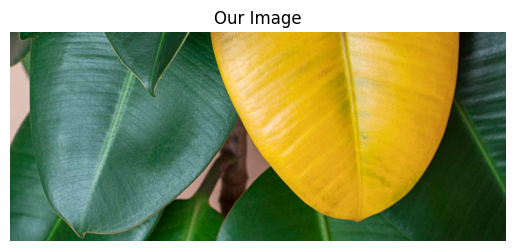

In [152]:
# @title
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_str_given = """
/9j/4QAYRXhpZgAASUkqAAgAAAAAAAAAAAAAAP/sABFEdWNreQABAAQAAAAjAAD/4QMsaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLwA8P3hwYWNrZXQgYmVnaW49Iu+7vyIgaWQ9Ilc1TTBNcENlaGlIenJlU3pOVGN6a2M5ZCI/PiA8eDp4bXBtZXRhIHhtbG5zOng9ImFkb2JlOm5zOm1ldGEvIiB4OnhtcHRrPSJBZG9iZSBYTVAgQ29yZSA2LjAtYzAwMiA3OS4xNjQzNTIsIDIwMjAvMDEvMzAtMTU6NTA6MzggICAgICAgICI+IDxyZGY6UkRGIHhtbG5zOnJkZj0iaHR0cDovL3d3dy53My5vcmcvMTk5OS8wMi8yMi1yZGYtc3ludGF4LW5zIyI+IDxyZGY6RGVzY3JpcHRpb24gcmRmOmFib3V0PSIiIHhtbG5zOnhtcD0iaHR0cDovL25zLmFkb2JlLmNvbS94YXAvMS4wLyIgeG1sbnM6eG1wTU09Imh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC9tbS8iIHhtbG5zOnN0UmVmPSJodHRwOi8vbnMuYWRvYmUuY29tL3hhcC8xLjAvc1R5cGUvUmVzb3VyY2VSZWYjIiB4bXA6Q3JlYXRvclRvb2w9IkFkb2JlIFBob3Rvc2hvcCAyMS4xIChXaW5kb3dzKSIgeG1wTU06SW5zdGFuY2VJRD0ieG1wLmlpZDo1NDU0OTQ5Mjg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCIgeG1wTU06RG9jdW1lbnRJRD0ieG1wLmRpZDo1NDU0OTQ5Mzg5NjcxMUVBOUUzNEVGQjBBRkFERTQ2RCI+IDx4bXBNTTpEZXJpdmVkRnJvbSBzdFJlZjppbnN0YW5jZUlEPSJ4bXAuaWlkOjU0NTQ5NDkwODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIiBzdFJlZjpkb2N1bWVudElEPSJ4bXAuZGlkOjU0NTQ5NDkxODk2NzExRUE5RTM0RUZCMEFGQURFNDZEIi8+IDwvcmRmOkRlc2NyaXB0aW9uPiA8L3JkZjpSREY+IDwveDp4bXBtZXRhPiA8P3hwYWNrZXQgZW5kPSJyIj8+/+4ADkFkb2JlAGTAAAAAAf/bAIQADgoKCgsKDgsLDhQNCw0UGBIODhIYGxYWFxYWGxoUFxcXFxQaGh8gIyAfGikpLS0pKT07Ozs9QEBAQEBAQEBAQAEPDQ0PEQ8SEBASFA4RDhQXEhQUEhchFxcZFxchKh4aGhoaHiomKSMjIykmLy8qKi8vOjo4OjpAQEBAQEBAQEBA/8AAEQgB4AR0AwEiAAIRAQMRAf/EAKUAAAMBAQEBAQAAAAAAAAAAAAECAwAEBQYHAQADAQEBAQAAAAAAAAAAAAAAAQIDBAUGEAABAwMDAgQFAQcEAQIGAwABABECITEDQVESYQRxgSITkaGxMgVCwdHhUiMUBvDxcjNikhWCwkMkJTWyUzQRAQEAAgECBAUDAwMEAgMBAAABEQIhMQNBURIEYXGBIjKRUhOhsUIjMwXB0WJy4YLwkkMU/9oADAMBAAIRAxEAPwD54BMImyaMU0brNEi8AJdpmhKoA5DpReGCCbCpZl72EchOAqZwkB4tRfPhxNjQi4KVZe4n434OjGYcDVpKcxIFuTx0SREieIqXei6sfZZpR5SDdDQn4peqMddLekc5MpFzU2Cf2ZCsrGw1Vx2neCX3Y8Y0BLlkRxjJsrZWvxo/mpt+bT+PE666/NOJ4GgcjRYnkXKbJKEj6IcBrV1gGYkOqjO3nrnBW3Q4km1FcCL2bxTgGQ9NBZVIM5S9uQYGjo+wRWlVUYJSYn4phjOqeD5RGNtQdlWGISqSycYS/RXhggSAC3inICxhjgfUXjsqR9iZegCP9uJGhoie04gGBd7BVDP/APbggcmG66Iy7cP8iox7QgPIVOisMAIacS/RVAfHLtx9zJ27bI9EkMECW/V1TDA0WEa7jRMMIdsSQPtA1RMMUPtI40SmLXCsY4ZAX8WQCyh29wWlsFuMSKEEWFfqiMOAiknJqQFj2cB9mQE3MTRAHHCMZAxNfivI/K9qcWfnGkcvqBG/6gvV/sZxrGTEB3BUu47XNmwShIuRWHSSneZmcdDnk8MwD0oAsxAcDwTwBiT7lCNOoQ5GTtQaMo8BUJes1d0wjECzyTmIBcAV3ScWLiuzogbkSWYAIswoUSTJokcWDUCHOMA1zvomGcx1qlM5SDW6IExkXkW6ocATQuEhGBAO+6PI7PWjo8LaDdMPbB16JmnEObKwaN9EQZaUCFyzIAFpM1ETFrFZy/pteiDgOTQIBSQC92+CTBGWXMHqHRnOJPpr4qnZgCRmaCIJWfcvCaHfZnmYg2ouEycuqZvvJf1EqBRpOBr0Y1KDuERdhqFo2VKYRo61ujJifSClYylxFykeHb+J7KXd91GnoFZHoFf/ACPvRlyx7TGWxYbtuusGP4n8Ych/78o9O9V817kjIymeRlUv1US5ufLou/brjxqdP91iFXjEig8tUnE6aKmeSVBponGQkeqv1RAgfuuNkDBjQu+yDyaIFxUfNer/AI7MjvZDSUD8l5IEo1XofhcvH8nhEi3ImPxCy70z2t5/41ft7ju6X/y/u+wjAv4p+I80cYVREC68nW5exQgBx6qkPUCTYJIBz0XTCMYlrUqFv25n5M9rgccWI3ayqZAl7AKEpsf26sl5uCHd9ld2knBTlczgYSH6jUpefIAMx3vdCOORiG8wnjChFQ31We12pzED2yGpRPEB+iInFiNNehU6yk8aFTxOnJ9TcgKboCUiwcsaB1hF2lZkwaosRZTcgpg1SgY1v5pwafNJLQHdZ9zGDmSl/JAGtNEzHyREWtqua5qitfcotpomIcMLpbFK8BnDIGjFZkPDzU7Xg8Ca+GqF7WRAdayi2mVg9dVn80DfotZAYOyxWJAH7FhboigHWvdEhkoIKAzV+iyDraoAEslkQiSpTLvqqkIJyDBSLmqYQJL/ABTcAB1V9C6piOp+KB3sE5f/AHSSj5n5JwYPjIMSLOEe8JlFmvEJYNH1SurZYPjEjqF1e2v27z5VG3GA/HiLRbzZe1Anj91914f44tK9HXvwgJQ6stexc3eeVRv1gDIQwk3wW5tUs6M8T1FxdKcRHhqFvZsnIksxISGUbChQkJUcEBYwJP0UbXbnEXKxIIYnogGIb5IES2SEl6hY7dyzrFRRw3mklqWokMiFvcNjqs73Nbx0PAe2H1SmJtdMZjUIiUaLOzW9KrlIirpCAA9laTFDgCsdtDlSqh9U7B0CGKylNN2WdMRqgwVymzokulstXVGAZlmSkkIci7J4MSAyVtUX81jIGicImqU3ZPdA1VGnIVSGisQ6nKPzVSglVtVmPkt4qgzqU7/RUNqKZ6p6lUsv2lfn/dF+5yn/AMz9V+gZvsPgV+fZy+fJ/wA5fVep7D/L6OX3XTX5lFOqKATAOu5xmhVduKBYEBcsI7Ltw0DEqomunFEarpjGQIOhUISiqwybfBWiqEkOicwMWKSXImyFAG1QKYSAoLFUExMcWqkiAQHCvjhG9k+SIxAayX2agmyrKVWC0QTGttEsFR4x4Nosk6Osgk08IusyeIZYuk8XiRKNCKqWbs+xyzOaUZQnKsoxZiqkUCWVAiyUrJjmFgMOKJ9rGIf+V5fEqOWZJHVUkWiVz8nmB1Skk6I2vgbuf+0EUAYFlzSrTUq2Yn3JV1soN6m1U3q59utMImNTXonAdvogXMWNVWECz6BVEBjjYrphxYyJ9Mfmeil6RTogZuwiKDROHOFfeJHEC+pTAgCtSoet2FDsqxBat05TyrGLkGzK4MRduq5hE7sCsITNAabqsm6xlxCkiKq+PNiABcPZcWHs45HlKbNYLoh28WqTRVLQ64dx215FzZlv73DGRLlzQFch7Z/UCQ1kPZBcEF083yDsHddvwchzeyI7zDEca112XHHDJ9W6rHEHF3F0ZodZ7nAWYsWRh3GFuIPqFnsuWOKFARXdOIxDkBjo6M0OiOftgGcAph3GORIJHE6qAxYshYvGRQn2kRJonp0TzQ6RmiJUYwYsHTiUTUkAUdrLhPbydwQ1iknjlEsQSBUMjIS/M9rGOSOfHXHP720kP3rijwMSS+wAXrY/WDjyh4TDSfTqvIyQy4M+THIMYlj4brLpcfoq8zLe5AHj9z36LNilVuJ20QEKHUlEQIpYHVNKWTK44woPmVOUJEP8gnywL0N0kYyd5E0SMvtnxVoxEQ1kY0sL6rEeaeBQiA9SmAP8rvqj/TAZiNkDKQI4miAakb6LcgbB+tkgBd9UXY1LSu26YjESf1Gp0CQxraqJNyaFJIk1JSMkwxaVtVeLY+2JP6i3koCDzAkWa6r3tOMBaIsst+bIi9XHkl5v8VKVE5rX4JJF1U6Kk4Ct0QzugjTRBxiV6n4TsvfzHNk/68dSvNxwllyRxxDkle53k/8A27sY9th/7cg9ZU7XwnivWeN6R5v5nvT33dGMD/TxUgNCvLkGJf5K0of+pK2khXdPGJhFttykCYl4lUBjkIf0y3QlDjUCm6UgCoQRpQPLoVuJCeGRwIny3TmAYG8el0FlEbgqvbZDi7rDkN4zifmlkKgxDHRasfuFRYpWZlnmeu2LL5V+gwfSiqIkkPbVcvZZPd7fFlBfnCJ+S7o/7rw9My3W/wCNw923iWeLRaNWSyymThmNk0hYDxTY8YBK31t6RnsnCE5EuGCtjw0oPFUhD1Bh5FXAAiNlc1ninNbg2wOyJgxNGcVbdDlX9yI5Euf4qrZ0g5TOEEk+YC3AafFWHoAFnSzFf+V1nddZMqmUrlgaLAb6IkjkRrulDs6w23ORpXca0KVnfpoqM9RZYROijbXKih3dk1LajRElwGvYpJbvVKya/EC7ONrFTIYdUXMn0R4uPD4rPb7uhpsFtETTw3QFmWFwoTRK29USaIO5UcgDRC4Y2TNugAP4KhlmCBKJZzVY2pbRL5kmSf4oCJJqjIaop5NiAkkXKc1ogIpz4hJpENoj7dKqjhAp58gQhlOScpT8AqgTOyEqCtTsmlemqViC481WCsCIPIE1Og2XaYmWIwJcCxXJG4Juu2DGJAq4db+2v+p6f3TDPdydt6cpGjr3sBPESegpVeHjaOcjey9jtyeC09ttZ3d5Ub9I6uTUuRUIgPpdT5AVd3sniSSK/Fd0vwRj4txEhsVPgSHJY7qjEmqzgaWRcXrDiJifjqllFz9Fd3FqdUhl+5Y7zXzXHPKAZSljAK7GiSUvELDftS+XKpXFLGQKeKmYm67ZY6MfJTlj1Zcu/Yxczhc2crkdETMmipKJ2SGPxWF9U4uVcByKxkCgYgIMbhHUCWWSkoEpyGYhBg6HPRDk56JzIHRZgVjILOCHTMjVosU7BKAqlBbWWFkzOh4p5BCSCgS6Yxq6SVEwDJSgaJTJXIBNUhoapuRF0k6lVCqOd+JbZfn2X/un/wAj9V+hZvsl4Ffn065Z/wDI/Ven7Dpt9HJ7rpr9QAqycRCUGqcBwu6OSqQLGi6Mbmuq58cXXZhYBtVUTejpxQcB10wxRjJyo4yFZyz3VxNUM4g7up5YAlwhK1FnoxQR4AyAGgTPVh5pMeRmGivHGZAyCZFcAIxkZR4vXRaOKRLbK2Lty/UI5JP2j5rLp4VtVlkYJy8U0QgAnjRYOrDSUslqp5lc+SeiEbXgk5kUUsbnNHxWlKpVu37eRicpoAlbIy5tSzVyk/FJIeoHdGQeZKQVlQ0S8WG1VBAoBXVUjINvE3Uxd/mqxgWVQCwagfxTwLWDN81hL4owMqsmDAEzJ1KeIu4S8TypQaJzFogpmaIFBpurw9oCvkyhGNKFYZBEsRbVOU3fhy9vEEGPmnOaN4hw6hhyCUDEQof1KgqwFCFcob+4ahiW+aw7iDfZfdEg3NQEOD1LM1AmGn3GnG1ilOVxayxjKjs3RAj9JFrFIFGfeN9RoUpzRIaUZPYlV4gkClbFaWNrgHxQAx9xhiQauLFXxd3inyJN6F1ERgTWDUoQsccGqK7p8h0CeGRLMzLCGIkgEea5zCIL1r0WeNK1dGQ6JYYEvYs1Fz/k+054BniXyYYtNv1Q/gqc45CwpILY+US7uLGJLgjUJb65nHWdD1vheleLDKbAP1TmEjU33R73tz2ndOK4Z+rHs23kgCZ0u9Tss9bmCzFRlj613SxiZF6ll18QGEvV0CnllGJbHTdPBEMQOg2QDgOzbIAB7uUeE29IfxTDMLmqYRDP5oAZR9wdkSbAiiDgFyHJY7BLxBFqqkpRBO2iSU/ADZBl4gXBOrJZFhZhsi8jV0kwwfU2U0qbBESzB7BJ3WQGU21LDwVsD4sU5tVmHmuLNIlgTUrOc7FOqRLRSsLJpkW0S00VrAhvBbR1iunsO1PddxGAHpuT0StxMn14ej+I7aGHFLvc1BEeh915/dZsufNLNImth0Xpfks+OQj2mEgQxXG5Xm+2W2GynWf5XxLe/wCM8ExCMzWh1CnOMokx0GqpLGLgpBIfqDvrsqRlFiDSoRAEn0lsrEG8Pj0UZQYghq7IKgwFDfTogDMScUTxY0NExxMxDkGxSwDCZkGADpZRl+qpW4SBd/IKgnGQAlQhBvqv8eynJ+Nxg3xmUD5FwvbxxoPmvmP8YygHPgelMkf/AOJX0wJagXie4n8fuO5PC31T6vZ9vt6+xpfhj9OD8fUBen7VeERfZSiDSRvb4pwJHVV29p1VtFOUatQsyaETK/8AoJYY3k5oArxIjWi6Neeb0QAxhqaVRMaEahG/QLUFrp3AJQlyhKvqsQjKnmgIk3oNAsdr4KiXE7XTRjpqqsLNogzElqMs/QeSgM26BZzoiSwAsUsn1StxODKWFr6JWehTNrrogCD4rDa56qjAB+u6D7fBEuS6Qm4Cz22wZZVrZDREOiACC2lljJb4GVhqs7HoiwZzdJIhwCnNb1LJiAxSBnIdAyLbN82S8mPjdOzBZHjqVnPlolMj4unuoOFDuyLdVhdYmrCyZjog61GolL6XTwGKU1Ta1SyTgKSkJqmJZIbq4GJHipyLnw0WkfJZtkytblWlyu3tjYHWhXCLtqu7tR8rq+1fT3NL8We3SpZRxyiTasy9fsyBjD6ryu4H9SQ2K7+0keIF1vrZr7jbPVNn2x3oxFqeSiJk3imOQWs+q7ZvGeFHqaUZAmx1SBtJVOyabM2m6LtwcajkJDEH96x3Zlg3kotl6qJUFAuCmILusbLGzqpMk+PRD9Nbp2HydAh3+Siy+akyBJlMgV6XVTEhJKLFYdzXxsOImFVPXorOlIAai5rJ4VXJCPNIYlUICxANUpcGgywBVDFZleTTPRAlMQg3wVQAJdUQUhDFYungKBvisUh0WEkYNteiSYdOapbqoEyN0nAMwVSEpAZVKEjZJIuWVCCHUrnqFpCqfcFsct2K/PjWcjuT9V993kgO3yH/AMT9F8CLkr0/Yz7dvo5Pdf4/U0QnFPFTBTP8V2xx1bGQCxsuvGQD0XFjBJXoYcBoVUKrRJP2qsebWVu3wb/Bdke3gKhXNUVxY8c520TjAQa3XXxxxL2KSc+lU8AsMMRe6sYCEHBqbhTxguORZGeXFGQcumkRdW9zjGlyuPJ3MRWKme5lIk6BL1QV38+vqWXme/N3WS9ROsXTOLoRopTnXosXVbhss2FFx5JF1eUgXdCHbnJJ5UilbJyxuaTtsByzc0ivSzARwSjGwDJYQjCPGKOYNhks+btmotxPTPrXlEXSQrJgPimf1HrZNDGX2VsdusPEB2NhsnJNtBZKRo/kmBi4J+CoGjEE7A6pwGskjJx6aMmMpaJw1IuXLp+JLPbRSBk7WCpEHU+CYXMREXFqqvb4sUm9wuFy+5F2uBddmEQkOZLMKMnDXmaNCDQFlGUpRNgSrwyGQY0Gic48bRoHN1YcUs2QNQbpPfm2jrulhLfbTRSl28tYOjFDjPc5DqARoyH9zkDOa7rsOCIFYgN9xUj2xl6scROOhslihz/3UjXk5F6Lf3eQhnB8VX+1yEfaB0KxxzB4e0KXKOQke7ygikUB3+kocgdQVY4QQ5xP1CWXaYyCY4yCLxv8EcgI/kIagjon/vMBFy4rZRl2WM19UZBJHtpAmhdtkZodWPuMMg0ZAS60TDPjk0eQrdcBwzjKhWMJE2CM0PSyQxd3il2spDmfVikTaW3mvJjyxPjmOMokiQPTRV9uZLtUK/cQPdYfdEW7rCB7o/niP1jqNVntxfV4XqqczHjE8YiQ7fFJLHycxQx5TwZqnVWjEM8j4hX1S45AQprusJt52KtMYTSAL7qEoQFQXKQOCbk/bqUnuEAsXCmSDd0WjoKIyo3OLeCwjEh7aIcaUPigzDdBZ5FiCwKlmJdurOqAGl62KUB8oHkp2vAvRTODi7eEZC7nxXBIgy/YuzvpynkMTThQeS4gK9VOvmIWVTSj6JQGTSBc6EaJE1CAZFhcr6DBjH47seZpnyinQLh/EdmMkz3GUf0sda7q3d55ZsplL/rtEbBT+Vx4Tqr8ZnxvRxyEiSR6iandYF6SoQLq3oL8TbTVQyPKoDS6WV4ZAYGNZBIYcg4DEqgmQz1GxR4iYeNtkEg0oitBr1RgIzBY8ZNY7qntk0LkVSe1OBBZw9WQXKfA2N+tEIylEtcD4Kx4k+qj6pCCA0Q8d0ibhKVi51ScNNk0ZTiSQB11TRyxkXyBtv4oOdHX+E7j+3/JYhL7cj4yf+Vj8V9zjAP7l+eu0xOF4EENuNl972eaObBjzi2SIl8QvI/5TT079vueF+2vT/4/fOm2n7b6v1dgDggDqPJUgxZlogJoBj41WevGHVT8Xd9LKhiN6WQMgHB6FAzGnwXTnWROB3G10spOWFVqyNmDqog4DhlPO3QdCCJd28GTcCKtQ6KkYhmAqViRBquyr0STkZSYA7gJJEGllpO9KgoxiDU3CyubcSGThKXgkmDuryl6FEuxfZZdzE4l6qifTRY2RJpSh1SSr0C5NtvLmrB3H1ZZk/Gj2RYMOl0TtZ/IskEaeCBYdNyiTsklI3OtnV4kgI5JpTqUkqXunID0Hmgalljttj5gjuK6LcHqnEd0Q37lnk4XiB/FDkzpykaqcMEC+tU5CxAZPJlHh5rFkOSEifijJZAyfxQLJGq+1kSXFfgqK0CQpmxCcpW3TkGCgeRSmWgRk5sgIVVRN+DAHku7tS0hHc2XLAMeq6cEmmBr1St+6XysKzg/fADIW/UHfqFbsiTEEBJ3EOceWtkfx8zFhZ11bf7+m37kf4u71Atd0XJ3dVPqb9qVuEnXd6WWSHiWLV1W8mTFpFmLLUq5U3VcpDU3ssZEeCLPV6BAxcfILG63wXKAkbHRZ2B0ISkHzCEjpZZ23BmBfwRe7KTkIc21WfrPCsmLJZMl50W5ApXbr8TJKF9UhhQKxkHZKXtuufbWeBoFwbLalVIHkpmLVCy+FUQj4oEpyKpTFlUpkKxsmZLJVDI26HFMQWQVApBQ1TkoEKpQQ7JQSnIdKyoFJKz1ogUpKeAMgD4qGpVCVNXqVcf5IgdpmO0JH5L4WK+2/MS49hnNniQvioh16vsZ/p35uP3X5a/Kj9U8cZKaGMOCVeIiF2yOWnwYo3l8F6HbwBY6BccMkQOqtDuCzRVzERXowl6iHorSyxEHeq87HOdUzmVCWT9SXR/cxeqnLuw9KqOT24AVcqUJRDkotJc55yJIskeT+oqUu4FWUxMmTqcnheRfVH3BELmlM2BWclLKat75d2WUmpaiyWSewSWXMSTJhV16GLsO5zFuJAXs9h+BhAiWQOVndvLl1fx7bfCPJ7H8RlzDnMUK3fdse3AEQwF19lDDDHDhEMvF/LdsJRkWSuvjVb9ueizV4UJAxQ7kvgISQcSMTomz/wDSUp1cVeb1IshGUv4pxuzhaPwcuqjO+AxuH0RAdzoEeLVe6womSkaRpfdPGqmCT4BOJS8lUqjxDlOIixokiZE0oyrDHyBJKYHHjiTv0XoYMc/ugAemjLlw4Jk0NF6eKIgGJ8VWsNExzCTmIgEfVTUixVpGQ48qwclkvNv0gF1YSOTKLRpqhHupc2MXOysZCRJCWUK0iH3TAnLIgf03PwRM2HpgxKnGcokiTHwuqe9GER6QZGkgUBM5SKyxu+gSnuIiT+0SNlYzNCQBvFIc0SbC9SEABnxE1iYvYLcsT6hCYjKwDXohExlEuDSzIAynAxu53R4gsRIF1OcQzh2N0sYh+IvukDzwxJNBZSOGLRcUs4TyZm5MR+1TJmIekkjRATOKPKjhqJIc+3yjJE2r47hOZZBUXN1PJKRYyjUaKbIMp9/24hKPdYQ3b5Lx/klrFJF8kWt+7dWx90IGWPLDliyUnDfqOqnmwHBxy45c+2mfTMadJdVnL6bi9PBV55n1YYDcW3XPmxF3enRdJyHg0SyjKJIq4G6upcoDAgAsmHIMLCyoeEQON9QgZ8qFI8pm1S6YGI8E4gJVFUsogFmqgJkkmlAAm7eIeWWX6AjMf03ld2RYR7cv+tRsK5ZAz6kl3UjLi3G41V6DHb1H6LmcCRoiTEVOIU/dWpT9t28+5yjHAU1KkHkWFyvf7Lt/7Pt+ZH9bIPgFNt6TrT1meb0g55ww4o9nipGLc5blcsoSP2/aPmqESmeQ80h5AsB4jRXrMTCNts3KJhX+Ui6X0l3oV0Ti8PSQPnVTMX+652TJzzxysQ406JImcS703XS7Uk5CE8RZ4m9gapFYAnGYYljogRRg72pqpywSgeRFNtVXFlFRIV0KBnzJLDrxpopEcGf7TWlV1zkWeALtq4DKRhEtTiDQk3QMJ+1y9UWrRrlTMRyYuFQgwl6Q767JxkiQ041OtUFx8koOCQ9F9Z/jmf3OzOF3OGRiP+JqF8tKJjegXq/49nlh704SXjmjT/lGq4/+Q7Xr9tvjrp98+nX+jp9n3PT3p/5fb+r7OE/SzOq4xy6NYqGCv7l0wDE/JeX2dvVrK9WqkEsKORdAY2Hyqmj9276qpZl2aybdUW4JGIYKvAMNgliCRRwRQJ4sA1P3rTWYiaBcRprqpgcvSfDomMiTTS2ywgbk+ACVuacIYxh6fqkcAb6ErZAS5dIHAWG+2LZ0XIBLAkqZk9BonIv81uBuzBcu+t26dFRHi58E7CjqvECoUckiKbImk0maM5Zw3ikIP3fHZYF2c3QyzDUqNVNvFv6AsjqNVOR5MNU0ou1U4hEAFZXa3M6HgnBxRKSypI6CyRvNZb2Z4NjJw7JQPJk37EAkeAWbUpgz0uldi6eutvQZDSqSc2smMy31UCKk76LS6yYyWR5FnW5UfZZijxCngguHHxQIp1TM42WA3RDIx1WYJyNNCkLAqpyZOLFEhCcwKJeRKoGcM6fEXk6kz+KpjAFZaKb0TXoSJ9lxYH6qHaHhmIeuytjJlhMSL1XPCPHMQb6rfuXGna3nWYZzxj2nPF/MBM+two4J8ou/kqXNQCvS07lusvmyurNUljaybiNPJKaCoLLcuLUIKr1TxGCyhXwSkHi4NE8pRNDqhYF9dFltNeVzKRBJEtBcIOXbRU0SEAHqsdp8VwvEEABLKGyYUWa9fBZWS+BpkEdWUyS6u4dlMxDFY76eVVCcqn5I86ocd1uLllz27z4m3JYEEF1OUTos6jBmoyDJXaqBJd1UhmZ0pCPIoOCqgKRRkpCo4SmqqUJkFZkS9mWZVkym/wBECESNEGuqgJIOkPzTlTcgqoE5VskDFUmp6LSFXmfnpN+PydWb4r5CK+r/AMiLdhLqQvlIr1vZT/S+rh91+c+R3OieLvdIPgiCSutzOmAjqV0QMI2XJEqgBTymukZRv5Lc5NsFKA12TVkEESUySXSmThgqDESqQ7Y60QHOAVWMSbK4wgABUGJrWRgsueOAyLlVGIK8caoMQdk8Jrm9oMsuz2w3FqrIwT7yGDFCwCo6CyyeiYLj73FygV1pckeUWQHxneYvazPobqGeQ9kr2/ynbOCQF4OUtiIOinxcXe09O1vm5CfRRKDqzDZEtxQg9QSqjmpmJD6JxEN+9aIbzTgPZMMTxDabp4j4JIgEhzTZWnKDADTyThnhallbGX0tooRylnApsnEpFjYbKob0ISjFnPinlmuTJiPNcQL/AL05BIcGiuB1SzYwL8joknk5tU0FuqlGAYG+ysANqpgPeMS9wQzrHNMAMOjoFiPtZM0uI9NEBP3uJBIeqMsnIEG+iJjMxYRDaoRxTdyLaIBJdxlcvZT97JxYM2quceRz6QyxwF6DwZGKET3OSMePEboR7iTOYtunlilUSiEhxGzfNLkN/c1Zix+DKkO4iDS43XNPHOLek12S8TrEu/mjkOqebHIE3KEcsTHx/wBOoRNLGtCllAPQpZoX9zcvu2y0iNLaDVc3Cha6UCTsClmhY4+TMHfRN285YJHGI88UvvxysQVESyR+2VLBdeDJGXEzhyNqJXFmKJbLmId32ku3bNh9fbyqDrE/yyXOCZRoXrZex20RkzSxBjhkGnE2K4O+7DJ2mUSh6u3P2n+U7FRrti+m/Sq6zM+sc/ASL5PTHdSlA7NHddEScg3Oyxx8RudlphLmA0AusMe9VUyxg+kF9CUC9fr0SPKE6MNEO5JIjAfpr8UxDzjG5ukzn+odxRRt1LrUMhIxOdTTyXK7eavnJ4RHUpe3wyz5hjGvyRavm2R2/i+zE5HuMg/pwt1K655zlmXDfRk0+MMccEPTCF21URESo7AJay/let/sW9nGs8P7nOPYn6BLxJ+6+6wyMeLPGwVngwYOTZaRDnMDE8npoExlGV77FUMHLE63U5xr6Q4/mKDSIP6h6dSEoPAvH51Vb0JTewbBq7pBAwOQ8neRupGE+TxiCVc48kZPGp6JuImCLSRgVLFNnhkBBNjcAJpQlWMDyif9UQ4VadRumJ4BhV2bZkAnDiGkzG6jKEQ8oXH+tV0yxxkBxAkBcpThItFvCoQHPCQAAPqibgrqwThiy482I/8AXIE+V1M4RKp9LVtdQlCUJMPIKbJZZelmKJbLLOs5n0foXazE4xkLEOD0K74igXzv+O917/ZREy88RMJeVvkvosZBA6L5/tz+Pu9zs3/Dbj5Pbm02013n+UyeD8tlagqSwKkCBXXonEZSIJoy7NL4TlNES5AiNANVogkhzRNCMY11TGVaarSTxtTnyExiPC6kZGo1ejaKhL+GqmeMQja/Q4jM6XKmXTycllTHjcF9LbLl9N32XnBIRJHI22QJAcaaK0mAYWN1yyYFVvPRJIU5bn6XZjspya5QlIiyaEOQMpLntu1xOcKSKzJyGSciSPmstsTr1VGLOyBdmQNzsULhljvv1h4aWjea1Sszo8Tp5qZLt0h8FZ0eLDwRIAshKRrvZlrNJJm9StJIhRkS9KDUJ5M/11U2eR62CJeeABJemtFgC5eybjVkQDrZTvepFGo+CYDeqPHZHTqoOQrHT5oGg6ppFgoz5EVoNlesUEpirXF1MknV90JGQ+0ONkfbJqTfTRaYkBWJsKphD4qkYsK3QlLje2iVpBQdSs4dkkpsHsEgybJelF2j1u3JljYXXPlJGYS3Vez+ylSp9yGmNADRaW57En7aifk9LtzHiP3KwOrsy5O3yERFPgqDI7sSKrt7Pdno1nwRdeXQJAmhc1dNRmvq6lF2u7o8jstv5PMSH9N/JTlxNlnoK3WZrLPbbPgqQpDGiSbt1Kc8n8qpZFzayy2+CoQmVrFbl0oFjIP8kJUssrKY0JZY2Su7AIOophION0D0R66LLHadTJIJCGqqlmO6QhY2YqoSiUiqchJqVUMtjRYorHZUCOVjJYhLqyrAZ3RcIEVolYgJyAzhAiiUlDkVWDYgspkapzIWQoU4EZ2SMwVMgSEsCtIVeD/ksv8A7OMd5hfMhe//AJPL04Y9SWXgxde17Sf6U+OXn+5v+p9IIBVIxCEQTdXx43K6WDRgSzLohgyEOAwVMUIgMV1QpFtCnhNc8O3OqrHAI6UViwNLDRabmr3VSRNIMcSiQBK9EHiBU1U/dHwQSxHKQpRZwKFTObyZIJEpZDqjx1RlkAtdQibHyWkXkjJLe9J30ZZS5R5M6yMk/SEEVli9FlkFkByd7hEolfKfksHtCRsCV9pOPKLL5z/IsIh24k15AJY5jHvyXt2+T5sSiQdUziPipxLSO4TACVTqiPOt54UEgaCyJkzEUJoliKNsn9NtSqMQB9ywjWtymiAAOiYcdAqPCkMZkwCqMVQHUociCdSq44SIBJqTZUbohwZqBODGyQYhYl/BUgIMQY23VAfckGIiG0RMyS4HitEgAAAEA3RcuZRLB6hMEMp7LcszWtd1QCUrhOISs7jVPAc/uZgGpe6eMsolpX4JzhBB4kqUsc43kR0RyDmWbjy3uyUnJQtZNjLA1PULESYtKmjoBOWUPyjTTdKMxqJRHJVhM8CHfQJRGMnL6IBDlfjGUDTVIZYneTxIVTAxZz4boSjyuA7JBIiEiz3UzDiasYmyYtEuPghyD8Lm6QKY+hwxIKlwL9QqmIoY05fVSg7y3rVKgDHkCwqCujtogD1D1GyTETyDl9G3C7ssYDHGJ+6VzsppK9hiMYymbSsknnJzGJAnhk4nHcBdGMDFgobCgXnvMAzZncLLWZ6iWzGEs3a+0ff7c8+3OuseklICM6uxFPNDB3WTts0j9+GVMmM2IV+57WIEc/bPPt8m14nYq9drLi9L0rTjaZn1iEsFQABIbpZYWi5Ztl2xxxjDlE6UUcuMY8cpGTnYdVphDz4xIymWkVzkxk5L9PFdcokY55Sb0XHNx9Vj/kJ1rnmTOQjqF7XadoO07X3ZhsuSz6BQ/Fdtjlkl3WYPjhYbldncdzLNlPINECg0Sxdtsf4zq0/HXN/LboiQJWFSkIJIBF9VYNKgoy0gHtYXWrNzygRKoppogJGEmMWV5SEfuLtZTnxNxQ2KWCNAvJwX67IxAeVXi1r+ai5gaV/cm5Ehwb3ig8s0eJMAw+iA5xNbJonaqfiZVlcaaJhOUWiCC726pJQIfi/I+SqImFSfJNGEDHk/q1QSMZEkDIKhJlgQepuumEASeYcCrqZyxBIMXexQblAlEv8A7Lqwy5ikrXB2SyGsWINwyi0olxpsl0DplEO4LgeRSGEZhpNE/wAyOPKJUJaWyoxZyAyfUOv8AT23eSxO8M0XDbxsvr8MqFfB4zPDmhnxn145AgDYL7btcscmOM4mkgCPNeJ/yfb/AI/cdvvTidyem/OPT9lv6u1dPHS/0rtFY/RWjOm5XPHl5KkQxZ6KO33LnMdFh5Eklg4us5Ae3RMWiL0CjKRNRquq7yfGoxlT3Iin0WMgSwspxgSSdN1UARqSymerbr0O4gQxxjWV9VpSaXS/ijIybqpZZV+iW201nHAnNLMmuxUJ+osKp5OUeDAProua53vwX0ThAGp0RySEY00umkQI0USXvqp32muuJ1okAlw22iT/AEyJLH5BCIJd1x7bXa8dVlZ7IiKeMOicxahDKtexcZ2FpIhY0iiaJJVb5rTia4wRZEH7apS7vqmjAALEUU7XEzREmFXW18E5D+CHEBY+rPwVIACADCtSnb/dCgQC6P8AEJSTp8USXNUDEnoE4aU7UqUhhIsZFxsr8SAwHmiI71ZX6sBLiT0CLMCAqH5KcpAeKXqtK0popTkCKoymozLjoq1ibSTkJUFhqlBYsEaiyFjS61jKvU7GdG81TvQ1eruuXs5GJquvuD/Rrslrzrvr5fcfjKp2sqD6rpiwJO64+zLBvgF3OGBIq66vaybdufBG9xWF6C6Ilo7eKAIenwQMdRULovb8im5uWguty3opGJAcV8VjMtXdZba1U2ihkN0hkbBJyaRdkXBKxu1i4BJsxZKb7JnrutQ1Ki7KkCNA61XtRFo3ARpdKgrBmShwCNU50GqUjVY7YMllnRr5lAgMywqipDdUKQpwylmSm6YhAhXAGiUjXVEoEqoYNRAuDVMC6xD1CYSkEpFKJ5ApeiuAjIGiYpS4TgLJj4qUrFPI1DKcjQq9esKvlv8AI5P3OOGgi68qNKrt/Oz5fkJA/pAC4ASvd7Ex2tJ8Hm9+57m3zdAMdFTHIuueKtE7LZjXXAPqrRyiNFxRJIuqxiTc0TyTplmepU5dxKdBQbpKIyMWGiMpK8pG6eEHKTmB4JfdbVHAX9FXKbnGMaarkOR6BH+pJLJOj3aUU5ZibFD2y1UwxhHJYI8rvVZW4RZtVkE/T1lkFm9EVlkEAV4f+UxbsIS/8wvcXjf5S3/t0X/nCIz73+3t8nx8DEuTcoxuwHghAX2T0enkiPNECRZVhGh2FUj2ahTh/L6qzYRJrojBgK3dAPIsKJhiJkyAvGWNnJYnRk8covEE9EvtDjQVVsOFtKqzGOQyJoQmiZMQzk6q0MTX1TyERVlUDl9euiw5MGkzq4OOoHwSOAWY9EAoOV70VImZB9dXrohExGlyxdGUb8Q4OqAw/wCRfZKQJ0JKBJsAxWByEg/FAaWGQN6ISxEBnqsMk2INkwyWcVFigJCMh6XpZDiQL1F0+Tl90RUFLzIcmNaeaA0oux5fNA+5INEnZHlFmIIOgVIzhEB39N/EoDmnHNENEu93UZHIPX8F2yOOVYkRc2UY45F6uA5SsCHvyEagHomjkH8tDo6EsdJR8wPFCQkMdbix8FNyHV28MWQinAm2y6jjOXOIRLcakqPZCJxyyG8f02ddXYxEhKUaVus97x8yDvcnCIg7mV1DPKAxRjIu1gE/cQOTuJ43cD7SuPPGXMxNCNEazEJyzMHoGXT2HcDt5nFmeXbZqTGx/mCgcOrtsg1GPkdk7MzFVrbLl7X9n7eTiWOIh4HQg6qXe4BHGIRF7o/jO6E8R7XKaxrhkfojnyPiJkfU5Egr0uZ6b1i9pMZnSvJ7wCHZxEReVV5sgZmMBWRLBeh3h5dvGO0qpfxXbe73YmawxDkfJZb3GaWkzth0jEMWMYBeIDjqkAIJIqOqpkHuEziXJJJ6JYlz1CvWYkidrnak4uSUHJvoL6KxJtGoGySMeW/VMgALu1NEs4EkkMypW5DRG6Wfrbj9uulUzSOJzQ0FypcSC8L6LoYRFD5JSAAZ3+SWCLjIFCPUqHKwtXdczyd9dlfFN2Mg5FkgMi9ZC9gEphOJuxdOaly3JGIqxDgWdMNDI8TEsPAMllCMjWIdNlh6DIByVKE+ABMfSUAAZQoDyjrsnOMGsGrZ07gx9GqnxIL/AGy1QEjjDu/q+StDKRSdQCjGcT6ZAOLEJSJgkEBtAUzW4RIMo/EL3PwPc8sMsEj6sRod4lfPQlIFwaG4XZ+N7n2e8gT6Yn0yGjH9y5Pf9j+b22+s/LX79fnHR7Xueju629Nvtv1fZ4y7KrA0sdCubFLbVWi5Xie37nq0mZnwerZyc8j6WdNjxB+UrBGMgJMnEi7NRd3b11zm+DPa0WCUgf63RfailLIX6La7SIxRnJ+W4spnG7E1KcRcgkWqtkmAwGmqx21l+7ZcvhEzxBqpykXcrTIfd6BSnNyw81z93uYlVIxk5OymSSQyZiZbDVPGAp9VzTXbf5L6EEHNU3DXUqjcXHRDlRzpRbTta6lnKZp+1Eycv0olJcltFo0vZT6s0YLIOP2JQNSqlv3KUi3msu5ZryYE/BAuRS6YAn9ixH+yxt22+EMjfFZqBMW80hJbZR8DaRLADRK4KZkp+KeQQAvW5TssAiBtZO7GC1ropJFIglILmnJ33VJlxspmJ011WmsKpEFqoSFKqjcXU5UB6q5UVElyw8kYiqIg9U4jWqu1OFu2BEn03Xfk9WEOH0K4MZLjovRh6sRceCnt3/Us/drYdnCPbEDw+i9CNhxND5rgwj1GNmNF3Qg0Wao2XX7Pa4swy7k5F9KEC/msKmtALNSiYRLPcIxcPR12+qeKMELs1H0daTxDkOEwA5OQwNFiAQR8FntizquZQLW+qAGxqqGLFtBdSONnrRYb6xcrV1Qci3wWEZPdxqsQdVzba+MXKwJTCWiQ0WqVlbZ8VH5B6rOFMkhDkQs/XPI8KNdwxKBrdIMgR5BnKjbmmxBSkJndKao1MtaLG6ZArSBOQ0GiVinQ06KjTqsHsmNUodMBKT0SFk07qaqAzpSKIGmtEOXwVYBSGLKWWx2VjUrn7iXHHM7A1Wmn5QnxH5KXud9mkf5m+C5wGTZJGeWc/wCaRPzQ4le/pMSTyjyt7na3zogl1WFw6SIIVIxdWmqghOZSsEscZKrHGdUJT5MGuUCSVf24hYwGiLCQ4yNU8cNE9kQX8EYI0cMIhyUaCyVzKiHEjVBGd0xNEBxj4oughfRZZlkB+mrLLLN6DLLLIDBeP/lX/wCuif8AzC9leN/lJ/8AxsXtzCcZ97/b2+T44E1FjdlWEdB5lSiA73BVcZr9Ep1eaoI71AunDAB9VMBtU9WfRWZo0dx4KkORmGodUojSiviiAHJ8SnAeESQxNi66YAgj5rnEgJu904yBzV3VzAdWTJCJSwyQlQl9fBc5n6qha1Q3LTqnk3RIi8Y3UpzMS7joEeUmvf6rSiDF5ByfqgDjnF7V01TGhJY2ULfaGZNxykOCWZAYSPiQ6YzMhRwblR4zer1utLFIOQUAZTBi7sUHsQXN1M4yQHieQ1SNIbskFhOTs9rhPEvSVgXXOYODTxrVKPcidQQjIdJiJyPG4t5KYlKMjGWqlzygiTktTySTllB+7q5RkLEh2AO9KoEtv4bqHu5IEOQ8tERlm4BYyjqlkOj9PJ6pwDLGImofZQh3JE/XEOaNo51XpdtLFkoYN+9GSJPjjxjHEgPddOGBxYSft1fxQnjgcwiA7eZTd9nOMRiwaX+yx252+Q83Bjnk5zMyzmhOylmzx+0i5+5W7qbYwBFiNVwE8hxv0V9ApJ7CqDEtXqkjKW1BdUH2vFOGwBgQYaF/NU7nLKUDmD8rT8d0oIatDsmjiiQRI/eGI0bdFnkJf0rhyz5ds5sS4XV+PIw9jlkPuyS4uNlwTBwSn28w9XidwuzsJRPbyxu7SBWd5sz5xevF2+VXEQInjVwl4AilSjIH9HnsiHkALbrXCCRofV5LRLAk0OizjlfT5JQ4IJ+0/JIhkeQZ6m6QgRJ4+oihTniZOKxFikbi5Brd0GDmRGgGiHGU400RMTFyblGEnepAdymCmIjQCooVKTkuBVdEqSLXFyklGNAfuNgzhKkGKYccx6jurk7AFc0oEEsHl4JsEohzIueqAsIyiGMeUb/6KAwiQ3j9FcShKI/k+R8UplGLiMX5AUPimaHEY5lvtCpHhMNc7bJuEZvKLPZTlEwL2loUAxxYyKVOyUSMQ0w5FHOxTQlB/XfomnGBEg79UBOUMZaUQ4GqjlizThUaE6FdGIxbhYhJL0gsxCDj6f8AEd4O67PHkf1j0z/5C69aJBYr5D8F3PsdxLAT6M1Y/wDMfwX1OOThfOd/t/8A+f3W/bx9nc/1NPr4PX7Pc/k7Wu3jOL846pfc4R5elyHa6nEuycElwFvptzceKrG5cj0KJgIdU0XgLJZkyC6JMTN5qSzmX4imynKRDAoSIa7EKZk5DCnVYdzf9arWBIuWS+36g9lWMORBTgRHisZ2rtzsrKYixdOW0smFa6CinM/HQLSya6l1oSkwropEG6oxlUrOATsFltnbrwZeLVSGycmjHVTJq2iz2vhFAZF0DF1TiG/Yl5CPVZba4n3UwFEJS6LOg9aLG7cYgwUoFmdE1Quohhqs3RMBsiwZ0+QUA66I0WKUkV+iQCRAroVEpiSaaboaMqhEa/VJJgD0VJUD7KQJkHZvFXAUnlaqUxod1QDj4JMhb9yuFjzIwiEpkViSUviqkRb5KY5l2C9TFN470XkwNfNep25oOqJcdzX5l4FxyHunY1K74WovNkeOamq9HCRKDs2xW3trt6tpPMtpOFeXRNGQ01upydunVYOL/Jdn8lzzE+lXjGTtokMACtE1ZY9Ai7SnISUXLJCC26qHGrkpZAv5LHb4KiVuqV/NPx1tsEhBWO2VYYxFUrELOR5Lcn6LG4+Siyd30SGvRUJDWskbRY7Sy/1OE1ZFyAyJCDJZyYcqovRKQsVRm5DVZ1OoW5J4ByxogUokLrct0zYgIMEQQStomEp9UlFSYPKljdJIFXAUgJJUTFJIh1cAOWouD8tm9rs8sv8AxI+K9C0eoXif5FmEez4azIC39vr6u7rPijuX06bXyj5UAurwgkiwR57L3I8lcY4vVPERC5uZTcyFWSrrBBsUDNqXXOMmguiJlGSdHN0K7qQnI2WeSAqwFzVYSB8FMRkSqQxyOiCNyLUsg5+KrDBIizK8O1Y1TxSy5oxKpHHI2C7B2wpRWjhjEBwngsvP4SWXoe3B/ksj0k+6WWWWL0WRQWQBXi/5Uf8A8YP+YXsrxv8AKQP/AGwP/OE51Z97/b2+T44EggaK8I1cfaVzh3bQq3MsID9KU6vM8ViA9KqkSACDqoxMm2GqaqtSsZMwHxTQJNNFOESBsV0Qp0KcAiNeifi1btYJSADUuNVSJgAdZKoD4oA3uqxgGaIfcqfMXa4TibRAAbqqhqQiwETpcoig4u4CmJSYg1erowPMkGhN0wp7MiBKjXoknExLA3+qaJyn0uWAsl4EnhybdMCMbueTMl4mxNPot7RgWc1SkkUL8TcpAZRAdSOMk8jb9QVTyZncHU3YIQhIPWhugIyxjn6ShxLnomnCYiamlUGmzktI/RIJyhShpspTFeipkM7BmGiSUjt6TfxSCcojkCWIZ4nqEDoSATssTIVMXGyQ5CRUVsEgoIxcyZ9wvR7SPGHI6BxuuLBKOWmouN16IeOIGNjRtUiW7OAInkIc6F1zdzklkzgfpDMu2EJYcEjRyCW8VynGDD3JWJvqFnrM3I8nJmnIu+l1zkRJIgKi6rlETOhfQFJKB5ER1VgvEtWiIia1ZPxLAO5GqPFrPVPBhHiYncaJhyNBYXCABIG2hTcpC7DZBJ5u3j3Ea0mPtOoXP2uDusWf0gGMqE6LtII9T1NymiCGFn1KnbSXpxfNWu2LmzLasDWtFIgON9QnLxPKFzfqkLuXuVRELGXqLbdVnJpTZaQA4h6myAoa6oBSCC2moQLVrTROWuS72UpcoF9/okQyJ9PKyzVqb1RjEl5GoGqDx5vd9kGaMw7kMUxmCXAtZt0mRia2SxPLZzbRMHEuVZFplL7eSVABUuZapxV6U3CaBEn50jGzIBIkY4hz6SdFaDi9QUs8cfSdNEmORgSNLkfuR0JbhyiJRBBHwKI9VJXNCbBKZEsASRp08lQxEqgerVM0Z44x9JBANyKLRkIFpgmP6bUXRjeRGOY61/etkwHkSaCPT4IwHJIcSMkDTXx1S+5IxcgPVdEosGI9Js+v7lL25AHj9wq3RIJOxjlxFpQIkBYghfYdl3AzYYZY2kH/AIL4+c6inw2Xsfge7rPtif8Azh4fqC83/lex6+zO7Py7Fz/9b1dnse5je6Xpv/ePpIzPxVYzINRTQrnxyBI+a6BIWK87tW7SWbfJ6FV5chRLkIY1Z0Ig/pPpWnEyFB5rpm21nxTiZc9ySyrDFqRTRVGLiNPFM1PBVp2sc7c0rt5Jh2oG3UiQZPZPKQHwbqpAGVqJdzbpOpyC703Q46myfgIgG5QmdVlvMTlUKSwU3Mid0TJzvsmjClbrHne/A+hBFyG81jGI8UzgKcpF2ARtdZPiOoTIHnolAepRIcArUZlz7W5tv6KKfkhr4ompoFmYufgsMW0ym/RMIuU/D+bVYsB9Fc0xzfAsgQAyQ3RkUhLqdrLePA4EpaKbAEndOQyUogKbOldMfklIVSApqUpDJ20CQxNU4EyRVJIOVSUJAl7FLIMFUTYlKIFTcWSyk56J5EySiIFSrnxRTY4MXPkF34JOG1K87my6u1yPQKN5evkMzot3MWyAi+66+1PpZ/JQ7mNQfAsr9rEmL7rp7F9Pfs80bTOsdIa2pWIIDIAgM4TONNV33FiI1W66Im31RFS1kCHUXXhcpa2SuHayeQY0+KmQx8FjvLFxiXPRKRVtEC/ggC5WG2yiSFegQbe6Y1NbI0UXk0SJPulOyvNrqJFFhvMXHmcAFgAtTwQPRK50UyKNSyBWWJINUwBCnK7KhISkVVwJkeRQ5EXsn4/wSSjdVAHJETbqlIolILqsQLCQI6rEKHIgp4zLJ4MJhRN/qrTLi1VFqlVqbGVF8z/kc+eTHjH6QSvo5GhXyX5LL73e5doniPJdvstfvt8o5/c7Y7ePO4ecA9CgxCecTErCPJepK82g58k0YklVhiqPorwwhXCc8MJdVGMA1XUMA4uDVaOMA1qnhOURF04hoyqZ4oBhVKe5iLBPE8xTY8Mj4Lox4hEuVAdzRrJZdw5YFGZCd3odgyf3sMTVivLObrVT92ruj1FXqZO8i7xUz3RPR150u4OgS+/MpXYsvQ/uJPdZedzneqyXqLL9YQRQUPSZZZZAZeN/lIf8X/8AGF7K8n/Jv/1UidJBOM+7/t7fJ8XAap8YBNTUJI1iWvoqYmF6kpR5uOV4gM710CYRBI8bIQFCU8Iln2stDNyo0RXqm9dHLFLARBc32VQYk9EzEQcVurQiKEud0kZQ3TwnVhc2VTANQk3oulvTGJAjouf7SAdb9VYylkcEekUCqBuBDgSulEhYX1KZpM4FkIgW3FSgGJaputFqk/dvsEPb5M5uLhIcZEmciKAcn1B3OlEMhAccaigqllAykxcbFYwfxjclACnFjU7IiXCtaiyWcQbaBKIRLvR6IBwYkmJN0kwwcFLLECb13Q9sVc0NGdIFk4mwuEpGkixKaeERsS+6hljMUcuNX6JUCIu8jolGMSoLqUpTjFnT4ZSJ9Rb9qm0Ont+35ZKDqu+EJ+9jxuGia+CHZenGZSuHddXZwGQzzSPEaKduhE7s5DkiIyYVJGpXHnyZMQ4XjIWXVMP3RjKsQQxOij3kQZEgAiwCNZiB54lKJeJHV02M+4aFuif+35FviFpYeNmLDSirFEE2AAqURjET6i4aoFwljJqTDDdUp9w+1k4YiDihHEaKcoiTuKvQJ2kATGh66rBpMbEXGqeAQExHE1GhKMn411v+xacRIMSp8pQIBrHRIlDyEQZWspyc1sXVJkGID9VGRlAEku5/0yDK4LUA6oREi9aOsZO7DwdKXiA5ukBtJ9Cpmpv5p5E8OnVT48YnkgMSwrQbLAs1aulpIfRGQMSNnqeqQM9XNrFEAS1DbKcpaAGtE8BGgB80BSJJIixcqj4mZj08VFiw1JavRUiREAGhP0TBhGIAer6HRabNUAgap5AFqBzrolIJaJDH5FASj6S8QSTroujESQC9R9w2QOMwYihIoFGXuRNmAsicB2+5AwMZOJGx2KX3cgHGQ5MKKeOccgeLAChGxVHlGwszqgV4yxcJAc7E79FCRyYi8A8ZCo/crZhGURONC/0UsoEY3c0sgJECYeNheOq2Kf8Aa5seeNTEuR01+SSYLiUb7peZlH1f+rWqjaSy62ZlmKetutlnFlzH2vb5ROMZwLxkAQehXUC9V83+B714y7SZeWOsDvE6eS+gxSOhcL5z0X2/f37O3SXOt+F6Pa03nc0m88Z/V0Rk4VYzakrqEZGNlTGeUnNyF067czFKw3uEuALIeskF26KjgWDKc8g81p89i+ULKIMiSa3YJRsBeyxmBc30SCegCi76y8KxTHl86KbklUAN1hBvFRtrdseR9E2EXACUykWajappNy+qD66BY2846GUxsSlIqd00i8Uhos99pOkVIEjQboRLmiIiT5KkcYsNVjO3tvsM4KIJjBh1CowjTdJItVb/AMWumuPEs5IJEgj4KZNWRMmNNUG1XNvtmY/U5Cl3WA1RJ1QJYLORRTdvmpk9UxP8EG8nVgrUWuiQyV77IApJEfBNdBk4E5VqklEnoFVkCHTyVRMVz5JXC6Z9Fy5hWnmVenVlv0IPquvsy0xquPwXV2jib/BV3PxqNer088TKPM7WVu1tSiXi/btdw63aFkT/AHu3b46xX+Ndn0WWr4oAkaeC9HPHVAu2iL1qg6BL13Su3xVIJYkpJAVHyRMj4OkL/wCyy32VIVt0pDdEz1tSyD+a5rVlaiU0BJ0TAvYLEMK1UX4AjlnQLMmNQUjFZbUwISsiTWqFipMOOqBTOlLKoZQgfmjVAqoAd1kDQIE7J4NiEpCZz47IOqmQiQxdlgaqhqkI2VgspGgSVDoyLGqBuqgQ7iYhjnM2AJXxHumeWUzeUifmvqvzeb2uxyl6yHEea+QjRen7LXGl2864vd7c66/V1TgJB0mM8XBVMMnHEpckGk4XVLiuS8w4lqE4nJRqzjRDlNayodXuyFSUhzE1dc7yK1SnklOT6rJYxCfwQGJOhQ9ScRFHT0BFEFUhGRvZP7ZKfmtyCCD2WumEIALAvVAyIogh9O3kslf4rJE/VVlllL0gWKyyAwXjf5Llifx88WpI+q9TuM0cOMyJXxn5Pvpd1mlF/SNEdGXe2k0s/dMPNgFWPpi4vqpiibFUsTROPO8XRCdK2RDl31SRYuFaEoxjWp1CqKCLnxXQIk2up4i7qrkMQdahVAeESA26vGhYXUeU6GlUeUrm6qBZiZAFXlxiw2oo4z6w4caIxLykRWtlQVnM0jEekLD1SLDi1wdUrSFNSlPKTAyoblAU5ysA41WMZVLiodJGtXrZDmHEdkwYicIjc1Sf1DW41K0ptLiT5uhEwAOg8UAw5F3IHRLxqwqHSAxlNya6uhKXEvGQFbpZDGRBPIa0ZLObuLkXAR5R4mocFSkYhztqEgaWWJgzODbxUpyiGa5CMZRokk/IPd79EshOcImDghyhCPIxALMXKsIcyYxair2/bS5j0111dKh2YsfHBxJblddsYxx4XiRzjFx5rlljOTJHD9lKkK3cxmICMbCjLO87Y8gk8JYjklU28lySzGJP6oix1CtMiERGQYlc0oglzUdFZGEi7iri6pAGTcvioCM4SEokNtuunFljIMaSN4lOGUxHqBYxCmfRQVjoFQ3IFa20S+kytXY7phgXclglJ5l9UZQc0PqHwQjLk4HpZAakvSKgapKCBLVsCmABF/UlEvURIWRQnWNqRF/FGRDAv4Jpyqw+3V7qU3fkB4BSCyAofiECQQNQbLE8gZaR0SSlTcApACfuiKslnIlEyAcpHcEkODVkBn4s9gmEh9xNNPNAtxc66JbyDDjHcoAyl8dFSDu0mpqpek6W+JTw6vSyAqOdyWiNf3J+EpQc61r9EgEpln9IturiZiBGRA1ZnTBccjy4y+KpF5Egtx66oTjRhffZGOaQYUPUa7Jhg0WjItHSR+ibI739J02RyEyhxItY7JISjEiOQvEW6JhFiKwPqjd7LojM5IiW/wB24SZBjNcbPqoCftk04kmmyXQO2UYtSzUK58mMxDxq93RhmEn30G/gncmIFjZjqnxQ55HnBj6ZRuy5pE0BNV05QBCW5NCuUtJgb3J6KaFcGaXa5secfoNeoNwvse3zxy44ZIF4zAMT0K+IyH0s9l6/+Od+/LssknlB5Yn/AJf1BeZ/ynt/X253dfy7XX46u72Xdxte3em3T5vq4zBqKEXVYyFwfUC65sZBsrRAf1Lz+3vtZOPq76vKYF7qJBJs6oIRJYkqkQI7Lo11u/NvCM4RGKRPgqjFEB9Tcp+RIokkTSrMtZprr0hZtISORpQ3SykBTZY3J0Ucodt1jvviWxUgSNSQhp+xajNrqgdlx3bx82gPcXWjEyLMnhjc11XRHEQa/FX2uxtvzehXaRGMDRwqAAAppniGAtRTMvSK1XRjXT9E80uSijyJv5JpPIuiwiHXHvbttb01XOE5RYObpSjMvVK7rnvW46KgOlKZlmAS+EBW3QJCJKQ/6KqQBJKyZqLM6ZlPRZvmmaqaIYVSt8iJxDOpTKtKihJya0RM+JOebxLv5KU/URsuicDJ9ipGDDoFrrWdicoiJorduajZRO6thBcHQJ7fiU6vXdsPyZT7eblk2IvAjcUUcDjIRaqUs2vavlx+hXiV6ANAQTRNye1VMCjn5IhjV3XozSY4rP1U4IbVZJyk9mCNSHuo31s+K9dpWp8bJTVkTRiLoEm6w2rSAaHohIIhAkFZ2mU76IF7pnJHVAg6qaZSW/akNEx8EpjVZbSgrUJSkeSc1CHRSpOqDudk5FEnFXADtdYnUIWQeirBsQlKP0WLMnAwFEknTvslJTgIhVOlkrgSnokdMS5SSoCrgfP/AOTZv6ePCLyLnyXz4ovR/O5vc74xemMAea8117PY19Pa1n1eZ7jbPcvw4XxSYrqMecVwQku7BkDMVe0YkhQsVpAOqZYEeoDxScOQpdPXZG3ANHRLusYyDrCMzotExqIxIRGORTRwlNTOywJKtHt9SVSOKwARhNQEZNZYQkdF2RxE0ZVh251T9JOGOKTKke33XdDBEHcp/bi4T9IcP9tRZel7eK3zWR6Q+4dZ0Flk9FlieIJOiIC838t30e3wmtWQVuJmvK/PfkixxYzXVfOYJc8zE3BTd13ByzlIl3U+3YZApt5cPc7nq2+BwwkjFhMg62QJHI+KeETKYOqtgvAEByE4r47JjJgA4JUzL+UVVmviBItRVNPT8+i5oyPGpY6AJwSbua3KcpukcQ3IvsEJZMcXuSpF+SxgX9XknknVjm8SbDRUDvyBHRlz44kONF0RFgQ/UKp0NhCR9RkSdQ9EZCAixBqaIkyApQaLOCYuQB8kwB40IjYVWMWZg3imLMwkAEWHXqEBpY3eQA8UkuTjiB1BTSiARxdvkiYgjkYkaumCygOPIj1bKeTGCGEbVVYj0jdLM1o9LpYDmljALmNCpTxxjRmfVdMgNCQVOdYOPBipwHP7UY/bok4k1rSy6KzDOxIqoz9yFHeJqlYAxwYuJFer2b+p5EGLELzYWJFwvTx+ntxKN56KehOntRIyMiKStIoeqWXlElmLjTxT4zDH24lIl2ZjRc0MjRcWNVOnNyfkh3DymzkxAoVGMREHWKaeXlMkFwEYkGo00WhDxiA90DiBYg+vbZAyaTirXCMSJfZfUJmwycQIT+6xKYgfRJIQIaVCliZQLSLxGqOgMJjm0vIrGIkb2stJiwpXXQIGQgC1dkAg+71i2u6MmIZ6Iz4kVNOim5A4mws6QIZEEg/H96WRqz+kDTdMwNLgKZFdgbJAp5EUN0gLUf8A2TTOjs6Swqa7KQ0iOPWVfJK7AjZaR2rq6UjU0dAESLMKjZEsIgyLHZJziAwBcrVN0ZCmIRMm21TylcxBUgW6FVhF2BNqlMDjJBANCuiPql9vIiy5yRyBjUhWxzlpROBWJIcVANkJY8lgQ2iaJlxJvp4eCJAkBGVzrqqwCwnINjkWI+C0sfKkvPcLTwzJb4FGBOIcZFxKz6eaARsQjQOBaXVLOLyDsXseqsSQSOLuKN+5LKUHYDy6oDm4TjKgtYBWjk9wRB9MhaR1+CEyG5Cl+qlyJhbixd9FIHuJyiTCQfXxUOMRAyFd2V+5b3HBoRdc05s5jYiqVBJTcGg67qWDLkwZYdxAtkxn0jTqEJvwBB9ZsAlmCGiP0/XVZ7T1fbeni6Pb6529X7f7vvux7qHcYIZsdY5A/wDrwXfEr47/ABjvuM59lkND68f/AMwX1kHIXgdzS9jvb9q5s/LT/wBa9SX1SV0RkbKvgucEFgNFSMjpdadvfAsUOQAMPgklzkwrXVNEDX4IylxsH2W+czO148oXyARiIvqCoSkJSoOieci1VJ/iVz97uTjWTEVrALE7qkYPRkuKBJ8dF144cfEapdjs3bnboNtsBDEzSN00ieB06ok23KTLMMzrtt101vyZ82ueU2G6RjIpoxerITYBcVzZ6t+nhGvyCRAHgpSm60pfBAB+i5O53LvcToqTBbrEEXVAAPqlMlndccADRISsUESGBSplmVGVER+CIFeictolSIQAg6J2SyRgFkpHV1VJKyqBKSlMuW3ViXCmYi6qJsS4b2VIFm+SEi6wYJ3lPR6Pb1i2pCEQ2Ug7rdqaRPVE0zVqs5ftn/juWOrtjENf9qPCgsyWHFtQnI0FgvU031xKyxW4/BDiAP2Jo3qgWJcJbbceapAMWSyPzTScJXIFfuWOy4Vkpone3zQIDLLaKKSlvV0x+aSVq3WW/BseiU/6KL0dK5JqsraZT8liSmogWQZUhNU56JSKK5AlK/RKT/FMaIHdXDAUCBCxsgHTDElktgnSSFFUDCRWMglQlKieAQXJUc8xGEpGwDqrMF5v5rP7PY5S7GQ4jxK27Wvq31nnU7XEtvhMvke5y+9nyZP5pEqaARXuSYmPJ5VubbfE0XXRhmxXMFWBZKor0QecWUg8ZMnw5YsAmyxBDj4qOlIBGJLnVWicQC5g5FFMyIK112Q7QIGuiYHELrz/AHp6LDJM1Kr1DL0hPE7lE58YpBeaDJM580/UMvSjngtLvICi83kd1n3R6qWXf/fMKapR3cpF1x0uFjJks0nb/cTe6y4eclkZGX6sgst1UPSJmyjFjMivivy/enPmIB9MSvc/O9/7cDjialfJTyOSTcorm9xv/jPqhMI4S2WPiiSCtBhOJ2KnDk8V8gAnIdVTG4HikyVyHZNEmgCsr1UgSxarpxdgX6pYxp6ddERHiCxq9lQWAOlX30TgEHwS46H1VCpypQPW6qAeMiVT2y4FSkeRoAyrA5BUm90wrjg2llegjs9XUoyJMRoAi4NSXCqGaXFwCSQ1QEBGHJzF4kOE0eALfaDYoGcQwk5OmiYGQiCOMWavmlM5DkXpsUvuF2MXjFCcyQXAY7pg3MsRIgNULOTY+lTYliztZORIg8WfZIDxkHBlSwU5RmSPVYXTSmQGDdUs5zGoZrIBD7nIkFwRspmM2ApTRdIzekcgPFc8pGR5GNDskEpHIA5iCDZT5TMTS6uHcgiuikY+ku/7nU0j9tjkZgGLxXpwg+eMAPSKlcvY42kS916fa4WJnIsTQKduhp95kif6OzUUMrnDxA6P4K2Yxl3BJFIi4XF3GU8icdI6xRrMQE4jiBvUocCGMHEtEsMjy6jROJuamu6qYAAVIlTIgYyHqBIl0TyjGTn7jpojyLcZXcAS/emEuYmDypLboi7ipcmgCGSPKhYF7hT5MeORwRYoAyJHpqRuUxLx26Icwx57UdIZAVZx9EugMHEnLMdEuSRleo0QdyG1SSJFDr9EgIPGhropykDQCr0QJJ8f2JeQZmroUgFAaiqQyLyJKBJcy1SVcuWeyQOCTdCUhWrkMynKZB46tVNANHbZBFEj9oDDUqsYzkPS9LpOLltBoqASAaNgKeKQPCNXNS1UZS5UsNEo+0u7n5oiMgS4Yi6ZniKXqn+0AjTQoQiSNj+xVETIX8XVSBQZf6Zr6rMqRhLJHdtf3LnEJwkKMaN4K8CZBmMSKkBVAcEQJOQ6UP8AsicIMSX8HsyAi8WLu1HWE5QYEUH6n+SYQlOUDwlWOhTOOJ4v1Crki4csQauueT43/lOmyQClQ3psCVHIBKPEUI8rLpHEwflQ2XPKcRlMtgQPFKgJGEokWP7lx5P1BXmONbE3XJlmba/VRteDgAgSM7+2GH/IqbkqwgeIjtU+JQ4gBRPPzd3b19Os1/VOGbJgz48+P78chIeWi/Qey7rH3Pb482MvDJEEDbovgOIK9v8Axrv/AG8p7KZpJ5Yn3/UP2rg/5Hs3fSd3X8+zz89fF09rbFx+7+766Mqqokxf5qOOUToq03+K83W5mZWygk6xltdTYiwdMHIo60m+3SwsROXI/wAEYQJIoqRxmR+pXRjxsfBV2uxd9vVt0LbbELjxiIdnOqoSBUpgIsxUMsgQ0brtsmmrOc0JZIigU2Mz0N0xAv8ABIZsaarm325+68eUaSeQ5CIsB5rmnJy6pORNr7pY4/houTuXfubYnRUxIQQJKoIiNSieMKqMpkllF9PamJ92x80Mk3LC2imESNUPosc55vWqZBE1KIGqDABERTiIZyhIpZIqUlaRKUl05AxKBRSyPmqNjZIQ9E1UEiTMWU5q8qBRlF67pwqkxNdEwgm4o2VFh04GEW2TT/7IkahRwybzVso+2Sy/d+qb1d2JuIdMw6qWGT4wq8h1Xp9v03TX5Mucsaft3QJCxNQsVO08quFel2dB7rHRCoWNtihYC6WT2Fli6V61Ky37nwORjI+aWVgmcBJQrLa5OAUqet0hFdlMMHWJK37FmdWbGwSlFKSnDJkiSEhDWVSUhVygnjdLROI7okPdPII6UkW1TFTI/iqgAuFOSYnTRLc+CuGEiwXzf+TZ/wDqwA/+RC+iyEWXxX5buP7jvskgfTE8R5Ls9jpnuer9rn91tjt2fu4cS3+mWRZeo85gnikCeJZKpq+MkFehj4zgy8yMi66+3yMWU2JvmacTCVLKcogl115YiUXCnigClrfBO3m5eKYRXUMcXcpiMYW0hRycCiIsrnhqlMoCieAmYvayAi5unOSNgEr62QSgwhqFMO3iSoxykJxnIFEcDhf+3izLLn9+W6yMwZfqSh3eaOHESS1Fe1TovnPz/fED24mslD0N9vTrbXh/ku6OfNKT0Fl5snVMky6mVNrz9ts20GRsVlkSIy6ZFymDgB61SA0B6KkY+ZurgvVWLM+ycQLPqpiVGTBhF38AqCo+1ybFmXRHwouaJBg76iitCcTJi9PmqgXADO1RoqRB/gpxlaWjqwIuAwJ1VBWMXDWTECNgGKr7UuDixZL7B3cHRUaTg6uBVAkyNG4tQphiiaVZZhAmjjdATJeI5Fi1whIxIFXOzJnIxyLANTyWMwwIIA2QCRIBq9OiIMTMvEh7o8o8ASbGpCJ4kO9dCUApMYu0CpkCTUMeNWVH5AcZ+amZuXJ1qEAr4+JJo1wklkgADWpYdFQtMMCyMQONG6JBEmI/W7quOAkTEFwblTniDmTBl0dnjDswHUJB0RwZMWMmJBkTQLqyTOLFAEPI3I0QgOeQOLIZ82Mz9sGuOshpVZbc3AcmYmEKlpGrrglIva66e/zRM2jQC2y88TkTX4lWSxESxDAo48kftldTEmNaNqt6C5F/mg3TEga+nY6JncMDyiQuWGXieMtbFUkZAAwLHUCxTyAlIgM3p+ixhS79UOZN9dEOZjQ/bqdkAhLBpVBK3IgMW43TyESenioScAiwNkgb3NiWNksnFNCgRQA2H1Scqsb6G6WQxnFy2tKpSdqkoSNWul56Gj0CQYyLNYqciWs+5VDIPcFKTUsKHQJAghKplV1nqxp4arPOQDVWAepFUEriceKcEnr0Uwdddkwltc7IB9Huyz5BcuCs7BimMXi5umasJuBGisHNqdSuQQkCCzK8HN9NFUoXhUGRL9T+5BpcuQKaOMRrLUU1ZlQwiaxNBUkKg2PKCSCWJ06qk4uBGRofiueWOTgux0ZNiyOT/wCIteqYOHjExYtvSyjOJiKnlFqbgq05HlxGqnKUfbILsRQ2qihxvKEo8fsldtlssGlIRYgVL7JogHJKVoiynOXAktRqqDQykxiHrF2AUIVJkaiB9L7rZZHIaA1sl92LcR9oss9ubht2NPVt6r01/ucSZCUqKE8rJhIEBFdc6nEglhlnjz48uMtOEhKJ6hYWSwrkHioqn6D+O7sd1ghljQyFRsdQu6Fqr5j8RnOEiBPon8ivooZBc6rwu92v4O9dL+G33afK+H0dMvq1z+roiSOqoJDwdREnTArSb+RYdGOYNGsn5gVNG1XPGTEvqmlMeK20709PN5ibrybJkBtRtSFASYM6SeSvglJJoKlYdz3F2vFyqan5k+AFEBWq0cZlXVUjERDlTNd9uduIeZBhj/VPagU5y/2T5MpbouWUyTRT3u7rrjXT6nrL1rTnVkl1mKC5Lc3K2QC1U8YfFAYR+JTs103ERr8EkpHVK+V6lnLSPwU5FaRQuiQymt0CmKUsqMqyNHbdEBinQVApilNSpIk3SsqFIQVUBCh01TEKUvuYJptXwEcmXTm+yI+a5MRaQ+ZXVlY4x0Wd6/OJquLIBFtlQTfwXPjfiWVI5YGTGhXZ2Zte3LKy2syrzHmty+ASkl6F1nahWe93l5XMGEiHSmQdlnQca3We2+3TOPmvDcnOwQKBogH8lnd7epistq6Gik4KUooFVDIVtEWQKswKQh07JTSqcBDQUSPVUNQpTBBVQCsDRIXdZw7KsAT8UJdEXZCVAnAhKlkqY1SyWkNy/kM47ftMuU0MYlvHRfCkmRMjclyV9J/kvdtjh2ovM8peAsvnAF6vstPT283/ADef7vfO81/b/wBWZZZFdTlrDrZMgskRhRWxSq6hdPEsgq9TDMSHG6TJEwnTVRwZGI2XbOInBZ7cXKPg5zIs6jLKWVeJB4pJYyDutNai9U+UjVBiqjFI2CrHtpE1Vw88OcDVMQ+i6v7cBMMAGieKMOPgVhjkdF3jt+iqO2arI9Iw832pLL1P7ejrJ+kYfcd3mGLCT0Xw/f8AcHNnlImj0Xv/AJ7veEDCJqV8nkmSVlXR7jf/AB8izFaJExfVITWqUcm14GMTf4osmiQyIYqok8R6QdFWEmi4upw+3dOAeDsnFKYw56JiAR4bKeOW/wAFajKoIIBI+i68UI8QTRcwLigel10Y2YV6eaqBWL2C6gBxiJWuoQiHcq2M8ZjWliqOOz3I0Al6bMUspiJDOZdPolnKxIYaMhIgOx6g7qjySZlyJtuepU5RJPHk4TyAMH1Ngp1BdhE3qgmEYRDSqFpQiHPHwSvR5FtmQ9yJPFzyCAcRDcQPNExqaO/yQfkKSMWoFmb0mRfRAJ7chQADcKcoAgER1VZiIALky8UnCjiZJuyKChgKj1OtHgPVx0sjxmSTGTHVD25sQ9EgaMYy/TSxXViiMcXr0XHgx5hIFwQu2eYwiIEOTdgpt4C3axnkeZPBzTwSdx7EZZJSDSlqugyGPFEwDAgCQN6rzfyGY0iCAwus9Z1pOHuMvKTBTDkB6FTmSZPtqjEueqoQ8SAfUXC3I/pvusx3ejBKJcXBt00TM5IOjboDIY+kFwddkpm0nZygMoYlvEJBWWQigFd1jlpUeSiJX0RlIht9E8gxn/6TqlnIOwsEsptcUSAiqWQaTAKfL/QQmAk5FiwSoOOJYmxSSIcEj96EZOQdRZaRZzdIqBIbl8kvLavRKdSjxcPYpFlQMA6aIDPcKcAW63qqWDXdMxNbJgwsapQAbijJuId3p1TM4HLXyKeIJDE1upgR6urQjyI41TgVhi9ID3uqR7ebjia7p4RjEAgM9C6s8RjEolpRNeqqQA8WiZgcyWMUWDlgxFRxWyRB9bBt/FDmRBpWFaUKoDL1liatpqoSxGEiRQbhdECGMonm7gjUbLSDgA+ToCUTGQEaUFf3qWaRyeg+nV91aMICfK/EMR4qGUCIrV7nokCPGxtalwuTupf/AEx/urzkIRJkXBXDOQJJP2RqSNRoFG9xFay2yTrUckzHEB+qbt0ib/FRZgmeWSZnLWw2Cr7bhZ68dXfrrNdZI5MpomwObp8uOqGOJCq9BOqxLBDF/wBsViShiplj4rNb6HEP6QbyXt/j+597E0vvhSS8Ttq4grdvnPb5xN/QaSHiuT33t/5u1x+fb+7X/rGum2L8K+liSwT8m1UMchOIINCriIFSvG7e29bWGcs5pugeRLC+6I6U3TRIi9lpjN5248SLHCTUqjY4hmqgZkqcpHyW0200n2z60sWqGe3ySzyafFITq6UNdRv3ttuJ4iRpPLoFMkCqbJN6KZGq5u5tr6uOb41cAlygbrEFqXTY4E1OiiS24nNMYQJurgCIqsCApzk56rW+ntzz2TzSzlXdJIk+CxLrdFjFFQKJukc2N1RihqizLGhDIAMwWJQJdbwTwAKCNEWRQVtkIx3snAr4ISNFOSTlEW0UZMFWcgp8TIubKokYOCF2GuGnmuUEBdMS+Mvso34xRT4QDFkufCS3GjW0QwSIDBdXMBnXX7bfGnXpWO+ua58ePIBU/FVc2R5CqCfc3lPXXDB6/RKaV1TOPLcJJGjBc2/p65+TSMj0SLOQsDNVBYFbwVw4x6JQXqitboqhh1QoyL1qgUwFUCi6V1UMsqdHslLOib1QKoElRKyeT6pCFUBXK0i9ESEjuSVQLIh1KcxGJkbBUndeR+e7z+27Qwif6mWg/atezpd95rPGo339Mtvg+b/Jdye67zJkH2gtHwC5VgiF7msmsknScPL22tt2viwRZYBHohDBBFBAEJkqIqgLY5EL0O2yOGK821F04J8Sps4Rs6c0SKhbGHXQAMmNc4/pyIU6XFxU3zVjPjQjzVYzgA5XMZgXUpTJotpsWXYc0Hom9+AFLrzucrBB5lV6hl6Y7sRFkku8JsuA80GkKo9VGXof3ZZll53rZZHqoy9n8n3JzZ5VdqBeZIFWlkHKtykkxWV5G9u1tSJNkGqnlGrrAbpxltnIAVRqnAoiIumAxyIB+KvFyDXySRgAD4LRKas8RTGRy8Lq7vW6hAVdXizVVQQ8KMY+atEBxx81GMuMmuOirEmX/iE4bohIAMbuqRk0wTqFHGGvYroiAZeCrklp+qMRpEOj70OIxmLyIukcs0S2iERMEOK79E8qaciaXa3RRLF+dSExPqd7myQB3ehKZM45Rd5dEwON6ReQSAvSwFAVuYiSHsLhAUFAwi8gbJ+UpQIEQCLdVKM4XcvdMMsSSakJhp8jcMUnKUYkM2pREnqQTslJDHk6DEZC/pAfUp3cjkG6bqUDEJwRKYqWuUskvjxglgKCrBUjB8oNGG60AYYzME8VTtYc3yEXt1Cz7l8PMls7jG5YagLw+7kJEkGy9H8jlMcZBev0XjTk9Qa7ovHAt5LyDM1UtjS6BJLtfUocm1coOKCVK/BYkNQfxUrVJ8lnFCCjIYSlFxIU3QLAkrSPIeCQyNY6JATIv+9ESerqMjJ2+CYNfkyAaROqBJZAmjgoCdWp0QDDlJtOqE+MSC/kmMyIPooyMpRJ0SDGdKUkdksZGoNj9UR6ACa6oPEypVJNVhjBJOmmyPFx6iL6qfKZYEMChIz5OXAu6BmRX0xDAW1RiXJa6QVDm+yqImIB+SZiI730CIjUuzCpQBLsbBPGINLbpmFSaN5q0HiC1KXsmxgGgH2qoiJRag63VSA3ORAjH1OqgEBjWIv0UYRtAFhcdFURLuDY16pwNEycAO0lXi4EYx5RAYvotACVWeewpZPDI0eBYCpfdUEAJYZEQTQynITjIHIa6oynwLcXi71/epOCSR6TEksdSLJBm9LChBJLbqM5848ZNy336LATkTKUuIN1z5ZsOPIbi6VpxDNIvwubN1dmXLnnHl7caiJr1KObMYw920y4iempXBLLVY/lc+EdXZ09M9V67f2dkWZdOMPFeYM7BdeDO4ZVjhvKecapBHVVkX80g3SohZBrpY/9kfFPMpIF8kfFQp9B2n/UE8w7pe1P9JUkhTu/F92f/wDPM1H2+Gy9eEhqvluUoSE4lpRLgr6Dsu4jnwxnraQ2K8X/AJH297Xc/m0n29y8/Db/AOW/b2zMXrHYJGw+KcEXl8FMGLdU3IFxrouK7XGczPkrB+Q0oCkNVgHVAAAq0223nPEg6JiBZzV0JHTVNKT9GUyePUp7XWa41+tBDQ9eqBNNyiXkeqpjxkssddbtcazKs4LDHKRDq3GMY+KfjxCjkkWXTdZ2tb47XxRnNCZoxUneixLlitYLnttuauAyUlrIkoIMFhEAvqU3U6JSmGejJKpkCmGZA36Is6LaIBGTNqUWYVQJSICaKcpOmKWl0SAhD0Wal0yElUGCLsxxJhsuQBdeFjEaqe5OhUMV22XRwAG5UYR9RHVWNDuq7Fn3ZrPYhBfohWvROSRdIZApdz404yx+SDt1QdYKFBF/ggqkNkqZBVAHJFKdkDdlUhmKyDogugFLpWagTmiU1VwypDdOQ5S8QKC104CF/JB3um40JSEMqgaVBTVT6IkvTZKSyqQElS6+M/N93/dd7IAvjx+mP7V9L+Z7wdr2c5O2SXph4lfFVJrcr0vYdri9y/KOP3fc6aTx5rMiAs3xR6LvcVrLdVmWQTOsyy3+mQGTIAI/RAF08JMVPVNG6EvU7TMw4nVP3GP9QXDikQQV6cJDJjbVZbTHKPHDkNQyHEJpx4TbRaTNRaa3KelJQLGQFEsnqp1WmRFOaHMqblCtkHlTkHuspVdZAy6JSJKzla63RZINyDdVueqmwdb/AEE0+pYTTxkFzVBTRkQeieSzy6gS4RIHIgWUI5irGTtLdPKp0UgLk2Fk+N5B1OnA1uq4gAz0CqGcBiw8iuiAa11GDkktRdEK6sqhq4/WC+m6pAtQBmSgRJaNinEanUqyXiI0AqVpUB/mFAhCBq10wxkguWeyDc8sJJqfV0Szx8WBLk7rqywq4LUZ1zyh6vXJyEwAhRrPuhx9NWqrx4AAnS5S8YyNJUTBcXGjsG18E5hEBwiDGUhEtQMCiJREmLEBATm0eLn0yScou4qNFaU8RpRlEtGJAZAGJ5F3ZUgA7OzXKjExBqV14IiUWL9CyQLk+0Y4nlyXZCQwYBySY8fLKwtEMXVO4z44YzSkRYrO87fIfF4n5PujkycI0iNV576hW7o85GQoCaKUYtGlClepQuj/ACQLNv0Rl6R1SFwKlAZzV0OTPWp0Kxd3FUCSatVBtzLUstIuHeu6W1StyFGFEBoF6G+ixBboLoEB3BZEHlQXCQDSpZk1G9Otkpg4YPy+SwHCTTD00QRshjECN9VGfIXo/wAmTZBL0v4jzSFz91QEslaaMqbnRaMf5bjRAcSGVYxaJ2QImQTcl9EeOh0Txr6etEYxPmdUzwAhFqapuMiegTC7AvRUjGRq/RMJgElyCV0YxIs6GPGSb2uuqGKZILAQs/inIbRxkORFx4sSqg42+0g2ATmEYAvcW2QAkdGk7gtoVeASYMm4ggb6vshAmoBaUdGuFUQIBlCn8EJY6cgfVuBVGAaER+mpd3BZMBGQD3e3VlLCJ8uB2oN63VsuPiREFt0QJymRI47aBThGAlKRNdPJYGL8Z0YW6oSzRg/Iek3bogOfPkEImdwbLl7fBk77LwjTHGuSWg6IZPc7nOO3w1Mzde3GGD8f2oxRuB6pbndY77ZuI6ex2fVfVt+M/q+d/MYxCQjENGNAvDm7r0/yneDNlIjULzCHSnR0bdQEpKuLPKJZT4rcdU8pr1ceYSHVUH+687CSF1wyUZFVrcqSG6TEP6wGiP3FPgA94KVvf7amIJyhg/6gmNklpkKna9xLtswkD6D9w/alKQhTvprvptptM67TFEtllj6bHMTiJAuCHVAwXi/je84H2Mhp+gn6L2Il6g0XzfuOxt2e5dNvpfOebp1s2mVORWMnLJbLAvWyw58wccQOqQsaIgB3dPAQvKoVz1bWa5mvxDY8RNVYiMbXS+7GIIF1GWUk9F1TftdrXGt9W164Ti2qZJrmlIk1TE6ulO659+5tvc39FSYKSUCdEb0WYJKABYsyxLJSX1TDOSsg6ztZPAYlBnTAI8aoyCgaaprLEtZIaJdSYlArFDwVYMKoEbpjZLVqowA6pCqMkkWujJUsjxVu3yFi1guaTyV+3BCW/wCKVoz9Z2NXVDMFRySaaYSHGqy9OehWnJdLVA1Qslz4iCL1RKn7gF1pTBDg1Tk5OU6KWMgwReqrBjRkFtEOT+KqGKDIPVF0zBmWdFLIap4Avqg71SEseizvSyYEpS7dUbXWunKCk0UpSoqTooyqW0CqAA2t0synK838x3v9n2kpD/sl6Y+JWvb0u+01nXZO1klt8Hzn57vv7nujjif6eGg8dV5oCzkkyNSakrBe5ppNNZrP8Y8rub3ba7XxEbrI6sgqQyLLIoALAfNZMAyQBmCyxNKIFMmqUwogLIxqglYErt7TKXDrhBYKmKZBopsTvPF6ncYxIcgueIoy6cMhkgynL0GoU63Fwm8zKIxEpj2zB1T3BEKOTO9FvMFLA4RGinLilllNkhkSjJ5NR1lJy6yMh01ZKSXD6puQRDFZIpTHVZ03ijEAp4ReoUKwjXon400QATIDBWxUgH0oyEYEhUI4xtY1TwrUYikhqrYiOI3UY1LalWwxP2/FVDWBJZqK8Iij3U4AOH81aPENqQrinRAdKJgLF69EIzcMBVaEat8VQXx5miYM60vcsA2qXC0JgysLdVc5DKRN+icCM4ZTSgAU/bDly5V8oyFntdLweTSIs9EwEccXIZ3oh7TSbiOR0VIY4s4sUHjEykT/AMS6DaMIxJiY8SnjjhWgB0KwlFw4DlUiYANR0whPE8qRAJuymwMiJRFKOF0TMOQaYFEkfbiQDeWqCS4NLQ7K+PS4/csBF20FyqwwgVMqGgCnYKYg0JTs3zXnflMwEBGxZy116WQxjDiL76LwvyExKQALNdZzpb5ivPlIu8krkeCE5B79FgXpoQkQGrlKXTNZZ2IpZBgxdKS3imf5LGJkX0QQOONb6oGuzdEzAuL7JRF6BBgAAWTcZOwALpnYW6BAyY2fcIDTHCLi+qm0mexuU3KrEeCWQlIO7RGiVKhyBLytdJKRIpbwZExrUpmeoqUkgKx+qIIchqdd00YTApZNw0ZzqmcaMBbVN8mowWjxAYG+qYmI8UKLEsGAoujH4+S2PHCQBNT9V0gR5MAz6+CqQNiEYkEDl0VxOJizEHUXCnGMTIeqtPBXlACQMbildVcgTrH9Tg6dCrY3YzEuT0HRkpgxJAelVPhPHHnE0esd0wtKLOY2lp9W8UIgSZqvumjLmNABWmqHHlItRqDQWQDcRyHS0tkshIzIdyR6f4J4SADyBEmYdEmb7WFJ3c/RAc0pNIGTuQanQrh7zPxAiL/Nyq933DAh7UHQJ/xfY/3OT+9zj+lD/qgdSNVnvtiY8Wna7d32kn1dP4/tR2WCXcZm/uMof/iNl4X5f8nPJI44Fej+b/I8QYRNSvl5GUi5qSspHbbNZNNfApc1Oq0QmjFz0VRiACZSE4EojEqQjuqGcYpWqxwmIcQ6rii6jPIDQWVsBqEFrFxHjdN24fMEJJ+0/wC1Jce9iDYwExWgPQEShZClTFBkAkhqLixXq/j+9OT0TPrF+vVeYQlBlCQnAtIWXP7r22vf09N421/HY9drrc/q+kq6cE+S4Oz7r38bGkxQjquuJYVNV89v29tNrptPTdesdEsvMWBbVODZQBJPiqA02WdgMSkJRO90hJ2TkNiQgDysjxJqbLMAfBWGtdKZVr5LSKCIYXWosXQ1VBvBERREU7Mlb5AGosT8FnSEpSBpUSFyUS5QNlcDIG1qLPSiFT4JhqrMmavRCRoyWQBKlJzdOECjBYTor4HBc2UjRPCXqAS26EfK/N90Yn0ppioWMHarBR29pLz5M9paDgFliyBiQUA6W2LcynBIiVOUeKoSsQCjVWEwaVuU8XQ4h3TPtZXTEpeqLhYug2oFnCFfFbqmDpSKLCW9FpEWThpsGQTIGtQqAOVvBDVKTdGAEyTQKadJK6uADIC9F8X+c77+77swgf6WKg6nUr3fz35D+17c44S/q5aDoNSvkBuSvT9j2cT+S+PGrj933f8A+c+rMjZYVWXe4aLVWssigAy3iiVm+SRMLokraIIDLMtdZMMmAZABii6CM6aFCFOuiMSXQHpdrkIIXXngJx5BeVjyEFen2uTnFiVntPGMulcsgTT4qMoELqzw4zdCEeUg6rS5K8OT2yt7ZXpx7eDOVvYjstpqp5fsy2WXqeyNlk/SMPPai1QmYsUGKykZ0KoxJCYBMAGqngmBpVPBiUBjfom9pqhOQsOjHxZHJEcCpREgOqeMqEHWiakg4LjyXRCnHQ6rnjQ1uFeMn4izIgdGOJJL6LowAXa11DGwddOIsPHRXDVP3gijqvED1BSESz2pVPijEA69VRxVweo3VIT5EAiukipRoKj4LGVfBMKTJjN3dqFAxjzBBejqZm9b6owMiXD1TCh9M/SNHQArYVug05FhIghMMPImAmSRdMARQ0DsncNpWyEIxDNEnclGID2ACAXliEvU3JkhyYpFywjoqzEDoBo6wjBzFg3ggHwnHIBjQLpxASm+kQ46qMONIxAHVdBHHGCFnv5HHJ3+YRwk2lYLwMkjL7qsvQ/J9w8uA+K80mh63U1LnmwBLVQhomlEyfR0sA0QLNqgHIF9tEunVM4NHssYV5aFBlEXIsAyZm1dYRqyIFOOqMAn2u1HF1hGXGlHTEA+SwoTskCmBd/ndE8RABnkqRDiqBiIgtUJ4CQDxs5SvQbq4oHL10S8HLn4pYCRxsHArqhGEwai9grVFB8U2rk+CWCw3BmBkPBAQBBOhqjID+b1FPixzkd4/vTMkcYN7aJ4Rx0MqAXAuq+1MRtV2CYYSwJHqlQjR05AGOAJ5RFVYxDAChv1KaOMFxYnZEOAXHh0VyAsKwY0a/7FURBbmfTupTiB6hU6hVBEgByA5VIQDxiYPyPKEqA3fVbFGUOXuWLsTcHZZ4mIEyGFGH1VZRhMNL9LBjqEzc/A4+MjU/qB2VeQMmZiQ7oj28noncf6ZMwrEjiA/GWjoJMyIYiVbV0Zc3cZ5xMgzFiOO/VVzZY4Yepi4vuvKbN3eaOHFWUqE6RjqSp22msPWXayTm0e17Wff91xJ/owrllv0C9jvu4x9rg4QaMYhgB0VsGDD2PbDHjsLy1J3XzH5rvjkmccTTVYdbmvQ00na0x43q83vO4lnymRs9FABEByiBVNGVIQDOnNEsClnJnQ01CeQRDBc/KUjVYkkpgGTFNELqw0IUIhXgWB3Soi5LhU7MtmXMJ2T4JccwKlb6jHXGFip9tLliBVChRUGR+qKAVDjVPS5oAvK/I/lYYQceKszqErcFttNZm3Dpz/AJOH4+YnA8pC8dxsvouy7vF3nbwz4iJQmHHQ6g9V+a5Mk8szKZclen+C/MS/GZ/byF+1yn1/+J/mC4ve+2/m19ev+5r/AFnkz7XupN8XjSv0ASTCW6jjnDJETjISjIOCLEFMNgvDuvg71T/ssIO5lRLEalN/pkTj4gZSABEdFKROiaVaJSPgqznmjBb1TPRA/JBBsfqmhGvVGMHTtx6lF6fArQNAySRotKWuqREhiT/sgyyx3TAUCU1PRYl0WapTAMiGFFgaOhomBMhoklus9W1WZ7XSwCiVSGNESE3FihIsi0qSZZLjPrC0qrYx6wjwqXTldosmjJgky2DaFLpQ1WGOE1YyiUrBSJNlhOSqQ5VCAlYBEFwiyqSKTNKmqLoukmP4qsGeJF1nUgWKd0WA6zOg6IJCABolJ1RnWiUpwEKLrGlUpkNFUApJbbpqCpsk5OXVQMSoZ8scWOWSZaMQ5KqZBfM/5H+S5n+zxG1chH0W3t+1e5vNZ08Ud3uTTW7V5H5Du5d53U80vtdojYLmZZkQvckkkk6R5W21ttvWsAtdFZCW/wBBayICGqAyIpVa6JQTElKUVmp1QAFP3ogPVABPUIAEII3LrMgMCiBdLqnAZMGBsuvts3Eiq4jdUhJmSqdpw9icRlx8lzQnwl4J+1zAx4k3S54EScLOfbszvMPLugKfJIe7OgUJRauqmZLebUS3xdP93L+Cy43LrKs1WV+a3IFBYQZZzLOnBG6YVKlxLqkeQVEvEMqgUXPGZZUGXdM8xVkRFJHKCriUW6pnHJmiBkaz1VMbgPsm7qMWjk8lPGR4peIdeNyxXXAcZRbW5XL29wDZdL+qhfYK4HTEliCfNGETZSjztGlNFeHoAkD6qXVmacePp11SS6i6oXkXNSiTZhVM8NEenhYUTARBHtgu3kUITEgSzy6LCcmIA+2zpjBvUAwABFpIASId2kbsFIzym+tvBVi7NKQrqEBRgIgyna6WAgfWS3iUvCDu5INgt7Y4tEa1dMBL2jkoQWuE8ZY8kmoK3UxEipiK3ZPjjGMDKUQ2yROnFw5ANV2pqqd1kjCBcU+jrdtCEYmcWZed+TzmEOL+ol1neufI7xPm83upf1S5caFcx1O1VScgRWp0UXLt8VKQqapJUFNbqlA+2yUBiz0P0QZYmrM7JxJ716JJAgojfTVMCSX26o1uNLrEOPBNyoaBjdALK50ohZimifUxTSOgFAUg2OJkP2p4wLHpRAy4xp93ROJOHah1dMEETtR9VpAkcRqqiD00utHG5Y0A13CMBMQiDyNYsyqcTxBoGBKMoBzB6DTosKkx0a6MBM4IAAgiX1TiUoRkAK6unjCUSJHTQIcJEeoFpXRgFD0JLA3GgV4xPBpFtQmiIiQizACniqQIlL25UIdwnICz5QiHci60eMyWobADoEx9R4vWN/4IDF+qHpm7XVAnHgC9/wBSXHE8w7F6Don5ziTy1o+lF0Y8cfbchyXY9UAMeMB3pqGWyyEZiUj6RdvotITjRyHollH0sSGPxdBjGDy9wDo1wyXPkjCJZ+NW8VoZTjJhOPQGzdF5feZpZc4wYIk5DSmp6pbbSTIktsk8SZZ5+6yDBjeU5m2g6r3Oy7LH2WLiPVkl989+iH4/sI9nieXr7if3z/YFbuMox4zIlc9ttzXf2ezNJm/lXm/mO9GLGQLr5HJM5JmRNSu38n3Rz5iH9IXCAgt9s1mRiB5rMtXREKKY4EyW7mIiFaOPJCPIjRcefJzpsm16RIXVhANVQF1eMqIKGZkQSsKreCVMQWTRm04lJZB9UjfUdhk5YwuoheT+KykxGy9c1QqdCrFgHNAiWAMpFgF4P5T8qZE4cJoLlK3Bb7zSZp/yf5YB8OHzK8QyMiTIuSs5Jc1K11Lh7nc23ub08IC10WTUCEPof8a/NexKPYdzL+lI/wBGZ/Sf5fBfXghn1X5fTzC+u/x384M8R2fcy/rxpjkf1AaeK8z33tc57uk/9p/1d/tPcdO3vf8A1v8A0fR8i1EwPWqmC4cJo7ry8O45SlbkP4pgxQZGfxTRhYogB/BGU2tZVLPH9CokiAbUqZlVCUgdahS5FPr8PgJDErAoE/BAybqngxJQcLByHRAAHVAZqoFElkrAXQGFqoXRoiA6YKB8EzAWTAIFgkAKlJUJcpJBBVMsjAeoFbVgmAAroglMlYUSwNGTyrjWhCJFLrO9L8ysTldLza6rKB8kkoAB0SpxS+4xoqCTsomNmDrDIYmqo5fN0Ehanko+98U0ZgpqlY4wTRHim3WAdPJlZgi4ZFvikIHxQAJN7rAulcOwRKAxD0SSCclou9VOUnFFUBTJ6aJZOg+oSZs0cWMzmWjGpKqTNknim1x/lO+h2XbSlfJKkR1XxkpyyTlkmXlIufFdf5Pv5d73Jm5GONIDouRl7ftex/F2+fy25rzu/wB317Yn46gAiUQG8VluwAIs63RH6oAFZliEQNUBtEEVjVBAFmWRZ0AYhwsVnaiyABQIRNlmQGAZF0qzIBgUwSjZMmHThnxIXouMuPyXjgsV6HaZQfSbKNteM+TPaYufNOcSCR8EscQPiunucbeofFQ5ME9Nk45b2Qsl9wustMw8iCEwDoCKYAgOEmYxx1VBAJQ7OVSJdUeIMcYuiYBkQSmDMmeAGKLfRYRkm4lPGEjdGATJGUsUo7VXPjNWXoxxkhl55iYZZQ2N0rBXbiNIxOpuu3HB/KxXBiI9I1XpxcQAAfqFeoVxxbSqJeDEeouliJkO7HRVhpEM5utDKBIkklgjIswBd9E0sRjIOXjK/RJMxEuN2TNmyMDGjlPIHiA/iUo5yh6bdVsmEg0kSGqEBnjEu/pGpTS4WhXlYitUsIGgMWKtN48SAAwZAThHNKgDGO6pwykXYoxyiRrIA2TyIZhKp2QMJeyWcmuhCpjx2ifU26IMQGuyOEmRkeLVZKhaQhiiIu3Kq8D8jlM8xANBZet3mUxIJIMRR18/3EzKZfy6rO9Ct5SZyyJG1x8wjEUcpjIGoFNUgkByOwK0nJAOlk0bkCyxiWvUICZrQ0KUFjxNtVWTkupmo5JhSGwFTqtJxS4PwQhUCtRonblQeSAEQSH1GqfG0wXukZvSfuTRPAkWdICQAx3LFFyBRmWZ4ttdGIpWjUQFsPMjiAACHdNlajUZCEosBqtImTHWxVAcZiYylRxdBhOJkBxLioTe08TIXGg2RhAnHxgaSLmRQAPuNxf0hUEKcS9ak9UQDAkGNxQq8RwIBANHVYCEdQTUVJN0cno9UGMtmTZBFpSA9US5rojHhIj1AAizWSAQEpS5xAEjd91Ycg8YsZ6hJkJjKHAPy9UyfCyo8QYyBYk10+icMuSMeJkCRYEH9iR+JlGB+5mZ7dEZSlOYGOPLUv0W48gZRIEtEEMST6OXrFz43UpZI4niTS4eqMZQrzpkYgdVw93mOTJHB28Dk7iZYDQJbWSZpyW3E5odx3OWWWOHFHnnnaI06r0/x/4+PZxOTJ6+5yVnPboE/wCP/HQ7OJnM8+5n98zp0C6iufba7V39jsTSZvO1/oBK8D8734hEwialet3vcRwYSX0XxXe9zLuM0pG2iI07m2JhB+Rc6o2CEQUU2HUCWXV+N7aXcZhT0hcpBJERc2X1H4XsxjxCRFbpNNJmh33bQx9uQBVl8llBEj4r7X8p/wBZXyGcPKXiiL2jmBVBJSZkwKaHQDS6YFQEyiCaowqVWUgjjjzkI7pQCV09lj5Zh0S6G9z8d24hEFegWAJNgk7aHHGPqvJ/M/lOAODCa6lTae2001zfBL8t+VJJw4T4leIxJc63K1ySb7oqXB3O5d9s1tUwS9AtUISaiU0WG6B+SALrRlOEhOBMZxLxkLghYLIHxfb/AIH81Hv8Qx5jx7rGPUP5h/MF7JkXvRfmOHLlwZI5cUjDJAvEhfcfhfzOP8hiEJNHuYD1w3/8gvI977P0W9ztz7b1nl/8PR9r7n1z0bflP6vXBCZ6dVNyFgWXn4di3VJIsUQaIEhOBMh6OsTRkCHL7IGn71ZjcMsIl0A5P7VR2RkAYhmCxoGWJZLIvR0YBeRNTdapos219U8Il3KYAR+Cdk1BVTkWS6gSUHZIZNe6D1QDEtZC6wBNSsaoIgiHJHmi1eiZgy1EA5rjKMRRD/6ZCaCjacX5lRBDJSIyRLJC7qYTECNkphGVdUXLouqDkyY5xk4+KOIsbq2UllKEOJVZ4TjF4XjMFFwocmvZUiyMqmyj6JDsQiDXokMqpnkGHmsVpNZSnTVMGk5J2UTyiehVIya9kmU8vJUm9E+RBJK+b/Ofkzkme1xH0D7yNSuv81+S9iJw4z/VkG8Avm6kmRqTden7L22MdzafKOPv97H2S/MGoiAjFN9V6DkKbrUZMYgDqlN0UMyx0COjodUgzlmRZAXRdADosyzOUUyBHRYbrC6AF1iigUBkSKUQCxOiAH0WF0WYOgHQDWC3JkCgSmDxLrowz4yBXLE1ZVEmQVmZh7AlHJjAuVxmDSIKPa5GLEq3cQf1Cyy6X5s/h5Odg7aLLLK8kcJwHUBI+SrHIAtEKMURSqAmCmABsmZgHsnjEpscQVYRDJmmxCsHYLRiHdWhEFOBo0C4e+hwzDILTH0XosFz99h59uZC8K+SLOA58JePVevgPKDC68XtZhxVet20jCjPysU9LyI6qsImtaokEkCH3CxRxQ5yBmW6KvCvp01C0ii+3KQJyS9SWMAJcqEo8zxlQu7IxAhUbVTBQ5keNTsnPM4yw4kalHHkgR6Qz0NKoZckTSNW1QGgSwOSVSWDIy4kgXI1KQO1mBWjEH1yJfomBoDImID/ABRGYAkCw1CbhGTNRi5JTERB9IvchATx54ylwIPK7nVdGIERJlQXvdToZsx3QzThAwvX7lG4eb3mYAmMT/orgywe1dl2d8I+48KxK5Z1jemhUJRhI0Ft0x9JIIdKaASGl0waUmehFPFBt6SDGxeiQuS+yaID1q11p25j4JApBbleiSw4nVVAoXLAqbPR0wD8T5qsAbg+nRSId9GVINxALuLFAGYY8mWiCQaOxTfcCJWFvFLjBBOj0LoCsIuOWyeUSamgNEsWB4ixCq3o4ysEAMYqzO2vRUEQSSNLIYmiPUTSrdE4yccp9Ia8dbqoFIgcXNrEJIT4tC0f0n96wM+ZeoNQUeMZek61fqmFOIIaTuDRkwMvugQbhlIyMTVzGVAfFPjgRklJ6NRkAxmMkWI4vSQPTwS4MUoykZWNYsqEQyFoULOPEapo+gycvRohAITLDKRlF3DNdglhLkDH9JcilUJGRkSHMtWN00hEB9RdBhETj9lheYLXSmYjBomxcxN63Wz5BCImTQC4+hXCJZO6yjBgDzlcj9IuapbbTWcnrrdric2tlzZs+f2cAGXLJwGtF9V63YfjsfZxMj6+4n9+Q/QJ+y7DD2WMiHqyy++epXQSufba25rv7PZmkzedmKWREY8jYIryfy/5GOHGYxPqSa245eV+c/IGcjiifFeGzlUySlkmZyqSsAj1OfbfNCwQJRIdAxsBUmicLV0/ju3l3GcU9IK+wwwGPGIsvL/C9n7eISkK3XrSNClXRpMR5v5WYGOVV8nlk5Pivf8AzGYiJY3XzmQ1ThbUtCjxSA1TCQTScQonjEMgDRYSqkZwQCu/8aAcq80SquzBllhiZ2eymnmSZvSPZ/Jfko9tg9vGXyHZfMylLJMykXJT5ZzzS5SLpWAsl8a4e93rvf8AxnRiBQusxRd01ikyyQhZkxQJCSmYsgzLOs/wQCoh0WYrIAKmHNlwZY5sMuGSBcEJKsiAi89RLZczivu/w/5bH+Rwv9ueP/Zj/aOi9ImrL857XuM3aZodxhlxnD59Cvufxf5PB+RwCcKZo/8AZj1BXke89r/HbvpPsvh5PU9t7mdyenb85/V2ibFvknoVJq1TcmO64nUJDaJSHTv8UHaqfILUBLzNgiS6U0qESATMW1S860+KUgv1VMcaVVZwMmhEXVaMkBZLIlqWU9QM5aBJIg+KHKqBra6o03q2qpGIF6laEWqbrE7XTIxLIIP5lYF/2pGJug7IsECglI1gfBNCySFYHomgaKbOoEpC7qhSpYIousQSmQEhbRHQFMUOATk/7JQwNdUYGEp4josIkeSs+miE4g1HwTLCRol5UusZCySRVCiSSpEl6rGWgKx+acRnLHouH8n38OywPfJKkI6+Kp33fYexwmeQ+r9EdSV8f3Pc5e7zHLlLk2GwXb7P2t3s32/Cf1Y97vTSYn5VPLkyZsksmQvKRclLVFZj5L155RwWiAUbLD5rGqCZyQ6VkaIpUFIcrOisyRMzLVWeqyZssPmsi2pTDGiwCJQsgARVBkz/ABQNkADRC6xQNEAalMGAQisSmAqgi6FygGiGTO6RGJQHRjkQQvRxS9zHx1Xkxku7tMjEOo31zEbTFyPtn3GZZdbR58tGWWeaTiimEXPVKIlWxx+K6cMuRGOipCJRcJonRVIeBjIurCRU4gOrwgGc3RgxgVWM2SMFiEwsJBM4kDE2NFzhwmBIqgPPEDg7gwO9PBepDKY44TApEsT4rk77G/HONKSV+2mJ4jF6EBkteLg3rYRRzUFUx8AZAXBcuufs8nEcJG26uZGR4iIc3K2htOWOFw41W5GbcY8RuhIAGtS1knuTowYEphTJEQA5VMrJHiB6gA+iLRMuMy5GiD45xPEa3QB4kAUobKsQWgCaAVAFFCPucgxAIFXRFKymSOm6YWaPJmbdNyf7dFKMyRSNdCmMyCHAFGdAMDJwRST6rk7vI5nI+AXVImAs+q4O7lStQahZ3mlXKTzBevVR4lzAhOCQ8XoKukkSa6j6JBGTgmJubhCDxkOmqfKLT118FKhDC416JBQirg11R4+kgmhWFTWx2Qs70ZAARJi2yQOQ7O30TkhyRYoRLBhrR9kAovE3GvRa02FYhEyMR7YuVmHASA/2QDjpSMqhDI5I460JTYomQJFONQFWERkLtQphogngdqBlZjWRsLKMHcA13VZyI9FzugGEWMZSsSQdlaUBEAigNkjR4CJrumhI8DFqgUTAwjGcmNBuqkRx4w7mWvh4qEIm4tqqRM4kvWJpF63TCshHPjBIZrHZRxS4TabkbrogCYAtW0tqKeSUMpYDiBaW5ToaMhEyEQwNpG7ISkeQFzYdUoIj6TURSz5ExJHIix6pGcyECGH3HXRLk7iID0p9z6ixUs2f+nKjNquOMZd1MQMhhwH7pm5HRTtvNVaabb3GsMTm/I5zg7aLYhScxYBe72nZ4ezx8MY9R+6epUu37n8f2uIYcBEYjXU9Sqf3/bH9QWFttzXf2u1NJ57eNXKDKR73theQXB3v5nBigRGQdTbI0tk6rfkO9hgxljVfJ9zml3EzOR1oj3ffZO5mSTTZRg5UXbLm7nd9VxOhRFFqKoxrcHS9TPLnIZdP43tj3HcCnpCSeNfQfg+zGPHzIvVXpta17XL0seMY8YiEJ0iSqyXN3U+OMqnS+a/NZQ5G68Ocl2flsxnnYaLzjJ1UjK3kwKPKqQEIEppdMS4QBqpxlRV7fEcs9oi5U3hWVsGHl65UgPmmyTMztEWCecnHCNICwSiKjry5O93fVxr+P9y8SyVlQjaiDOEMSNqEzv1W4l1rU+KACyJCLAAapHCEarMmLMgEjwDbo3QcOgZbIGFAzpaVQBW/0UHWJKv2fe5+yzxz9vJpi40I2Kg9KrMlZLMWZyUtlllxZ4vv/wAZ+TwfkcAnj9OQUyQNwV1ScFfnvZ913HZ5xnwS4yFxoRsV9t+L/K9v+SxOPTmj98DcHcLyfde0vbvq050/s9X2/uZ3J6duN/7/ACdjkFUYEPokMSTRPQABcjqAilEhi3xVAaIsLtUIBBHUpnAsiSCoyJFbBHUqczGiETSqlDI4dljIg7kp4B5HQLRYWQ5MLVQjMHpumMmMwLJSsSywHItoEG0auqgMEAGWJASDFIUxqgyYPj+wpsdksT6Snxmim+JCUEJukDgm9VJGaiWlkXZC6ABSmXmsSUHI0qngGLmyWZIF/JDkRpVLkkD4oLKUyT0U5Emmm6JkTSSztQ2Vxnblohwy5e+7/F2WEymXmftjqSo9/wDlIdpGQg08ug2Xy2bPm7nIcmaRlI6bLu9r7LbfG+/GnWTzY93vzSYnOxu67rN3maWXKX2GgUWZZtEV60kkxOJHDbbc3kEYjRZn8EwFEyYgB0pTEFKgML1WLLLFTQFyibIC9VrpECOizLXQBAROyAosWVG2tFjVZlkgyU3RPRBMNo6CxdFqOgNYJXcolLR0wzorC6xKAyLrBB6oBomq6MciCuUUVscigrMzDv8Ae/pXWXJyP2rKPSz9P/Z2RYsqxupiFFSMSFslURCYRSAsnjJUDiBVYu1UgmqCQTBnomFVokJnGyAEW1Rv4LN8ECWKAOSMZRMJWkGXHgMsU/aJsV1uSufuMbtljeN/BTfM3rdoYSj6xVduMjj6LjdeP2WbkQf1WXqQmIg8QSTdlrreDgiJnOUZUCHEifGFhqU3HnMSdqMQkyTkCeNBQKgBxjlynL1JjxZoBidkpm5kBXclYGRHpA5BvUgGIBIcjY7hA4olnr1SASck66BPATi0mvogHjPIAI8TxFHRaPIm6X3ePjssCZlwKb7oopZZgRwi4IL12C4O6ImCxdi4XR3EwSSLxoVwSmRJxr9VnOnzJMn07FBxECQsbo5A0qVev70sqQ4mxt4oDWjUODXyUIgxP0VYyPF/5aHwKxiJAjUVHggFif4FNOpEjYXUwWP/ABqycPKJAsd0gMSDFtSkAjrd6BNBuAOoLLSf3AXoUgSYBHIOGT4AJONCEQA5iK0Lp8XMQAYAApwBjieWwFE/KGORDvWi2RhIMaFAweTNYuEwdzGTgUOieIcOR5lK7xJH3CyLkxDG7JhaDe2emiMmYZA7xuNwthx8fVUxaquBGUZci3Gnj0TAQHIGUasE8SIg8iKaHfRJwjjgJxqTQxenwRnKBiBKLMgFGYzkQ52I6LZI8QAKxOiXHEAeg0WMwQ3Gux2QbUkGkOMa/JQy9xGEOMjzJ+0C5U+47tn4kAQ+8mkR4lfPd7+ZJJh2h9VjnN22hss9u5jjXmr10tmb9uv/AOdHX3/5KOAmMmlluMINIn/z/cvGn3ndZJGUshc7UChUlzUmpJTBY3zvNX6sTGv2xQZ8/wD/AGS+Kcdz3A/+pJTATRASpeq+dVGfuZUOQt4poxkayJPiliAFWKztTdretEBlfDElTjF114cYZTbwrXqIilIZWnQLnnK6mDes4JHivqvx4H9sG2XyIkxX0P4fvYyhwJV9vbnHm39rtOY9OS4O/cwLbL0JDZc+eAlAutnVXwHfRl/cS5LjkC6938zgEZ8gF4sgrlY2JuVnTMtxTJTDjllmIRFSvTlGOGHs49PuO5Q7TD/bYfckP6kx6eiDFupustrm/CMO/wBzH2TrerAAhFm80LIys4Q54xDpREogkiqxKAXxQK1XW1SDOg7rFbRLJyAShoisQkorLFY3WDsyCC9UWpui1EK2QBqbrBYBroskTeCp2+fN22WObDIwyRsQpo/NK46US2XMuLH2/wCJ/NYfyGMQmRDuo/dDfqF6RBC/OYZJY5CcCYziXjIXC+l/E/5LHJxwd8eM7DLofFeb7j2dmd+3Mzx1/wCz0/b+8m2Ne5cbefhX0IJTClzdIJRIEosQagiyWWRcLszFX/3U8kX8FoGidwyZoxiLWQoPHdWYbKU0ysYtJK8RRJItQXSR5Gl905CysCJHoqxDMdEsIhOZAFkqYkpSKhFAlqBBseiEi3iiUktkA8fsLqmOoUo/YdlSBLJbEM3SOqVKUhnUWEFkCyEuTUuizipQCFDwTGICQhMmMtBdSmOXim6rl7z8h2/ZwMsshy0jqVWmm21mus9VqbZJz0NMCI5TIAF3XhfkfzQBOHti5sZ6eS4e+/K9x3siH9vDpEftXCQAvY9t7GaY27v3bft8I4e77jw0/UJSlOZlIkyNyVgwossF3OW3zArMiaFY3sgZaITeCzUqtdBZKSXWARWOyBCkoOj1WAIupqmKCxQcpELrdEE0QgDaiCxJugmbOiEvRNZMFRenVY1SkOUBhonJohaqUlMAboLPVa1UBiigfmtogMStqgiEAU8LJI3TICnL4rKbrID2BVODRQhlVPcC0jBWNVQKMZhUjIeaeQtFkwFUsGKqAEwID2T+F0IpwNUASQAlDG6cRCBABTwC8Qhami0qJDKqVCcP/t8rx+w2P7F6vadwJHqvNPEjjKoKOLJPBIBwYm0twp12xcXovGZmeHV7Bpk5vc2QmCZmZo6TDOGWIL0/aqR5xjwNQS7lbRIQbiaX1TRILB3KSUWqC3RA5DFohnuUwd+Tj7ToSmDTpKXTZS5k1ZysxlWR4nbqg8uiIxxo1N1sk/bDivGrKUTG0/VIVBUsuU5CeNh+xTteMeZZQzSkZSO9x4rilSfE6LoyZDKX18FGR9fJvtSoLIuSNRVJIP5eoJjP1P8AzJKDJexp4JUMCeW3JYPclyKMlLxfUgsjUkHWSQIwgSbjQapokiQO9mSzBcElyaLEng4uCgCB6pR0d0024xOoLJPU4k7vdXhESiaeoCiQLCId3qVSBI9OtkBAtSnFbk55H5JhVonDIWlcHqEmIhjKR9QVIRBvZLwjDI5tLRUBxzBctU/ROISjNgPTKxRhD1RIDAUZdPtiUSSeJjX+CYDGDGHI/aa/BNM8okxHoNQ9FiBPE32tRnugP+kM/TyQAEgYgWrUftWEoxcyDxNAd05hQZRcXC5s+RjWp/TAXdF45pznhXJlhDH6pADSi8zuO5jGJMpnHj2/XM9Bot3GaOJzICWT+W8Y/wAV43c5Tkmcky6x37ls44jSayWS/dt+3wnzQ/Jd7kzAYx6MekBbz3XngJsszkmZfBYBZyYitrmsE46ICKeMErU1gE8QSiIhUhTRTanIwxn+CvGAiFMEqn6VnaPE0A8l6WKDB1wdvF5Ar024w8lO1aadHN3EhYLmZ0+QvIpbI6M9rmoyDI4c88E+cD5JZmqmQnrEzay5nFj6bsPzWLKBCZ9XVekTGcCYlwV8GTIS5RcG7r1fxv5meI+3mLjQraXHV29n3M2434vm35zHQr5uS+m/LZ8WfETE12XzchUrSNNuqa7fx/a+9P3J0xwu65sWGWbJHHAOSvcGIYcUcMLD7j1S2vhOtZ77zTXP6JZCZyfQUiOilIK0iEh+SnDhttubeanYILSJBbRKSSKBBxnRJeyCN0ApiR5oXTSfVAJBj81qNVb/AEViyR5BqrFE6LJGQjULdEwt1RYXsUgUUoidmQ1RdAEB0CwWQZAF0pNUWdZmQQ8luKDJrJB6P4/8z3XZNAn3MGsDp4L6jsu87fvcfPDKv6om4Xw91ftsuXDMTxSMZDULm7/ttO5LcenbzdHZ91t27Jfv1fecmDFMJOy8fsvysskQM4r/ADBepHLAh4l3Xndzs79u/dPr4PT7Xe07kzptn4eKySQdSnmZnogMz9VGGuYJxkmgT8WAWGQt4qgAkEUgDaIa9d03FrIMpArLfJJKReltEzY7JTVbkT4pXbxTkJSTiDJ4AgBT/RVUEhxU3oVPp1WKSqLso5ANRCrJqFJknjxgynIAdU5LSZSzZceMEzkABcled3v53BhDYf6ktxZfPd53vcd3LlOREdIiy7vb/wDHd3ufdv8A6evx6/o5+77rt6cT79vKPT/If5BxfH2oc/zn9i+dy5c2eZyZZGUjqVYRJCnKNOq9bte37fZmNJ9fF5/d7+/cv3XE8p0I6FVtUXJNVqz5DZMwARYMlKAFSUzaIbJwGrdINYWQYEOETVCjMgAgTVNcdUhLeKAFzsjI2WHVAqacpTVEUWQkkbXTUZLEJnQAO6xLLEi6F6FM2vVaqLUQCYZYIFMLIASNKJSjK9EpQGoiSyCz0TDLHotog4sgAjqyywQZwEdErrIIWWQdZAegASn4yZNCCqMZ+CvDnSEJ+SpjxZZFVjB114YcU5Dw5oxywVIZJuy6zF7hAYwq9IThlOqsMgQ9qJRGEoxQrjlEoTIdKMcoh0knBT5DEqZRkUpIIZLJkkTdIO4jF4ZKwN9x1CM5CIquXickmCy3swXqsvD08PcS7aYl92KVpCxXse4JwjmxFwV4InHt8HGY5QNx+5W7XOcZBhPn28jTp0KXa73+OzSyXnX6zyewQZRJlQFQlOMfFPzOWI42UzFpEkORourKDwnahbRLmYEFz6tFiYGlydVPJKLbkUQF8fHgZgfbopZJREJyFDqnhw4B3Gq4u4yFuIUW8hEExyEXB36pQXNdXBQjIlyKtdJItNwXf5JZChJIMdqv4JJyAiJM+6MpSAB/nSyH9Mk7oBBIcj1WvDkKMUrggk+SeAeMkgPH0gs6biBjk17oR5EAvRCEeRAPwTAxcAiz6q+FwxJbZRAAIfRUizhALOQ5EdVSAPP1N/BKYS5xO9yrYsRkR4pwNGMjLj+lXlg58SaMHRmIwAB+4Gg1WnlnIAANx+aYMJtjYC4dKZTJDvWlFSX2gi+vgiIEn3HqKpgDyIDUJe6cHgBIXArVLPLi++QYn9J1PRef3XdY3MJS4A19mJc//EVO281+N8orXS3npJ43o6cvefdHC0mPqyH7YlcEu4Jk0BU/dM3PhsmAOSI0gLRFgkMYh9CFGLtzt+ngfrmvGn/7eP08nL3eQCJGpXj93k44xHWS7e4mTMvYLyc0/cyE6CgWe1zt8j04lv0TCcIAJwErTtEKkSlATxAUVOTRThkIj4p1FpDEKrUSQBdXiLKL1LLo7PHWoXV3EuMWW7XG0HU+4LyZKc1pbjX5uUXdLM0OycsFIy0+CGVqEpElBifNNIAlx5pQTFaapLIPRIYFO7nZY1TycqUjNmei5ckSD4rtZyyftu2GXMHHojUq9dsOrtdy2+nqv+P7X+2we9Mf1cn29FUk+KvOtbABgFEgnoqxet61l3u569+Px14iJHkk+itMUKmUmacok6KcnFwruWU5B6iqAU9EASEQzoSQMga6IsywqsSkeSlmogyZiUuqAzfHRZA9FtUhBdb6LIsElFaqxCZvgskAYNT4rAFkfBF9UABRA7o381gNEgzUWb4pmWdBMABdPAgeKmDVNG6mh6/ZzsvQ9zJAcoFivH7SVQvYi0samzOp9u3XbMuEo/mocvazwY25Bd+DuO3kQYT8l833kOOV+qfHyIBB8GWV9tpvMT7fk6tfe7637pN/6V9aGNXVYyAF18zh7vusbNNwNCuzH+WyimTH5hc+/sO9Pxxv/R06e/7O3W3S/F7XP4I8gTZeVH8xg/VGQKtH8r2p/Uywvte/Ovb2/u217/avTua/q7zIWUyQSub/ANw7aX6wt/c4TUTHxU/xdyddNv0XN9b02l+q8pAUCR2UjnjuCsMoKPRfI8x0PYfFViRa65fcCj3P5PF28X+6WgRr2d976dNbanbbXWW7WSTzejy+C5u5/I9r24ecw+y8Dufy/d53ED7cTtdedISkXkTI7ldnZ/4y9e7t/wDXVx9z3+s40nq+N6PW7r/Issnj28eI0kV5Pcdz3fcl8uSUhtohwW4Fd/b9v2u3+Gknx8XF3Pcd3ufltx5TiJQJj6Z1inMKPGsSsYkLRlKNLjZay2M5fCmaIjRc8ySegV5wIHKNtlLgZ2tqtM5h1GUdUYxonmAKBKxZTgs3oSVLLaVRAqsaIOUBdM7LRGqEmSNi6GrrBYoDapSHkEaoCqAJ2CUrLXSpxhRKapkAEjGwolq6JKCQZkBWi0isKVTMSsBRAlF6NqmAZymNEAsSgFda6y31QAJWWKyYB0EWQ6IDBOgBqtdAEiiCIQQB0WQWQHuQLKgISRAVoxC1jA+K66oU8FHFELoACqAzjRYDVAKsYKgAiCnEStCLFMXCASbqMouaqsnSSslQ55gAqEpMq5SubJMBRQnlmSq9rBhzKhD+pMfNdGXIMWNhQrm7m2bgvi5+7zSnKlgodv3c+3l/Njl90P2pZT5OoyBrop1145Glsvqj6fs+5BjGcDyxH5eK7JSDczRfK9n3mXtZco1ifvgbEL6DHljm7cZsJ54JXBvA7Fb9ru4+3b6VtZNp6tfDrr/1nwY5iZcY0But1MqrkOQRmRI+DJfcMpgPRa2s3o+48CXBIoOi4M+U8uVlYT44iRquLIRf5KckpGYBYWKEG5kGyXExfYJskQ7x10Rk2ccaFyLISfgNSSsIkkbKoiIyiwdqsnkInG1G2ZNAXAumlGfNx/opoREJcp1J0QCiA4gGw0RB4k7EUTzD0s9/BYQgWeVAmAiCJPvoqRxGUg9AjKUfSIhmuVvUSHNBZAUkxoDSNFscsgIL0AoyHEg0Vowk1QwNlUgIIznJzUvqqiBaJuNSqcIc3BAiBe1VP32J4yEhrpFvFFs1mbcHNbtcSZdHphh9LF6EnRc88/GDYwI4xec//lC5M3fwBlwHvT3NIDwCnjlPOXmXP0Wd32241+2efivGmv5X139s6fWp5u8lI+3hcaHJL7j4bKQ7WX3b1dd47KJrqnEfbgYmpT10k/7o22u3X6TwjmxRMRxK5O9y8DS668kuMSdV43dZ+ciTaOqW+2IUmbJPFyd1l4xI/VJcQTZJnJMk20QEVk16ceQhMHREU4iptTQATgIiJVBGL1UWkAHRPEOapTIaJ49VFTnnC+OMfNVxxeQZJjDhdXbY3kozTnNdkAYYlx5SSSu3OeMGXDkNES4mVb3w8o55kgqMm0VZKNXb5IlZNa9FOVVU0U2+CuUrSIokLNqnkShxLr2O3wRw4AGeUg8iuHscHu5nI9MKlesaB91p29fVc+GrbS+nS3x34ny8XJMiykQ3muicKlRlbwW1jOomxUT93RVJIdrKcmJdRRLksiko6c1SkJG3EMkkOiaqEkAACECPijqAt0RgFNEpdUI+KVqpHkrLMmqszoIL3RuXQZZksBno6wbxWai3FkH8RbRZkOWyBOylXyMi9EjmyzFANyShFZykGsaJgUmqaF0Unb2s2LL2e3l6V4WAtIVXt9oXionjClxY4vycA7hQ7eVAu78jjeLhefgk1NkaL3dIkU/uPdICCiOOq3jJpSigUxjFLxVDBCeqXmQn4guhKMTZBtDNOJ5AldcPycoj1QcjULhaqJDqNu3pv+WsrTTvdzT8drP6unL+Ry5HA9IXKZci8qlBlmVa6a6zGskLfub7/ntdmkwQJDJ2cMlI3VIJyDLcorcdqrCFUAaG6QsFjCT+lAwJG7IDCRj1GoTECXqh5hRIkgJziX0Sz4nKoMYnJ9Es2FhZOJiYpQ7IEGRYhlpLKaRA4uUrCxurygRRqKFj1RYTEMa0CQs6sYvBzdSZlJ+DUAZKsX8lidkHAIqi1KLHcpS7JBmdB28UQaJdUCM/miyFUS+iWFWgUu6YhKWSAI6LALFkzbVCjonogKoBhQdUpKNUEAAiVjRK6A10XcsiEpTAPVYVWCICYNYeKXoETRZINVZBYmiAz0WWdZAfQgKsQlACoAtmB4UKrySRCKYXizKsZUUYVonDgphYXRKnzZYyTNpFSnIMtKRUMsqJWhLNKi4c03LK+WfpUcUDlydFj3NsRN8lu3h7cOcvFcmfMZzLWXT3eTiBjjdl50pF1zSW3JeOPCGJ3SyqsZBkA5WkUMRddX438hPse4c+rBOmSGhG64iSCtcIxk9drrZtOMPe/IYYRA7nAeWDJUSGnRcuKUXErpfxffxxP2nc+rtsu/6Sq5sR7bIY3xmsJdFeu3hWm0ln8mnS9Z+2rTmRAN8FzZMwmwAZr+Kb3DJh0VB2ke3xjP3JaMrBHqwjXTbbifXPSNijxhLJKzOyXHKWQcmYaJ497+NmOMxOI3CfHl7A/blYbSCc3njLFfxXw202+W0JHHMvVXECGVsR7aT8c2MiQZnZE9tkMnMozAtxIKc308x/D3P22/LlymZJaKIGSUjTXVdf9tNmEbl3DI+zONSCC1U/Vr+6F/H3P2bfojOJJFH0WOGR8FcRLB6tuQFjOIJLxG4Mgn69PM/4u5+2/UkMDs9iqDFDiQC8hZSn3WCAAOSNNIgyU5d7gNoyl4lh8kfyTw1tH8VnXbXX6/8AZ1yljAILRPxSzyzhjcDiB+qRb5Lgl32QuIRjAdBX4qE5zyF5yMj1R6t75a/1o/0559y/pHZLuYk+uXun+W0QklzzSHM+nSIoAuWAc9V24otUpTWZz1vxLbuW8fjPLUY9sTYKmLtckC4DrowgtWy78eOPFwtZrEyOfHF4EyoQuDuJAF9Au7NLgSAaG68bvu4AdkbXAcvedwXYarx+6yfojrdXz5mBkTXReeZGR5HVc+1zV6TjNYBOAEgunCmnacMzBGMmSAVTAKai03IohzVaMXVo42UptIIroxwfwWjAXKtiDlTUnjjYLv7PGwcrnAoAu/BHjB1nWmnVLuC5ZcOY6LrzTqVxZJA01S28Ina5tQlqyRgfFPIEKZBFk4gpQKoa+KVtlUBfFBvinLNWhTdtiOXNGA80z1mbJ5vY/G9vGOEfzTqVbLBpEbK+DEMMBKVdlOZHIy0K7NNfTrI13vOJ014jgnJiQoEmqtnieTiy5zQpVnS0YqJjWisSQpyLWU0vJNi6Finql6qVzoBDoGIZ0ViCAgFYIkLGqDlAYhJV05tRIalAbQghZlnFkHJSDONUOSyDIAuQs4bqhQLapYPIVui9GRWZq3Rgs1tEYh0roulhWW1osQjFE3UmUBwiAywe26LIJXGQJBez2WRl4sHdep2RqApnVNdndDlArx8dMhHVe5OIMCvEyejMVM61pedXXGMWcoMNEkZlkXK3jIW6rW1SklIXfoqCiDFJyoyBmdEHkxFarDZT5lAyQFECFL3CjzJCeQoJNQqjxmG1XNykLo+4QU8hRmLLM6QzdD3EZBpRINEQEvuAhZwgCYA0SyxxbqiJdVpFM0OBiX1VYSBvQoSLlKaBxdLHkWcU85XDVUo468inhMSDEVTEtdXNs9VfFOZemik1VaUXFEpiIhyiwYQkGSgAXVCQkNFIl8APyQNaaLPRYJGCW5TGqHRBwQ11iixASoMqW5TFkAKpBg4QRN0EGxDpgGCA0TSsgFNUAt0WsgM7+CFEUAmGNKJQCiSSsgwAqnshEIkpkUrIrCqQY2SovVa6YbRZbiskH0sU4dLG6cLZgMDVtFTVSAYp3KYVjJMJbqIPyTcijIV5OsZ6KbslMgjINKahlnRaU1zZ8jCl1NvAqeYvRXwgYocjdc/bxM5cpVCbu8v6I6Ll7m2biJ+KGfJzyGQXPMuXVKM6l0uq1nB6zgYkrapQmMSzpmBCAIsiwZKzFCdr4DIhep2Pd4suH+27mw/65n6Ly2dMQwcGieMq7fdutzjMvFnnHdkhPBlEbh6HcJ/y+aUsmLByeOOIp1K48fcSgP5jaqRzJ5E1KJLle3c19F11/wA7M/CRqjwTUZZqI8S3VUywAiLo8skaxkQehKwCYgURgdOlNDJn0yS61Kf3cxvOR8ypA6KkRujE8jzt+6/qpEykzknzVSHCSEAQrgAR3VQ+UQG0unq1AmFRUJ48WsmEhEnRMIaK0eIuiGJombY8FQV2RgCAAoRegXd2+LlV1UgXw4vQqOYBgaFGAGOkip9xkiAToFfQ3D3eYQjKtV853PcGU5bBdf5HuzKREV4vc5D9oubrn7m2eIUmb8Es2T3J0sEgCwCdlC7QEUwAWAJTiJUotYAKgC0YOnEUqkIxddEY/NJGIVYMKJFwrjxuumGMAfVc8JLqg5U7WYAwi8wF6DccfkuXtsZlkXV3IMYss8ZrTXjW152eQclcE5epdecsCuCRr1SvOzLamBdAhaJKdxYpCIziboxexTSdIqlHiJhR13/isFfcNyaLz3JLOvb/AB2MADotu1rnafBenFt8noz+xhVRlEkMyuRRgpT9IrddYceSA4krhyxANF15ZHkQufKHHVRRXKa+KUirp2QlF1OEk0dInLMtxpQJWKhaFAiiYRK3E/uSwaYCLJ2+SCMAhi3mkkFSVUGKQTP1WTS6IMdEiA0QZF61WdBlPyRRJ0KBKA1FltFmolQzArNTqsASEzMKKRkofZFkzDRCoSV4DYha6xqtFnZICCu/s8jSAXBR+i6O1PqCnxia9wE8arye+i2QFexinGWMAiu6838jjtIJbcbL1udUcRoqsp4WIHRUIHgttbxGd6txZKYqhI1Qo1FYTMCbhBqMqO+qEgmdS4OsY0TMyNXTxE5SMRsgBVVIWADIwcuU20QMVUx1WEXoU8GiALFA47q0sbFJxRgJcd0GVpQcIcEsGmHWunYjwWAZMIuQVuRKoQErBIE5MmGUEtJAxBKQwCOSXdqioU5kyGwSQnKLg/anl6ovGyeu3mpAlygappBrfBIHdFIt0TZHi5QkkcpXa6IugmsEKyxKTlsiX0S6IPLFAItVE0og0zfZELJohqpBhRYlMa0SFAKiVrIBAELMiAhKhsmA1WuibLMg2DALFEpWTJiEAiKlYpGCIv4IBMAQmG1WQfRZBP/Z
"""

img_data_given = base64.b64decode(img_str_given)
img_given = Image.open(io.BytesIO(img_data_given))
img_part5 = np.array(img_given)

plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

## SECTION 2 : Questions

Embed your own image, the above shown is specifically for last part.

In [153]:
import base64
with open("Assignment Image 7.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

UklGRuAWAQBXRUJQVlA4INQWAQAQKQOdASpYApABPikSh0KhoRIUey2EQAKEsTSyd53S/O9d10V8EM9pCegQcJod3HWf7/8s/ZP5D7IfbP3v/N/8H/GfuP96f7vsS+J/3nlIetfxf/X/zv+U/bP5i/8f/2/6/3J/0r/Of+L/Tfv/9An65/8f/Ff634If+H94fel/i/+n+UvwP/sX+j/af3hv+V+2/uo/tP/A/bH/k/IP/W/8p/8va6/9P//9zD/Lf+H//+4j+5n///6fvFf+v9zv+z8qv94/7P7p/935Gf2r/+/+s9wD/+e2b/AP/t0e/ezzdfM/uP4N/kf0f+e/uP+b/7v+M+az7H/0P895Humf/J/nv8d7Cfzn8Ffwf8N7S/6b/xf53xf/P/27/s/4r2CPy/+jf7v+//vR/nvh6+4/8P+18HLbv9r+2fsF+6P3f/vf5j98/9J8Nf0n/l/0Hqt+s/4//xf57/TfIH/PP7J/z/8X7Yf9bwvPxv+7/bv4Bf6j/iv/V/mf9h+5vy2f+/++/Nj3N/r3+0/+f+5+An+g/3//x/5f28v///5vhr+8f//9339yv///2jjFoC4cY18BtMHpSLdc+bFVt6NGJcsVNLa3XzPxbd3Emuk9Q6+ZVOlIsX6KoE6Yj9iEVZmEqNJ9DHh4DIwuXp5mp4Dk/Ykd5lFhXfrcWYg83j7BETPN1TlHw+ikhNqw21+t0vjBYaS8xhJlP3twvGcjiS1SZX6F1MIR37UDXx7Hi1sbFvcRvXINL/n6hHJtdbZTEHS+ScdT91Q4B2pU6q1kfJG3NS444KoHLWHRuCeG/GaSYB3nAdAf6Qv9/CZ87fT2QmRbUM47/exeMKBiltcj/6HRRIGWCjXR+NgV3/5kFF9zQuBQh7swc5nsecLMgTe6ezFiOQfNSSiRtFj265isOkthQWZ6mWQvvpz2hbyx4uJ9M4cSovwOUSVe2H/Q3EHrYUjSJHhtrLjL3dnb0qhVtVRz

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

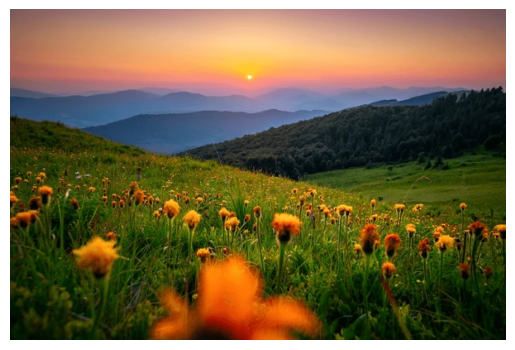

In [154]:
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = """UklGRuAWAQBXRUJQVlA4INQWAQAQKQOdASpYApABPikSh0KhoRIUey2EQAKEsTSyd53S/O9d10V8EM9pCegQcJod3HWf7/8s/ZP5D7IfbP3v/N/8H/GfuP96f7vsS+J/3nlIetfxf/X/zv+U/bP5i/8f/2/6/3J/0r/Of+L/Tfv/9An65/8f/Ff634If+H94fel/i/+n+UvwP/sX+j/af3hv+V+2/uo/tP/A/bH/k/IP/W/8p/8va6/9P//9zD/Lf+H//+4j+5n///6fvFf+v9zv+z8qv94/7P7p/935Gf2r/+/+s9wD/+e2b/AP/t0e/ezzdfM/uP4N/kf0f+e/uP+b/7v+M+az7H/0P895Humf/J/nv8d7Cfzn8Ffwf8N7S/6b/xf53xf/P/27/s/4r2CPy/+jf7v+//vR/nvh6+4/8P+18HLbv9r+2fsF+6P3f/vf5j98/9J8Nf0n/l/0Hqt+s/4//xf57/TfIH/PP7J/z/8X7Yf9bwvPxv+7/bv4Bf6j/iv/V/mf9h+5vy2f+/++/Nj3N/r3+0/+f+5+An+g/3//x/5f28v///5vhr+8f//9339yv///2jjFoC4cY18BtMHpSLdc+bFVt6NGJcsVNLa3XzPxbd3Emuk9Q6+ZVOlIsX6KoE6Yj9iEVZmEqNJ9DHh4DIwuXp5mp4Dk/Ykd5lFhXfrcWYg83j7BETPN1TlHw+ikhNqw21+t0vjBYaS8xhJlP3twvGcjiS1SZX6F1MIR37UDXx7Hi1sbFvcRvXINL/n6hHJtdbZTEHS+ScdT91Q4B2pU6q1kfJG3NS444KoHLWHRuCeG/GaSYB3nAdAf6Qv9/CZ87fT2QmRbUM47/exeMKBiltcj/6HRRIGWCjXR+NgV3/5kFF9zQuBQh7swc5nsecLMgTe6ezFiOQfNSSiRtFj265isOkthQWZ6mWQvvpz2hbyx4uJ9M4cSovwOUSVe2H/Q3EHrYUjSJHhtrLjL3dnb0qhVtVRz35VdyzUBB8mtI2Osm4KSjkCKObXV/UQuVkayIOmZPpDXd6fGyQA6Kb3ClDLohiI+ndTkaC+PlOdg427Gg0H1wgk8Buhk1SuroaDoQxpR2d7xCvFeLofkTVMTOekFnRGMq5TzQ362DFLiolevX2NgG5Odj4J3/8TL/SwVHDoc6dtSgJekma3AEg64eApCXYKn5Xfs40kk5rA3v1LoBPF6roijz87WyORQFFvdKn6DTyNyFSsOoDp8ztb9Q4h5fujArjWI9it4NeMGbF9RTPi5Gi8MfjjGth5DcAL0Xk7A94Nt65331RnfivrMPivOtAKyliwJaHqMDoG9R/0ilm5/mwN0dWMQf6/d+WDVGr/7m5pjsju+znumLOA2KqLrkTbT9Bg0NJMihPBE0837e5gwFZum0ePbZrCfeKuKmjagBkvC3McSg1uz71gagwcGS1C4zW4Zo1UBHtOXgeF8HEXrACFeEPuQPRhysXivdz9FjWucIZa95cBRYxCwaNdUR/8P7BZnJMWzzMr7Oxx0BaNoz21Eg7lkw9vqzpX6jHdG0sB+E11nqSSynEm4ntbEgyl1FSh90hla5WKVYvI9gzK5dYmP4dfsnLatUelxuNh+Wq3BAPE3sfcuYEZritXD4ba/YR0IDP3M6cdKLqi/InP9YBnT1U+ale2SeFU+9O3Pwb/1KnxK+YfW3oXusWw+Pm53gdNqf5gK1mP5z3qcN/sddiHZbQ9L4bAH7RBn/hxMfFzCPc3QlLmH3J40w+613w1u9EC5yun+HEVvK384lh0xBRZgSdc02emlSWDVW1BQ21Ze1y2tUL5xzX/3a88vExnVwA6Mbmvd2GjtV/PiUfHPmOG8c3Jw2V7VzY98zWDAl7rXxy5jvux3yfNYe/HP5b593AJ3o+eE3E0zF1XkfMwsWZe32+TyXGZhV5fvzPPlBrD+4AFpgcrf37cY+2NWQ4eS7LpuWI085U6TfV3b2RuJBL6/iuNUkKpcziA15tujAzelwK8q4beYNsEsM2556YaZpe2x/zix9mYsM8RP5GWeRElgfjORLBJikVFB6fhp9L97VPH0M2x4998nLOekAd/am8b0uYWFzqPmK34t8IYRf1TWOCM/Y7f2C4diqN6ex/x2cpZd6t9c+Tz2qTCK1jBUPLCZb6Cdpkj8DkUempulpXQPwrGkhXufMVQW7c96VRlJastBcNf4UhCGn+JdVYbnXdSEfyvRLOGy7BzwLozcwoUMu4pBqep7f0YvCU2u0qOIlLDXfRTQ5sYWgRCPNI96Vk+J/oprjdFO+lX1uojnIS5jbce0votHZtCoe/YOqdhip9EH7Ld4lXiHJqlJGlNO94lGP1CvCyhSdmHfIbHB6aoScbuMWxyIjD2O8i/+xLjNsZuw6olZezDu5gqQ1b0EgrxV9h+uToa0xUIzLiucva1IION6cLb/vHFl3jb4DuXDtL6wYwpvtOPqE39z+J4O0+s4jeT63hPFh7UWJ5nd92wXbGTN959SgiqFsma/rXSo+wyH3S6JSKDj6WCjMiBTyC6fHJStx8P14g2gcxQ0hcQIfEoRY5Rc+Aq7pj8b5TpsZqnWf0TZQI0p1KGUTS28tMpbxmourPPmRbYsO92Y+k4stCAeW/WlB6JGbKmtfK5hvzb8UfGeRL6JMTPkQSPqXaWu+59AGo/nMIA4x3R9aoCLhx1/V1uRZFxJK03qhbgpF5t/h51f9Gd+zGlCsNrUCzbPHdo1rzJB/nHPmPPb7qhzdNF6Ve04aRNbZbLd2+9JAI1cXRiWFfKePmgVaruEp7ru2SANk0jqhLUnEtV7+qUeGk/8fRJGV1bgcF1ndbaPvU8xdLW7+cqQBmNeMdS6kEnLCR6BDlqb71y/Esv7npteKtmTY+S4Uzu3pYZfcA30NabMxGpat4zIXkZNHBMop3OkRXCAdCIv9o5/EJiQlTxxM02rhQTsLmmGPnzXEPT3o5ZucaHMW8ntZIj1DeY7248eopd4/uzOWv/qRm/DSWvAnEj+3+bwtQyBaLcRdptLKYT1PNQY9xRbEwq2gT9c3hd3MBrmEclFsl6qFiBofp4cxamdi2a9/8oo0YsaX1HwZ4gMK8Jt4dcnjXhlZTgPJwJ1Z7cu+b7elybWRyNKt4gJA6HJv8PfePU1K2En1na3Ac26tNShEYPrHyi7RAD7fpSPaEPwuYmftkpXj7CM95OkDfTNSzKVh1ncf3ER0jL5c0nehFPq5/RBICOiTgr0zTXRyFWLeIdGAwQCJFtMmUf5VzWvOAEcXMdRU0KM4TzDDn4obl2Wty2upHhn82D6LuZ19nVjKVtVzur3ilaPgcfPE34PkK5MbC/WqdhxOgM8Tn9/hCUQffGncXv1Dao4paCy2EfR1XGN4aYi8e13hJUZf5D+Cq6oW95NbGGEL7UwqVM95bN+SkFxEwoc9Y7ZeKybGGP1XPaHiHkJY+REkZgBXx2IUkuz/c123C+J5sPsB2/yU8hIUJ01AyHfa59TPiamDtkKvv3UC4lek62JKY5EZF11rmKZ+PplvT93T2MYLTvM0FJOqyTNxk7zk0VG12ZLT2lS3GimNpv6uu8CCDclrODLaOn5HOu7UYH3HJ2t0zFA98JSInY0i4/77b+Ustry/Jb3/09FhVhBtvDT6n0/4QV6FT/HFWgjy4fs5RxNOM3oa3z973ZYzabjeUZsR7LqjIuMHnKUwZ/EyAXEloSg48jrveo7NF8ypXEg+Sn7Qv2+ovm/tux72YZWlSpGSXGKgyccCGp/3Z8N7w8fM29uk2l+BoawzkXmqfI+a2P1fmJjDqDY/U3BxZQMVnVz+xPu/Gb6rZ0Z19A2WnKtbEFRVzXZu6Giit5qhvSA2j4LeP140xh8i2/LKcBJnOYSJ8t+UqI3rHMMs2Gez/OwLbQZ0SU8Dl5l7pKnLuBmv81uZv54HWRnqBY9In/NYaMztDvgiANzn0lkPNbuPwBXmEuFN7gXBiw+fxpKso/q083fw51g9eqwp4nf3eXC2VesP1Jw09CM45+PZvM1Ld3IwpDvax8nKjmPLTRSHuLYXxeW8pdb/yR4MwHI7UdWyxHfyBM35JkCHKV+4TlqsAfzDZb8oUhPGHKfbXHZGgc4m16flTSz4v69ZCMLnhi4HUL2Sioc1uKtfo4k0ODdoPrzTkDUX2W/S1QRtyEACV+0xAdCIqiOvZnhaMrsFTVNhAPp4+gZ1qWfeP9qY2hUbjtstF0RpO048/NOVbz229JTCktD360s3O1/UaeIXRle44+3Ln32Zp7NP2o+/46dlHHo2MbN8cEU7yB+w5aLz03R6PHzD12u+5PdlVGXtAd/BVtY3rbnrSQJCLHGJrI262du9bUvXOIGLkXHKATG8c2A+reR7hkipgJTuCWrS0DFeho7sgcokFZJzRi8839fV1foDrQn2hI2Oj4ABKo/GtReeARXNI9NIR6GJQc5Ff+LsrSdtjKYlmjBQhC3lc5ZT6vHJVDe1qbpm81K0exjvwVoCcl+Hbynh7TMxuA+eGqAXj/SEjUUQ1ow77IQ0+499ZeDPk8/+45h3/bB4ANYwi4W6LL11u16uoNTegeIhY/zIeJ8iCa4kJ75wkBfAG1QKroOiiDlintSrHwF30Aexj7f6avcT0mWXK/xE5x4JWod7eQUBLh4Br7BpocJELX1ndom4PyxTCQxuJksGLm9lfoOBXZwj2nh901j8BjIIJ1F3m8sqrc8528QigG58dhl8zGuB4GAOAoUID4lz7ZAo9pIu0IR06idUpNaEzpp3rmfOwQ5I9+aKxkT+2Cdng3SP7pf4T/HDL0YFdh6+FjKiGsoxp1Qw3ui/zWFqI1t5UbI1XedCOcJjEG64YKgOYfN9DjyPsEBIdxfByn/T3udrjadvQPZSpeQR2ITsM3s6YO7uu4PX5viOtOYrjmT6E09eVZbNDIeo2oZPEAT8WEaJAgZcFczmG3pCcEL19NjcIHVZ/Q5d0xNklEk1Pj+JRfZS2MsSM9cMtpS9WxDt7ytFSz2DrXyhbM6j5Sv/ytb1/bSFY9FfIwWxKa8PlL905zm0DK44DuZ0lmxrQvcqfg6mCQHSS/yNqm2aJ0KqZ/i7Jv0mPG4xJflf84Z4UfSf6me7f+hJL5RxrZo5S3prrYIwOzVaakmdTy/nPYCf2cTMdZyltHckL/qOy4zHbUeKZxK9IciEffPNCwI8Z6wKq8AU9joMn80kY6yCFH9EkfFbrzBQnOwV4FK3R4DWgc05FyJ1eCUcNN/UMSKHogKxFl9XDTnDP208lB8Vlnw1goIFlG3xl6OYy137kSc+XfsXXMfS4eEwe+T9vQwxHOIl4ThfYG0XwVkxCPisGPo6uiro/s2d0wr1PwYlIUjVyF7+7mpf4rkc3Qnq+uBJ+57S3kDv24WfA+GTXQgTvLzS9MHtX9Jko9nYA+PoR2vq3xuqCW7HJAaORMM757gFeoCVAXV4NFvegQSiJdPZHZo9AilDshdu34xzzYWYNnbAwOglUGosfRP4LCh8C6phGJ9UY23YMQfxMAshbn/IawDHkeTdRlM3Exn6xjYj6zVHbcz3JcsoYx0sNmhJhRtdZLQtiUoIkYVqST7ALpzvOeetfMvjWH5r3KbqVLJZ+TMCFwebJK/08QG50fQqjGAoXrL6NTn+g8OZZ9JJ00t9jTeQt1+atpof+ur6++uA/uN8cPe8iiC/HbtlZHBj7KQanWj7k71f3Dap4Jkrkw2ps9n/UrsqRiCDtPUyiOyuvPQuX/JOpKmISQvcUzcsaau0AH3852gzKFUCi+YLQn6dUeGJwHtmqyvjox6qSXO4734VBP0sbLQxGzOPv3sNn2oTKFJw8lwWSQn8186/MMdVZkHqAnJu82/s3kf+LU9HBe85lGPKSz/2H0NqTZMhQI9Jo7uDttBf4CSR2t1gKtUc3pUTDNGgjxyKOk2CoZ6UUORmgxEaTlnk1ZArOGsfVNdFaKT+vflXskinCCJI0oG8Nl6jMP8A8eqTYNbmiz9OtC3gKBT3ea3vdDZ3W7exbe2oyFH5MPymMYHb1I05YMYB+2mNe9zjUN13+GYEJJ0W6YIO103GfTiPvfxAUEPDVKvZjGevxKlFzLHDGRz4OLj6o/q64QJdqbLL9FXILmjnLTuY/SrBWtyNv0zQPeCRLkbB6NLG2pzQdEe4zoP3rzgj3cgQoy4hBwmW1wdT8jUI9Xpv8yuEElpvbkq2VZdEP2sWDEcoZi9hoY7Yo1rX4kme+lOpC6VGiMO9VkC1suaeO+csnB5wWRzky+omLgn1TyJ1QyHpVik5N1KgPz0RObex6azV7hs4sonzT7DoHmvzMdX0nyAyX23xxyB70tcERzzoLUzHKfocw7gBPMkgFSPy8WdpbPioCpnUmIuSVkd0fEbqCWHlvMSwwsnNgIEmHIx2ebdhKlgbTDyEny+aHTrstu9woLsZBVbSg9Hn9+MwXXjzi1du+86k6OJFCLLHWwwaMhbmhMmmQO7anOHC92a+2JpJz+5spunB8yPTouoiSU/6f0O1oIc901jrKPDxuSRP1aE90oN9BVTq4mUhaYbi67APbRWLcYEUodfzSoftwkNVuZ+p4bbk6rVucajL1BwSme0h96sxEwmVX9SylmL6a0MrpKAkc/3h3qEhc6G16TL3ZMCQ3KVhSt0nLDO71Wx6hUKVfVDq3rwZcUowRnnAKINj/6FEt80A0ZqW02RYkfSN5SdKkM+BfoZ60swYY+PjS8sqB6px65uaIW98Usj6rNSzcUISedUcBf4sjNYMEO7h4wh12LUa4OqkLUa/k2Gnq2qx1A/G2+WKeF+MOLZeVBLRkbVnYQjWflJ9vLAho7w6C7NeJkuJ6yxjUkDe1V6BjQ0DAxBZQ3tH37puk0/nwAGKB382Y3i9F4HZFWd8mn464OJ4yWE0z+TjothdA650P4tvS5VccAudAw3rnoZVDOYjdzCMkhTNg3H8w28t/YMDjC37ZXg2nCEx0xhKnQnIFANYDVzSk109CalXSz+l1ad1RvajU49AZikmK28GLVufzU30SWlP9l9l3KkjEZFFOaGfmRGF4iqOKZ4ZQ9OBhLOXwwKSLtznt/GkDE0MCF5Cnde0ywOzv12GvvhWV6uD9ynyCl0/Rb4qb3e/ZthK4PrS0mZcZNnYW/g7QIQLJcpYznbOZzABJG9n/lLPdEhDQjaIkUQ0DvGViPALWKH/jWB+vrqJ5oEomfUJ2ujqEqFvrljI1LM2LoijkSiLD5G1QBUdarDuxBKonrAawATJ4VSO3w/nubSbvdPfC5qoNz5AzNO+d5V+wBDmGnf1ffbHlyLC29jAIw4fiFuAAsssiqpvDHPvgvD/P1n57ZgajdXmXG/53JKrLz3EqkDRaw7VGKzw9PBm+H3FHB4Iq4gyZOFuIb4XJw1FwV09UkrEcLuCtfeER2u95bBqQEh0VrfCKrnOV3R8GWbz1X8LGXjOCV2mHt/SOQfhQPkIDr7EK4QPaAVMWrNqGdWwRv238YdZByagKFByQC4iTkqD/D/4RC40VdYW3khfBiZOIS5GhXvEJKi0rlDgTnWjagrrgokFJE7dluFC3vskZsccPy3kA1nhcd8ON0mfCPIF9aFtUsFk5gdfKPlpuvHNFC2U8a34KTahfwS5VgpTqHSWBA+xMFYnfgXdCj6B2Q7V37XN5rFTOSpLe0ySB6/dX4t4EzW80wVc2czC4Ro0XaYZmDoWks//n3J89zd74E5rkDlZe5FPBjdl8J7KBOyw9OWeqULpOBgeNxKu+7C8ycVSQtEYmosAtwm6ApBUDf/XcwHM38EcwJ1GnZNYOQfkYq/C/tWYYgUOL+LTxM8SmII+tkT1ZgT12A+apoeKwu8rhfHqwGLuMZ8jRM2scswZgk/7cCvkb1MLGvwbqCcDTcye4i+uS9c5T5MJahRzcjKtkpj2JxtdweTxP4/K1tNjISOjCASGUvaqb05BLiVSqKdr19LruSZy09gJqWBwm9DWdWNcU+u/SPHlpl6s7RLMGSQCgHc4OW+F1g8k8YjjVYNYNX4aIqTpUYu3p4qa8UPeBh0q9dbNsKKPC80Ccux7QZj6bbzD4uElZmJy/pwLi+uCd1TtEZ236V1WxJThvnF1FuQtuW2DEwr3PwPQzXO/apEZZWRzxY8n8mkl5nhgxzMcn2CdvbuxMYKTEWs3Ib1v1CrFZsMCmrHAolIGxy1H39DEs+lW9dsSDSxm9RMz+B7i71spnc+x2jyecEpp3/57P4NZjrnx/k5+UEwrvaAblYn3f6HlVjNQlU7vhTl5bUBBsZoxrSv9CWqcxABwrI5mYIA3EJzxIV5Vuc2vwBn2Y6kZlR09kDjrlWJA0k+3E1uLF+14YCsMz60HmJYDL3DdfAOLlUB+0JxBfhhRnPrEApP9ITdwf02ZOP42fikjMGEmhGEsdql5c7ngkAYqGvSOJyHtMWkMWrCf7LOgRsXD50bOWEBr0KdUyvQD7dKGJyDcjIuAhJXRm0xEiHxXVLaXETZqSUDOEkjavdaO6CZrlTGxvxkou6NDxGm5r2hZCauBBqmVSvr1Hknr74afGtQndAC9PzruXTalzfBpt6UjchC55rK7OXp7Nv3A25Y0pP9FgrH5A1AYWLHjHzEpbfw7Li59hSVfN3EiLDNwWkyYSfMMCUp1RohHxZ/r3U5a9rAIntXVsugAP7yf946aLH7SYkKRN+ws0W78O2Iumf//jKdaW++nTgOj1r9VLT3O0irC5+zFpdGtrVInxYMMIRwQMjxJ7jo5GZlxALq96Rw/MRORfUn3zE5D7hNUIuJtZ9TW3WTn3gZajvw3Op6IYi2k3xOrjuIEAwZ3s/8c1lb5df/qz620VGRVEp3uSDPZYOFyLbGmAuT/RjJbiWdbi4poT64eltY5bAAagkWYAxZBFII6AQasLFsZtCdkTKJ9GADC0KRDENUF+AOEa9ewL9iKojfSbYH1HRsvoxPPtZW9hLmw2A87UbqKB3kcO0uAql1isCDwcR+ROC0IxOXOkATIaiCwO5gsBghrMTnFjct6sJiGLYAohzZH9h8kIU4ua8jKr6I8Nl2bMr374BBGOAUmaAASdhEcgGuQHNF0ca328QDwcCF/8MPx6GA70M206mG7IBI98+5dKKF14nCQXwj7yZTwW8GmYESVXO2J3RQfwFGyhVYiVHI6KEhMHSpWDgI8zABGyJHAT9k+SlwKZfw+OW4QA34o/M237ZIE+5IFigSGMhymLA4L+cdp21QQRVIdHKCLIROeBklAzG+vCjU8z7jsGsbMlmppqQE1JFVPSjUjd6ihenoNGyOOSzvcwAk8avRiwi7TB0nu9aJHAb78gRMq9+5n9ZJQ78HKeu4tAMMwyH0Cmg3i3AzntIP1jwjNLZKfOGSWxO8sD3Z0fYIgzxCmlJz+2xRYkOTnQLUqXbOyJlBDI8v1yP0E/5NeDDPZwIuTjiHw+E/n1gbPgMAYCldgDi8ukuXdyvkK7COZOUP6LWDxroYxzLtr8webhdvjZkc5e6eS8Pkk9FE/T0IVKjaS/Zht8lX5TyK5UMrE6R/B9xDB0iJVlAR9FTHglvl/q3sVYe0QxEvGA1H3cxjj8AwOa/+zJI6HxI9eu1VcizHnTteWoEP/6CjjXUHImwUEez836nO3qC5ioKmgGARtwRJL378PNx7XDNQRogC4DZ0doIjtaBUKcCJZbInJ9kUsArqHFFpvAHdCuY7Vh0cfIl8dEhrxXVzp+Ak+chwPIgjRqynogCQOXu+mfesFZsCWFjMgLi/UPPoF4qgQog4L9VZKLsEtCaWpDYfYjgBReNpLkS5GSEqAYD09I07NkuRNxOEZ8kUPOPENckRYgMhK/Pp+7DZZx11QE/3WG0r9EsqFmVXKZhUonsJTPxCIX39sqhnK6Od9MOBWnGHQYAES3e6IbMEM4CnGnEM4kEb4mxuAhCyJG00Gm80D0jp3OxMMA3hdiUxe7/LgCuuKAP8RrygQtQwNPSfarJEd0A1gp4FWcsONtZH1zb6oOikwURbEOBy8G78fxAHqU/bQcNS3kAAJ9ZqMKwxNnhLakAPwSM5lOwKZQSgFgD5WCsdyDEbQEQWccUaSUTNCzp2I9phtqelaleJ0HlSoryXWcaGxSFm0k9KgRYcVABi9ucQDFCAADXpqJkB0a4C+iUGY2qVxOFBAFFzeN6yBPi0HDMWGFD/hhUG/3FsejG5WQpNeu5FWnuEIeYimoQsBBnmZqPG/0KVZy21xUhZesYLEiH/eu3dR8LjB/8tongQqyyNCZPKthj8U/G+sSj3/HOqej4TxjaqaVT+KuAtCoIlRjBAmZCCYcC6GBmN8RbDN5H9+BQu3kUuMieDByy/Y5u0uPzyZ/Hc2CMaIOAECCC0EMLB+sUHMzRduoA3J9YWBEKKjDkEIFfUeGKAjQgeV1oAYupvAPcR2XZxznVVvAnidEGb7e+JLYapwIAVnQ6uDeAOcZ8xSVXdw4JDgOYPWzTil9+8E/aa190yY8AIjgsvNNxyzadWDMOuy7kIYuflUGXoX9HbZX/uJkhsMpQwgRO6w9kDal2b/qgAAggQm37pMARUQ2ZqAcnQ55VhA9ODWsi9EnO+gNOEA6DUSlykKDcshV/x6s/bJMxsGvdAKn4v6jEGD1v40bMSa0DeR0ACrjE4Y/80ZcBNFaZjSINxEZjihZLX55wMW8Q382BYgZae4yEp7ECMyRkfBLOSe4r8Pj4Yz7rEPPL1z0Ukey7hkxEeliaALalAVeYU+kF+U/J4kQWfiksbUuu91P6w/xtSyhVeQ4mSMTEw/AysZouKMA/krh6a0IUZn6k+kAPH8QCdB7gg2zuxWQzzpkgVxekcmx2KHED77uD2JZKZ+JTAgMWmGYWahvADs2AOZ6RNZlHya5ty+DfEKDO3AJIlo1qLxGQ2l5dXCT50MYDzyk03bs5LQjtlWgaE34+n7DKwQSH1FbUmGUORkpjnd1p/MhTpW+yqKbrT6w/uK1BofyHaQdKJAE3Oh29tG0LSEQvt3Bn5I6aJaVRPAw/a31Ln4AhWxLkIRvYfEc13LwJUEegKqUnFyf0q4dnceczKECYD6+YOyG+2NC6fSF4bHChw6Mz1m3x1uABAinFgIoH+zTd6DCOax24YnvIX8lG+sWOLAHAaWNdUb2cd/2rJ4mw+2SAcXgmwIqnZ4DIDM4ARDAAV0pSWtRxKLSijKlzpfBCAL7ACeEG3CfH+yf7ewHcPPG54x7y/OsXUQMz6EOdcgR9QXoqHxgO2+X+E6+PdUtdAhIbYQgI00IZ4r3LM6z/wP0PYnvGoIByDtydoB25BzjEHEuBbWjmnO0nLBE4n81LM906zn5LxLQ9LKLExDe+s2lSKdJrdZmwGv+ZdyU1URi3SmAkiLDyV5LzhfRrnKARshsrr88EN7E5yflrmCFQFKX96uutndu0IR6yxkqGUzUqUVIgkzYnD+D8enHRN3vBFXiAaFSnHSQgPbh105SKrWEw1SCXeAhhlDsKGTttYOTKdOupimjAC0ScwTXAEGo5y+ZoAwOCzSVeNdBDtAhoTToNyfyT4vW/wlAiDVHDZGPWjzdRDKWLCG+A5KH9O+KHDDecb1ZBfGw9hhIVUCoH8a8Hdon+fJLR9GDTEZ8GPRVtezMrVVGYnZRnvL1VDjnOjru7fWa8mU3EOcATbj7beMY18LmkBPgzxBr+wmWMUMI8iNJ1bn6wbAABEtykr4rstOzoQnG+ZmEsFZev0lkA1Q4g+gIWzkmiOd2U3g0FqLj3daY8OSlzfDmkG3AQPheCZcwPfjSVCNWK4g16q5EzF60EIbY791ZerCjQW6ofjRLZTP/UykaERsVa/WFAOG8DallMM5A2nEK4L1q+YTn7NS6AzoVemMcEBA9P4qx/IQwgNo9jEvNL6Ovj5ny17W3F2iwD/EWrzJ9l3hOPtuKmbAA8SVL82X/zMAaQVyjIDQNId3PtcAFDdnuUFosyeHaKezIC7RQ4QBs022OWDaek9liHFr9em1dOGXVMxhtjQ1eTpjtPyoZk7XOKxDywOi4B7yIDg7PpISA+SUwAOvwjFHttIq+QHCuRWfYAsgemomCPdmqqr9ZGtjt0c8XnthAjnQfcX19No4dgrVx8YDF/a0m6p/6LIOO2QgLgwH2XayuDgGWH0AZXJ7MV6I8HGFKsOgdo44Dbe0LcQrtHEmwhKMHgnW0BQKg/HwZQEpXgrmwIY6Mq849yrgmtkAAgsZI1NeZqpvRg04gvP25GU5iMUj3QPiJiTw6uDdbAJ9lawGDK0kP9ciEKzvjRfS3bl3qb3jRhJaI9G6S2E7Sg5u3/UE7Rwlg97qu8MOhzC+7+PHpCq6v+skgzsX+DhegDaQZF/WO3YgLoKBuWH1yu2SbfADsKQzNPhwSTw3C8YYcJ2XSlE5SUXbMH4P7u3ZsjnPNvlkjygA8CuAAR9fzAJmZK5KSEM6nuNp74la1lb3tUgI1VmAAAnI6K8OcrroJIctT3eVEX7QI1/4KAN4/EIiWO9BlEcVrtqeOOVFET9Fgyam0PT3/QnT5xI0wbNLPtN29r/OS1+S4B1VRxERFeMPE84nQwXR3754EhTQz2BDkB7yXhCz7s2WLfjBVDkuO+gBn3DKGytL4WHYMAitLpKDRT+bSOAP/l/XdE6cd8YNMhM8e39dLegzbPNsu7kAyBm4f2F4ZQX74U7izCbVa/EMXJEmn8cTYZWuzDibpze/atMB5yRZ8DB7M+gBat3JStmZL71dx2rYLrvpQu/mEoTJAHremD/bk6oaMocsQL0KvVoFPW6oipKde40dKZqr2NmCNim3n9uA2TLmBjCEsbq61YNVwFVPAGqLfnYFtBileoc+Q+LJCHE/PNATdgivaOWyKA1XWLiTpZUbBOHkiVOgnD4HtSQTXmA7vwRVtiYLG4D4C1uoxENcYNCqUBrUBGJ9txVAEHuAJKoTlBD3cUdytPdcPwBPumEGJ/w51QDPmJnoKcDzT82BCG73eWbWjNrwqd0CZHd8w+wWDbDyUN97mGCpcXK/GJioo8mlyHKoKi8YxKcphtJ3RGgTJuWFZrLUftzUjY9c2LuekRxYsqDI0rz84BSfgN6vABMUzgaIHTZkmX0FhWNyJlxETCMJq3cTAK66xF6dwTf9jTeDLZUCKy1Zem6w9yrOFmNdvaklJgcAe456FrgArHTnMdQPHuZEKeVpwCjckfWAhqheaCT/fkvgLM3SjqVIFCDRZLGfoTQSnrB5DQmTRApaw8cG54mpByJWvcRfTu8oR5htY2S3gPB3UqPccxXmViXI0GrQX5/MyCv8kcPCIA3FbGr6Tt4rm10kJEYPXqR1l598kLXHY8FwJikyicaRgy3ao3Ob3kbXyqvrgAzhPSHQoPMQwfyHOYUUuizWAOvT36MXfIXUJ4RgwVP+/hEPwbZypY0+UPBHGE9hu4RlJPAI0Pp2tyYb7Nv3+UK+lvtX1TjJM5zaY6rtI8GBFvP77EKxXllkJssxH2iTv9qDYJpX59mLF5kQ4J6y4EslJlTdBqR3Ui/C95ZV9KeM8eBfRg0CeX3naScuhT2LNzRBP0grK5EgRErreMkivVba5bjheA1JJsjiJw6BX2RKTOOVzHRnmqPkUIr0gcDCIKUT0GOMxKEMia+KmURzbEXRLaCkMxS9ywJqC/k/YTzD4bjQarIpEnDnowE6cqImBONbnArMb9XLqwYFZrlaTR7bgAZC6g4rPJ73fYqEsElSIxycPDkNaFfBaGUygNYEZ5Pc7ZthjHK9c+tV0EPF9gAGweQ4qplGk/cw+bXLDFM2kHhinY9E1jQa7UayNJFKy3UOTIhCC+HAQWPqdEfiwAVObQHderrIHRuWH/LBYGPuAiyQi2DvKhAVXRYh6sXiTo/B7VAfHhY+0fAym1RcISsBaW/T5AlcJwLNe+Ds11IlDYcwwG8oB7Wg2FmVgmuO7W17JYyZn3v9vXqy0za8bNTiI6ODK4kHAegDbgPisXy430Yu2/2d/EXvDpp0r94A1dTGSaYpmgr1Bue6SAinPtX61wboZA+qWnVOA+dKABw70MKlkfSmk96jsTdG7Aoib3OHJbQ32iEX/RoAq/hI0DMBEkH5QL/fiQpSIoB335kXsFaPxUAoT+ZYuYC+UQcH7IVR+zj9WLHiD2ZEXn9ZCkYADLST0yoqh++uMIZcCYC4U9L0d7C2s0UvHVXVgjG6iJJggGE5XO/RCztkDuG/PAaDoRuMbgU2SKbI3oZtJcJLArg7ADKQghkMlFVUqBcJoF8fBdKoAorcZTFxyG4Jg6hyk6dQbVuSGDrllcCXWSH+juD3EIg8RFX0baTGsijNZyxztFu4qGPjuB+CQaKigPqMqvIR2QErd6IJpPSgJ1YVkDj5ReeoEGKv4JMCliBkF+g6Pr8ARbjLk2o4nqkG5W5l+Jrk1ABURbKKAF2Q89NBAHEXQHU24bOYxdhEybkLSI64KkkRVjcEyybVhIe8mjtWW/CogZDTBujd/KGjDljKOsAikk/neyBCyIycinzKfcqI3grKrsAtIHEYr6ST/gwzds5UjagJwSZe4pRDJijkdOJsAkQCSCU6gMPmIz5D60ZELQOj6Kevg8OAjzd9fh6AreZHBJFcjBUVFaruXu+oVJAXDtyVJfRUSphiIKVRAIkPrn0L2w6l+BYoyCVHnhAf35JixXmAwU10kxsGyzQmJsM68VXxlyKABU1Kxiu+YQ7x1Ed1metMmeH7GFABDqpPc+T3RoJK3wHmUQPnd/qzm2+yQmM4yYwS2SvgoIAAXAPf32OZQdDeqyXUnaViKaqxOwpXjaz16nQfF5SBTDn58IlgOUvv13zkv7cOyhWKHsI7Fwdfd8rwkAJGHSh4nysBfkqWB3yEjWwg/WTwejfu4HEp/Q0KBiAJkYpaSk406pub8lQMQIVQT/7/bF3fMb8ZZ7IeW+H2M5FCHzDpQHmQbqzYrKLY7ZrU/NzmBmKCtrLU+4QOz6uiuX8tFkvaB5y4b0SIFUP/rBeOzG0dhqyKG7MC6iXgwj4812ZpVnrHA9F7gdcWxNf7vNmq785/2hgvEz/Htzra3o2fh5geGugKXbPt+uTarTNqxec1cHtUtNOfP+1UkR1f+uQBb397fHus93yDQ6ucmRa1onDGfev719Zg/cZpjDt/L8YBUT/SYwAbrRObjaS+JIZTnyFhyYA2Pftvf7xCP/4F3QLAUnfWjS/z0d4qOEAnZy1Nv+hKOa+0/h7vXkY30Q/pUNk0+67q60E5eLgWtvbeanCzYm9ha6U3Rny9Q7uwuv2oscB/mf7RGgxfVYNuDiSF02j2mUeo9hSE4zdllACeiA/jEx10X9LrQgT1caJ8Rqiaq+Nl4PmL/Of1+cvyzoyduQD13YfhbeQvY0VTScxW355kQR7+I3MJaX9mtZycV+gnEnv33K0e0Hs7h27W+YoQoOnaP3iMJn4X/snAGrsGnOoBSH2YKK6xLT8P12TnGjiRC+JHpFrzFeasNhU4m6reu7v5liW6sF0QrKj2sMv/TOV+gsPrP0RX1lYUVpkypfYX5zvuhnfQuU27GQ6eDr9XBJv1T7GfGKJK4Zuy8ExS2UQCSbhwg1wil6TvcNB1XCRlFeLQyAhJ1gNuWQ6WAABqOJmlk8j4kN5Tb5CpkLFZTrJqlBPuyyG8wZ8UogIBY/I+TWrGmdG6Oq4QKvGW2BJN9WUwAIQTZtiBiKIY2CS70M2OEfFSwc8YwuAiG48y6yRJJEdTiAakm2VqCn++E2EBahxlgLt/WFMibEs5BtgwJxEdEXUTKUs8QG4EGQEzuM0CBVGUjiVWMoFBwQ3/Yov0CK4SOQabEAWwMTWB9wPwiXZRGKz6LNELXg0KiN5/IrSlboAdvt7okX83M83PbCmwdzXRMAaRIWgZUsa/vd23+ZCtUc1MTmTh/yRhY1Jj+M/FMNHd9nabJ1ADOChH8hyM0bVNGAFIwSPS2w9ldl8dtrKHbKu3yVl4MQAQ/wTCRkVmgefAT5wE6f/3IpJd/MdweGSoidmeCsZHbKpHc8AhVU/+M1IABDLBtMWT4SHJh1UBZECwykAbV6iqz/LqqMuoKVF8+qI0xYKf8VKMJG4hiAokQw7xxtXep8yfwNWKVzWkrjq+woy3PO4Zz9ITnWzNdoLl9421N6hJawPRInbmEAY6F/FcWs6gXVsFG6l5pLp3pWWAOxvkWNKgCACv0VijNxzW3UZ+8hwhF1sMWvxAameAemFjdzlkVgQwtRuoWNelEJFZ5l+KW3Jas/7ahBoC0+n7vyDB91SSoyY/KkjAGlrv1L3P9QBADFrEF/gtOGrYho8iQofa35vk4D3FawBxEoVpgsEMGDELkSvh3C18TPStkS3I0W0q7qWh9t3RmNB1pXedGsBA9jvmCKiDQzAO6rklUABfNc5EqP2tg6EQ8KDzGy53C49OJS6U//JpkC4XBkOAEmDpQzXZz7fQuM05yxC71wDZ0i7JkQiGZKdDzSifsacjYtU4rdsYMNJQsw7fpaT9WDWgCC+Qk9FeWpeOe3YAC7omgDjVHtlGmLImcb5j+wDugBAR21RTJTKX39eZWKkj+uPH00eWcKvuqP9+PdfYg3sBUnCyOaF5WrXIHzGv/prRhkX9GdE0WSauvEtLz0ruX6E1Mny7b5jWv+z15+3fkGv+2FYXzWMNKdbyPGsvySibLOpc5oYSngZ+MGbKG0oA4S399GoLWyO/clcngU7IamsyoxCduJVb2Ip3my0cscZzu3z2PBVhD913gso0G1Txbx9rewncISvMxGxohhKndMR9+ymMFLSPZxpsandj63yHO/cYFSys25kvM4ZXlUKgi5axIjlGZZ3Yg64e4oAeVIGaEiYBNghzBa0KPHYzhSUDeJX8wjamSPuscqYg4Czz+Vs+q+mM/gOA6diLzVOIVXHfYiDBJlNsqkWFx+HjfwzaR/YJ5QbALmaFOFiauoWNrkC20JDzx2ZPxqGoGoT+XVeJhFYGm4amZToJVJ850ktKj7JpLXsUBzXoMauAhIF8bxLlRKweuifoipisLf/5nDYOoU8cc1gZHVZ8xT+gMjdvJbbegzAYzH8TYzRD+U6Aj+1CBxuG/PjIssptKRdDF4KgEU62+xTsvQE1Z+A11dyt4iwuLR0jU1WroeFHGqiYyOCfvhg5gZdSYlWMLginpZwisFoh+heqPUJ65MkcYLV665U5o6yE6cYDBZA493RWtHUJr79rDNQWBvSCQGA+7htclWIWHqn2TqH1jwAU1Jcik2hcRKjiCXUSUUYhvobDHtcJKJG41UNnO5llANK0d+1f8ox+/BRNLNZrJgdHQ8p5fR8UdpGwqaTEdQ+Xp621eL+jkqCVEU9lzEmpovR2JqqSLMNIMyCY7xpOKnAel74B7a11wXweeEnCAFo9ZOEr7p7hpIR9WuZ2vvh3ON4NEaqdR3Fq1Epc7Pi0uCH5HfoRfXCQQZL15KJCfJkn0pB6qGgzp9DblkaNLEpAggra+g8WssFSHIq6DR5vUJfFMCTz+7N7yi0/wjQJe0y6dW9Z6xsO7uAaXpL+FTpV4Qj94NKM/qsaanTwaZnuJpFo3H1KCtFvpzbycuywFXgH1+JLJ3zJkO3BWPgFmvqxPHz5cp1CR9M015mRKi0gBAZN9XABFyrtwj+oA1MLU0K/kAZuHtKUjkBLhY6/DWhvENaLj/orb/ruFAt/47FsLRlg/idyqIRyYN1un9eWD4H7/yj9NTk+v2l1zs5d2HSSAEbyEJgo2rq5FENQ+dSU5+5wT8FJQqSNAxiqk7NX7Yf5Iag55L36W5xjKAoIulFzYN6u4JudljqYfWAc8OUJUOwmGTJ9HvZvzjLxALJJuJuZ5Fv4BipkKdKrsZWN3MR/YaqBhTzE0OuhNP0bYxtMLNyVIh/Tviy5TFuwq8VTZ0fidInQmeOS5lR3NX0TvjkCbni9VAYuZljcMlpEpn5Ff5aTTuIACt/3/fO9nDeWsj9hwUokBgjg41d6JlZnmE9tvVITr3cix8bFYzIeWW3JAXCfTZ3MxUMDsOLqkWsxpf1yWUvQFFguIbYyC+svFJP9xMSE9KuV9YmPr6wEbogo9axVLX1TWISNqdsWvJjqlSJ4LmLTJk7o56yHHiQ5H+QZHa2Xx7Axx/aU3N/Xj04Tol2LzBCKUGccN6qsIKab4jP8ocyg0K+/0oCGaF4syusNR0nSG9E87qAYcYMIp/8HaI+rm9dBAg/odjtTk+AE8WyhdMSTYydod72AlP9GlLyYxC8YJhB+wgMKxL/yBaYQoXiA5p0lhiR5TGKl2mEw85NJezhvEjRNAj+PTtDO9e6zlWSg2LPF6ZJTbnI7zDBD30qghYXdmwBCKvCvuAVyyKKMdV7LbdBpIwhQxM6qVa7GDz9P7d4FQheSnXNFvN6teSS3W2dC0aKnJua41dkVXM5uy9xC1NvWQfmOlh0Unzbyzqwr6zGgTGFoEYrKGu1S4YCk35VaexvQcgZDGegHAuFDKSSAWYfZoytYCUFtXIIrD8GW2BFWaW6ryMeEsK7hBGtHOE2+v0bSLQJYd1UV0bDu/ZRxA53FaTlZwWuaGTWiTua6z78lQ1BAWdFQJbAKnQthICfr4ABbfXDoS1xwb+2pgrcX8M4Ox2ktkQJe9FUZnSgCsnURFPD86L4o7LCkJNZl7yHBKwNpHSF+V/rRpTYIDvPKMfMIcgv/MBV2LDsk0Qyx/hbOFlg4JNqjfE3WiCu6YAhxrAecN8ZmZ7ZIQeyjaa6hTSrWRUa/TNx7rifKg1wa0TlJmyiqSriQc5hoFR9AzTIYhJmhoGxDfG4gnxClsNjzUobh70gHXtdiaK/M3uiy6dsrbhpU76251bzgntW4JssjYLLA5mfIvwn6qgLMbc7eT56oqpMrPqMM9sITBOkrZwVYsTTb85G0+sJYSmRlAezm+acaANVYLz7bJ2LMk2T3VfSqmkBsOHyf+sesPWAXkZtnUVL79dKZJ+FgTAcAp+jkRpzz4sAZNSijq3thValew+dNb9UVHI559WmqUFidRRyeGWtWYvcSJi7O9rez0vnWbxjQDSEyt89Jc7xDA75S5D/M99FG36Du5Z9hv6fd6jq25pVUaeKp8EvgCvofrwOf1q3H6sAf5+mmiZiF/rsJIs5h9KjAQGHNPtTCzfglKqcMzi0LSumfXNEnZyK1Mm7T+MzGTHqqjov5fUHOcuOqhTPWXjIktQc7/H4gQehcAvnNZamyCYOLdryh6ssFbxzXRKUvw40oxLwrnHx6p5ITLm97TXEVeqqAakn4TAGYgqWIasQHzG88CBAyrAfVurnlDZ0qxZC2m6jWecUxTlhz4YbVT/EyTeQnlASbSRaH0IJVEStE4F7+fBJbk3OBB6nLKp+6XhUAPJhXS6l+QOtEsaMOHsNNCsVMUxdkhoqopGaqzJgEdheFZCxvCv+AEK4N2POzgYhJ2S7Tn0EOc5R6er+9XgKxBnoJMko+SWdV0+aw2ihbxCBeAFaVhLzPOV1lVSlZ3gpQ37OUq4ZbFs+47PwUYCcNtRjInAbduPWadwBr81YWb/HkASrMM7zu58aGxQbHWQeKzxvG4tUeeykbeDKj7WrB5YOohM3sX46CdyJdAV5ZTfwGqF4ozJMnKOOxpJvuMvnrPLbMJRQh+WmUzCB560PcXRjH7PYJ3iJcJq08EnAq2CFt7mTqeFWtoKJXGVtpXD1lh2Rm9j4sCYXFpwxh/v/84YpbUcnUrPJlbRffhynf5XuBRnNJ+lBaQSS//+j6IOOUkaZHlnairCNjvotrdQVxGES51m+qEOPAed+hDd+0QtkQoVURhIKyCIxmH9MgZGGatGv968hjb049YyZUXYYO13bL0iqOnXcePCcOhT5g94GuAlAEIzLUA53HwjezmHVTm8TFRvkXCnYyNKyOrtgpiQdg3oi3nPGOw7zT5qIuGZgstBLJkdikvnxqEEhz547whHWjDEDd7/taVjrXkcEpyT1H2zpFGjj9sclyR7yGaPfr0mFPAyyGYejg/ldngwOP8Dfd8C9RWml9B8haCm72IZIEc+aR1UW/bw0yNrHyF+gqDR/ndU10ypEkx4QdI4II457rJdOGEeV2XWtW4fpkXSYPTwmfUbwvZorosXfb4bk/nvZuUw4aTV3im3cm/Tu27/Y9SpjdyJRaCoFtEwCgAFJeZf30SSBZPREPuD0z2boOWW+EU6jvNGq1GMpObiAOYUO0aF19jJkoHYWavMA2i1gWWyn1P6q06hadEfYhI0jOfTi7sv5oZWM9CzGF4qmwrOmnA5+fYL/8BFk9kGhmWkJWjlZhzSGPaFtKrjhU2Cmv62IhyUDTizQZnjIP54+3IuH83Z1gTi1oEBdzcUK5yqR7unsn1zRFDXvtZrw+WunJ5kFl0zlnL4pLNHu85LJ5gA/gMPSKi4l6w+1UOiJ8uCS7+FDo7QFta+wRt7jO+Fsx+Z2DjKBo0facxlyG/2CFxHtuwlfCIpQ+gENnSVnuMYnb43t8EWyiV72kyjjOZ52jxvTMEl3dff40Vm4J8UFARg7otDZtb0JDNaToc24n/neNKGCsfOrlNL1i0Ia1Qo4SkL6q6UD8ayaRLJgCEr4bjqdJxIYjfgh5CkPYGg6qLOFBczZj2X2K7OOVxIjci9ghE7z0fhQhY4nTpciLRjfpAFYNcrKDZm25fYf15M9mZa/DKoOzjulbrbbiuvw+00HxQE/eyiTmrsrrhFbBAmcDdBJ9HN4+/6QulmLJ6XUErNiWeTWHczp2xXU42qJqszJepmwOgFeITh16avZSCmCVEMIgaDYaS2e0vFEGFhcKVNVymLiKvTiKKhUBtTCXJuROvQmOxJWthngY3abvIBnpL/yNVuwlS9E2JcANbltz5tXMOV0dIG3FuQcOeInyBu0vpe3sCopsYzURq5VUonyTkf8Oj+7D3+1anHnWXwdw/qwa7Der9JWK0ml4AIlEA8vPBmnABXh6EHLf7TA4KMfm/4b7XxoPSEMVOZLp34M8woXLMcgYyxHiQmPS+3AV5aP9DPVPLOHCFjerS0aJANItLDL8G4j99shiiA4TOt1y/WSqmpgZJt5MgProO9eI04gin10v8I3kOBnthUKtGwHQs//IFV+MNZFbie/MbQJBTqc2YBA/hu6SNbDVu30xE81zAuzQpVKkqhb+GjOZ/4GPDwNStQQtH2w7uMYSyFF0oBPntp7Ry8+dM9pSyQV1O4h2xss048E4wYYIcoAh87EzkgWPjaR1MEsWiPkBRzaoir8dgCViJxV266N6V9OUPwMOIYzm5Cd7A6PTljk0p534uNMAo2AUbLTT+xOFHBy25aGgJ7YRYj1ArL2WiIGs2l0AtDmgsCTHU5w8+uLE5yjyn47Ayam+65VoquhbhG0OBDUm0VrKxIPoBLE+G9uJA4/Nb8Xj6WhkJsYlgnBKp9Q7zr6ZBPJMXbo5HizHFoo+ttacSyR5D+HBNsArfC6kxyCjfEncyJ5r0paeavqkGAy44qAbHL1oXWGXzLnOx+7cubVX1wXY+IX8oeTQhe45RL5hW55C1zCspz/azm7QhnOkE//+0iSEMAPkD1rGl9lszOZcqRMqYBvviLZtwoYOoEXTLKqb9o3Yt2nChZmkbNYPTACmzCDC1mg50L6H1X6e4oIQZBZj9/wD6TWkQtkfd68zNy7eLd9BYBkr1G15/jUq1jVj3gjPsov0Zc9sjPbThK1lBjv8uw5ar9Lau5QY7rW0tC3WYb1IkP/0G+/EHy9UVe1wCevGn9/zNBxOTH3bocbmT/e+5IYaqo8zUtKiQqC4lHri1ppzHkvbJ23sYvOf74iyQ9EvcGRKzy08FT/p2pRBeOJgfYrBi0TyvEtmtpw4ShgoWLBsW8EQ/ks+wyTqc0t+I0eUEp+xdHeFB+7IR1iTlXNOyf9OcSGJ+kuT0ajUUkpzDuoWKgNBXoj6RokIwvU4zHWQ/BGoZzTbXhvR+H7GClweoutOaTgZE2KjEKITNPEYW/9G2PXD9msB07YUCQ+vR+d1DNuqg3TsXWR9kzIfQiLVYCXwRp5bkWOR1rpgTv0sp97hWFfLO0kodHpUU6cfalfdE8tCooQMlzMYFmrC8q5EKrwvMwpCngQQSGi6BUNrqH63FxPjHeiFrYOtnz3WQGsuT5QqnQ5VpnUOMwZKvyNTT/CTR9WAB7z966BP+z6XjeyKrmRpAp67TNo75GttwaHDPjDsAGAPpqAqPFQcPAbeAm20Xno/wQMnMCyyhHWF+re40w64hM8UtpQ3nH/23EBC4odxNljoTteyhfkxjipuJFe8qhMpSC5J7ITndEh9u/zP6c70+ks61XT+plotA2PjEpAl08C4oKOUz7oIBnfbr59kVQ6itBvZ8Zg0ing284pEFcno6zFJ0USFSoSZSUJwb5ES8GeeiOrk9OVpSDIyk03CK4QhyJwfG3/kjubio14bomHCh0RCkr0Qs/k0zmWs95uUyqAj7MfHDUOLeFj1vItgzj6Gf9SaJqtJK4KJs3Q99Vw1stbtKUpD1UQVLoUUURsExohsdGTx1bUAY8bkoBSqpQftDni0G6bX9PhYqtuhhxN1uGACphxuPKCunjFx/rA1WBfz+CEAZExn42pLh+NtFd01VDWsLtyHagJowsPcer5bgjls/hAip4NI0TNNV6c2JRmCSA0u3okI+hfryOBQA1PeSqSDV+Wav6zZ8fgT+gjFQ5qOL9o6OWyiPSNmw+b7tCKwDTnSqexJKP9vJaNiwYS8eDChOG6pQeIs0Vi7meLn04RNPIk6iA+wBQ2wox4Af712Fq/NUJDOQx3/nGyIHcz6sf/tQy+UDjN4a2efFmPJFrd+z/N1O173hjX+ZL6gx9ENJsv9QGGJQuf80KTECDW7pbK+x/bM1/JWDVjQeerXoAWh5wMR1sS6r+yzuaMdxE/led1aEcQGxIF41NmC/vEDNsDZIWfhvWyC7dSLFvyt4aqB5I5u08v85MAZQSynJzBJLp75cCfzQ8ysfYRVNMOxl44Kz1j8ajeMooEvICHnCYmCLzdqh/w+SvoHfiYsRHu5VedIEO2RB3YhexEovXh4Nc6e1ZjkwJg2X29JAbUxpbE05IPQ6SL1L80gxDVjoKKXM47u3f402y8+OjW8HaIGLDypS3ANbasPKQJDrBpewJ5c79M+xcrjz7YdFGGADColMlxTEO8/8NucXR+wfh0NkVQs2xImJPQUlZuPuRbIlEFVIojzRf64HqGNOdSiJTA2wLNrbTD1Lg76WsxM4YHaRHn8POD+EiZ+oN7HlkxWFD9hctkKjdGBU7erZnW0+5mZQy+fRLYVwDtoYrUsLhpMMtZpSLofL37f8L+/zWQG0SHViUSqeA46dUJrCybmfVeVUFLEjXFizQVpIh+EyFDeJPC/1aW8KoqCIYQgdnsvT+iLsx9SmfvKWrINRWwjmWUsh34lYjujhD1C43N5fEZlHgGxGlBmlTqpQYHkUD/ClOeCpPXPhKad48LTGyPPzeE3pDjCDMZiDa81AjUGCeRiXLfdYpnPKZv9739CtamaT2u/BtmzjEPpUDfo+d6FHkcdIjbP/68Vx6gtCHR0AtBbtCCdg3XwDxXElkazwTyEtyjdhFDOgCO+J4ZkROJBM9C+1/8mrUuPURGY7B/vDB0emlK6gW8CeU+qird903Z5z43dXPDr2xQagjv4JWNJjGQfYiTJ/MBUTxl/MDk4Ln+EZIsIqCFZVOkoh1RyXvYZha7S1uvHMJFIovkmk4UjYIzvyNTTsTZJ3JiJxqiLXl8GCalt70J5kb2loCX3EHdW0dlzv8pAr5JHA0Debr4KcMkcx5XP/sz+HCgDXS/ifoCEVIplcXk3Rec5t6afugDmfDWGVsIcm1v8GWlgRS8FrV2a8mJYECtn/1quB5IQVz9R1MyqHWDGp73272NFGDL7k9G2ACtusHghFKvMEkAenjo+Rqm8+0e8qI+5ZsrRZY2DBPDFYdVvRlFaANN6iiRI+VhW9hc/gBn/Jmj48fSzKL4PwevQ/4xPECqWqcL5gq8+QicPCW8pA6JEDe36oYTIxdWzN/tgXO/ZxaQnB6+ukh84T8DGL00HB5JbTD2ilg/QDUdTxOE1ve7lewjf7/5p2lOx0dYNViRk+ndB53dJkFNVljXw/r43g3rbQNbSlc7YdT/eOOqka/AgRRG64GJOzXMGzIbTCfd8LlESw1sWYV01f7aaycGI/w2O5N9TY7FPFOqvST8YsQM8NLJa/Cz9ES/L+4z9kefY8z4GG6D9le0ckkpfdS2MR84hPYTjAMTBncA4wSpVzX8yBRj5ceR/x5jeaCIu5HGOVFLdSGhZHRW1OxGMuf/Qv07nj/z5iLGTEHhjBLciFWUKxZMoNCK+sgCd74qVvLpp1WnbUehOb7t2v9FRsu09hbw0yqRhgOfFtop5dXfcssO90l6cp+mzUCKNU9dQOcpU4kj6/4NcP7+kmt0h42aqQunRGW1t5Yu9Us4YeDXTZjXPySW5Yfy98xo8LDFXKTFJJ9SGiD5WZDg5VjOD0TPzwdwDLHdJPGAYi1cBN9ZemRFTRd4r5xd8Hx9W//8GsSORTQkD3iHxem1q4Py9w3wtwLj0OWI6h4htqJr5v1wWA4gf/1MMEVPtA8CThy4dLTzWGnNZGy/gMzibImo0UeLYy5RjYsss0wahD1g2rAGLJ33MMQJ2HCkKXMapUDK/hYUPu21gdA6IHyEvhuI1VhSJ7HRa9YximIAZB0ydBkkAnM4MtvHiyjHdMb7G+jeejepA8Ryi4hZdzaiS4bV5MCBWBTvv5aURzkX7+PS2UqNX4HyWdGdJwBynl5Dmg/nOsYhaZUPTad2/lK2GZ5q2zoYNjH5bTcPvpf7RnnQjItP9+3+HqtRQ9EeZXq3ilY0Mjd4xpM7HtpEqhMAfCo9MCO6XG/kbH4p5m9SzXd1id2e0e9kbtaQbbvkTUIAoQ6HdOVv3cpuefCTFuFzkWGY0rlOSVbvFcnAnThIKfmJu1NqwZQiWJstdBm6MW95Y7j7xd5NnOiNY37AQnz45VIWZ6GWeOuxiq7306q0BfUGmQXjSIzqQhvruQ8IjXdcTfRyU6Gej3fR5q5H+DH0BZmH66DbKp+69lMOZ+LSA2duT0GunJ6kFqY3XyDwYvnTU5NB1GFTQCbs3VPaGCR/0Sl4Y+E5XbrStwa+Rh0GuHu8QSVZ4bC8HtlcxIcqeTIzh55BaGcly8VCu6kvC2CXWY0/SLPJeuy5yqux5UePnRDS1HvdF/wW1rZMSMlVnrtc9OBEWldG02ei3WL9eEXqMwPMzdO55u5R2PWOe740KBcXfe642jQhl6SRG9oFvAL2rhCSXFGrkHPRric6ETA3z1YOgHAEbNjuSUuizN/mPzqdFXqFXHPxtpj1byjYHMFfyB0JCNvBtcenMpRIwPLW2bSO5gbI4SKlqkO/rjxBK7vVUdzxzYX1f/syP47DN7pCcPRKa4x46Gq46tTUuaDgfhhHfORf97kA3LJk+1u4HXv3gtE2xF7LT92v9kz/e8g5RuXxZNYUvX6fHjxnK5gsaeouRzx6XGVJbwf0o/PrBvdXgnGBprRihUYOkQobhMv281yPilhXXys3FUWyEXS0BHiTZTnkD1861RqHGu93pyPO8NqwHc01ZUjLkvcLJK6k0Klul4zKp7AKCUCrdhsopNeABf10Gys117A2awN6KrhG0IO/JZVQ9SSB9VyHu4KQB87tHRaY+nAq0pTGca1RauvexJ696P+bx66UmgVPcnUGIKe8E4QAGAADhWvDA8g/PEc03jt9G3eYgsC291SmTeplLPuPAP+kXcmZrCfW7RULeZLUB4732hvDMqQGQtA4bfg0r/sRkezMVSi1235kH8Y6pSHCTlqeFnWQcAhFtDUhuopiDMN1EM3OvycczU0UHx0UNX3fuUPIK2tA83+X2tg8BhqPY3iMQt3V6sVFqAXPqedVDPpYfUH2N7yj7LXr4RZxNpDk32s69EU32NTog3RA9i52301VrkjXe6aRT/Eotrp7WZrgcn/MD7aXbA36A7u4w4c0KuG0yiYRm3cHsCcT/FaR7WyfdKDbSfYM8zqwZmNYS47etvEZOPDnZ4C5V4QAniz2ATjH5Ix73Qjgf+w0pvEN1rDrYbYzodp/dlK7FlQapP2R7+wvJ55vuKVViXKEHFjFS57b0GJSz1YicRFEE0D4L7UrgGaZM0xiiOJyy7e37QGw2tVrnZGIgsgm0XXaTf7U7wNKvTGnwus6YPs6fP5w2bKhRVISfeE1WLgr4SAQlxi57pTajAHMJxYgmgfhHT6hRmdn8lrbeD4Du2oyyGNQktFCRKPQJSnYzexrr8WuLD0qTce06M7O4rncg+bNYMA8p8ahTUF3xSj5RwlXF68uhV4naOO0CYvJaRXs7xInVqbBQNKJemQUuSDyOb9HnvnkYFDLJNMQDYaTZXw4LjNG1sFLFw4g/8ndaF2rGPfr7wWH1m++u0ZCGgX3PtK6HY+47il8nPY3HwrGf2sD+oik15P0x21in3ElIHOAyNM2VxNawj+OtK5QDbxUA4qTbHE9j9xachMLk/5DyMbfiCb9l3p7cczBdAgFPscjo9nSKN4alL5wZF+MlzwlCA2v83K7fG4hSMmqZoaGNetEGHMdMubyizOgRBgki75tBdwzwX5Kn0w6Lsy/wlpZSHZDhYztY0rYYPe8Y2a0SPntzXWclJqFU10zG4A2Yr+7VbEQ9HK4PGmM9yasNAJ+4FCYBK2xg/HiPEu3/vpKcnTPRAAvBBFYw5COir7BEM058LfsX5lbn47MAhM5OR+U+kzFSnVD3HoVMfgef7Y8HWBFMElf7p+Oj8GK1hbwYvbyLPflRlk8pD01BJCJbGnArIIcoaTpgx+SDveqszrmQIKVw0OJBBlYkRpA0v7XqIihEFdxxQ2RtCkDAbgBPsirPz68QczYl6C3Pfp9kI/Ds0pY6QN3ZZKWKvx/fH23ZuC0oQsgFyQ6qeLPQ9S2lyiBC6G7ik/wJSkQFSszXMKiWXSffr2sDipC4JrnTMC2lKREZd9Egf3Tge8IxneUjCm+3Oki+/+k776VPYgZH6S2chODeMZX3EpCNOp/1DdIHAi584IDlglUYqIZjqHYlMRdO6GQuYcE9pHFe6dIkdX4hx1JTgVK09khAhodhE+PZINGLIlMsneT1QpOK31MO0ZVhhBbRMJXQC+OdFdBdodtB83GgKxtYsP88VcRWoDmxlXDRqOfWyD/1BG9lvWPRE9bg7Fze85tX9Bae3K5sakhlY5Fe4+qFePtkPK7wfLltu1jkxa2x7boRp2VIa7wifidbDgi0rJwxGKQ4Y5OcHlUuRjOnJsSrQfEAnHXRFw7fUdL1cTL2UuE8bfFQk4PwObGuSbNnTYblmmwAPYWLRdpMeRCdEPl+EEvOMaLFvW0AdA53GDPes2TYK/uqYkV+6ZHbAE5X3Vw+WDiDLZRY3FzsDQHRFvXOpFvbhspPQzP0Sn0TGHx7dnNjVm7bLj2cICMYxnUB/ETwC4GtOUq56qCk4IgKxrJnXQ2DIv4GLebXfVIM6OTFVn68CUabTd0Lmej36m7cbFEHQqJF8Tranr1VGveN3qmRTK8p1Ylwu5Pdxu1VT+QTDtBgrI2IurQP8NJYNre4E/79DS/25YxYqPvBgRbT9Ti4uwbNIquonE9Wrup8Qb4Ez8j0jiy7Z2s3p/iQ7DfaFntk+HIJjGWWKZPyp6aaRQutOQxAGHINBOH4Ej3hq6MvWbmUxkwXE/EG8XJo9zwf/Oh+8chWj2sNisBqsW3ATyL1RgH1EjxKVmwjVF2adnsd7DiHvz2oExRy9PHll/E8yVrtsq8SjGQGIVanq3K57W0FSNtl9TelaOO3aIaShbTuWPoltmCC3ckAEC2W7kvXB0GOMp4GC0UY0zx36yzFcE0SsR06k02IFD40ScKQ6PZ68lZ1d8QyZRXhmy3BI1Z9vIyy8O5JDy3evy5U9kbld/S+ATXFVVMtQjdh7FoD64xStXOU3/Le/12VsLhgBXS5OXZW4fZ1ZBp8ghqGR/Y8K+s3bSGdrvg7FddnYvXwnfO6Sfn2hREwB+c3uz8zGNZ/myynaL3SXoLzI0kytXqs8zbKNxdFYz6ar05lfqD58xFApuvcCRHIcWqVwLlOVw99jIFa/qFuIuDwui9DNfugXugM/oqqVJyNXC2dtSKflx3j7dPfqiFDjPaYMvWCTiRMdiw0a58kwht9MZNYv1TSNNJuQug21cBqrRWvsd+vtaWIFYuEMrWZqGMll9fBeAGf2F2ePNHTWnH9o5Qc7vX76LWUeRXoe787gqlYPi6Hz+IWxe06KbuSS9Unf24bO8dRqxjGgSkhVCficmwcBE1zQfO4Sp+pw3T+iCwCit3te49BJpLlwQl5y90TZ17fKOwYqzhJbo2QDfWiM8KLniiR0IS68dUYH+7gC5QEU1iX4GhQvdE6bal+ggrL/ac5DGy2obVIbq46bdQTS1uXGBz01vvrRLzmY1/rvCHjX7Ia6P9PjeACuk/nG4tOk+WoDCzsl4c/CDRu0KGVOEh3bIHYIAfL7ws9wJybQs54bl7UbeJoBfji9NNat/GDEm6stypgukF63Leyq9/OP7GrLjmxExdPNmDFiL48Y+58PstvG82p1mb6Rfstp+sL1Lhl+OZkc1weidIKUeNrDPLerc8WYwne2kFcmquEKpHNAzdUJF3hjJTts050Y3mHX8szumJlFu18tly0uW+LPBUp/SdAwITj8BxC8W2WR2yEPhv4CvcKea66vUUnAiVKrB16loNpDyE8NUc8wcdLx685zZ7jjV3nf8ScqifujCajOy2eFRrIMntXw9snq4fXpE81ddKPbyogGO09rFt2FBnFW+WZQS3DkIDBZ/4hHNs+INtafni0U26lE8302KtF+9SUc/royHxXaVw3pEUcnXdTkWHRZIrXWM3W5ETMF71lfRBDQtz+nbRxMIKptKUc1TgSwLPqnqjqnE+vkrahsVYmtTc2vRVja+ozLXFUQ0t6hzkmFemIDIEDVdR17ng2uziYJ3iWzwnzHMN30fx2ZJuJuMXA1gLE5VOVOeHgzy/PlvzpS2BscmGyNJnWw6qmC9/M3NTFF+rQqoz0XjGslQ11qEskXDbn+UwdFp3aqvCzWzkQZkIeZg1sGs6bVuDnp4IkyezoiYIQZLUN25BlDyZb4qTLQYTyIDLTQ16l5n+CGuCmjBy2RNtHLf/vb4sG6FVD5bneLLUhMGM/KoipFqSIAk59qV1BuM923lcao3v4Z85BITOjsBpViXU1aD7R9bRFUaEGCW6ckvspoG6aSRrHiF8QzvSi3xoq0gaCLlPiC2WstFSm654wFFlJmowN8QzNqLgLPfqC/MIEo++jh9kJPRAtVyhgg/wENIC45ixs66y+cGIORz8zpFk08ciqqw0kIP680Nc6XTawRe66TzL2000sc87kQXQ8h6a4BzG/G9amClvz/0e4fn1qr4uPIGf81v+l6SdbxlZHxBUXbUZgOqo+DoMHWGgOeYpbfJw9kUNtnzQzztc3dYj4Dr+yaAAXkkcuPzL7dyXf//2SI7IpTswAT/3iNbzJU+JpuM5gNPIqcKGoCFfxOLOK8GcTOoFmfuZUNj8++cFfcpxPFLfyN8PnkG79To+QFQSpbPiQ6mq/1rWVokQeT4qLEm5DUBNUFepIazh0v8M7ZvRanrwnYNH4VgLMAiiEv4Gj6ZWOswPmvByor2Le/yh/de0O+KyZk8upCoWPIJlxSG7/xUF4R2eh7+CCUhq8XqLbAM+F4vQy4JlFI0WZ+2ayftMowiXdldRAr5t4TOlALoNBYvi4+Ggn1cct1jhGW6iowFKuHVMeuytOcNAyYHigeJRP8lLgRkDSKFjyDfk25a8KEd2Sb2hDGQB8ptcvYN/WeKj+RU7j1c+e4+p0+1hivZx1pnv6DJVatNsNtmuY05cc+H4JmKZDh0XBoHanKhmVoHgBcEuh3xL0JWM2fxaNAF02VRE/8ZPL7pBir5khJACvoCqzHKiIgLbk9V78htb1cMknTvw+ivuPvzj5kOqIBnXf1iUgCMpivprGaJzrOSsiOHnC7nRTVuRVchvdSkR9e9TNXCjk1tyNGUputKbpJmKcV8EAgXnuJdQp9DetMR08CnxmZ09Z/8EP30XHmVrLxnQgdFCQX4+WS308FauFyP5+8UbUtGWZoglhFrZr+nWlVFbyKz95gTKr8NPrIJkX9bkdDCdc/+vF0Ah3aZ2O5ZXkyqebdAij7JrKXozsk/BC7roanpuIvDNEA2G64BmzZQkS4b5IkIBIJomVBpM5BcjqCuEK7Wz53bZGyhDJvxiP4owrJP7oXceDSQ0wWESIiw46P6e0JFV1R6J9ArqqHhawruWWxkTzA6NsPFrNciWwnZZVSLijNbPvzU8YvDjmljEZ5WoVlxComtNaHLmsvdqFGtDa3jKd81Wxl+9yCwVmesFZ9ztB1rgCDT3AobKfZBYxwZye+UUeultzSOiudD1kip6/YA+67JMQk7Ij1KqR0HZPjLoFqkcxMYICPR+lYb3eKTBGsU8qntLZRqvjkSTKjvuCdRi5B0xFXPsu3dV4A5EpSmCh+3hRhj7TCtfzoKXX8/1h9zflwLFkF1W3qCmN2UlZd4lFu6ML6k8wDdOucCn5mmmwEXZfc9IZCEgkcUri6dxCyarvygFc2Ga59/UvcRY2Buh6NYhHgwcFsq+FtuWVjj/A0X3oTuY0lp9ZIRmcDzJ092O1Ig2mqZi0yH9GqJattPAYxtYZ1AlgfH1+xmwclbud80phGYWNHPgCCjnDt+fmGC0jRxC7tg+c6ovQLmbbho6ERIGo8jQiuCmyUJAa66ce0bBYRpLLRsyMggJ5SiQsIpZZT4Q9wd3Y2I74DJIIr4XaE8iP37dMtksGv6Qz5dqhyB67Ff2a9RxftuhTqWu02h+9abPdkf4nFVeOEDMhCG765GyEbUCdbpmMPCGP6sXBnd7rD238kSO9PG5V1kNZgO4lOxDgvqA+e0aryqknpHt2btCRCdodbWHkrhy/Ry+0QceBSYFDXFgaLivNH2XmdrIA2MFS3P2RJmTzxaNHMM+Vn9ZcC23V24e34v7qkIfHShdacmygaq1X3oawvr8IvdsjIr6JKlwgKigU2VycUwK7zUSsOVlv+6xeZY5tjea6uLkZDIJx4DP5l+OCrsf65cp7dvtwtj1VC57r62VS2bAS5WNA7zvuMq5efiK8bC6c1z3pUieptf0lfRZysTxKKUJUmw1fSXgpJf2JfwhhVmXXNPc05eMBEZZ489gcKYt9Iv0/+aO+ccZUaUn6Vtd1KpjNG/XxIeP9BF7uCIE53mCG6/lzCv9kYMHo5f5wE5SzEPHfgpTNFWDIbz9OYADsvhT3raP7oGQ/9w/u+UPIAXqqzNpK8Bf51IKOnmNQC2f7aIzDXQ0jw6yJc3XIzN/G50W0SWC5WiTYko3prNXjRtNMhKZgqvROV33wjLAmkaUYeLlNfuomVQmr+WOeV7hB8Fj5SSMD4zky9b9s0E7iGF1yyqpN4V/TTFYMdMvy54UBn9B3hye/iQjFoY/gSV1Nu/bVnWO6WgErHPMZpwI4NJcfNz1a4yexxCqBuh+7F3MOXl6TAQmACUSOH4tNiyM4qtQtI232eik0jIv7zHduXDCqfVk2i7C6bmjikqCshuKc+CCUO2Gj5ja5NVHHPa3ZVo5CeEybmUgaySO+OpNziOUhD+9ltcewaEIMNk5+wXw/Ip3hFxkhdXxNoBPeSu/rxk4lzskAvne9KqPVua6sB/mssR8zYShuVFEpL4OCVQcnHrlCYU0OGy9+ZqbJpZqaPZDXNFWDZHSIxSa/L0rpgudl6A22ctjXYB0oNRlMumAkE3npMRm9SyCcFTFdZM8A84SssPodVO5+slJOUeyPpj9mzgcNRHX4tmUBo3n12gYaZ10cuJ+Hdeh18TAg2fjWBNLZjB12YJdhggJNm2lVZUVbU+TusqFsQPekjwHRjQegii5oh3klGLk9mY/Fl3DD6kBThkOYQ7kWL5+HE9TZJH0P+RXME9c0rfllxmffWYtNlSHjJNopvAqPeWWAZNhufqY15CGE7b3umJnP+pe0S9cTIrFH2Ow+yEfHJBKa/z6Hq8SAB0OWGTbB1ZEjkGOerRlS0uyO7bNd+n8tGrHfvEajZb3z4Fd0lcZ6N1yPbOqC9I6oOUB49cuFSs2LaHcCHj+W5ZrGEExzaiHr9msFpAySVZDAWtnZf54yb+8fG8boRz9Urfg2GTXNPZ7nnrWdluCyiVwEQzHqE57Jf3IF3vfJKWyatRadwLHhcXw5I9GXGDckYhsFCPeWTQEC7L60CU+i4RQPleGAUaEZreTDju690Rbpc7b27bOWL9bXCCR+dqA+XFIdzDE1k0m0uuPrExHk7impHBMx+Aje7+TZud+YpmGe8kKn6WKKUroP63b/oo7M49YHTlQdlzqgdx2OdcRMoWUtSB//JDDtG8CzKCjtwf1cfw/yxjr8BB8Viu9QgdMgGpNTyozNpzd5vM+N3Qu2lTjgGRH/hRWFVcghl8oa09weJmxLTjrQGnxGsY20xDRCW+ggDtUu1y3hf4DA+Sk2wVVmDLTlUSl6qfWyluRhZ/a6ptW5WZbdX3S504zfRZFhV0QzafkP78yWRj+tj94i1KoDFovkBOgUT4NBAvTRPR3FXUf7oerVP3xQlkcgG0gRgt6JkTGbRI8flXm2e0Mcfta27Pwhee0RkNLztFv/Ic/vKTa20SL3c4tK9GL/ub7oTxCBJwBfuWncmJdKFofSosSN0rng8LT2ZDSxnCJR5NEGAXNzQHL7sG2Wfb+Coj5CFnTGNHwOMoyIktN5s/3iAezskusKdHG/bDSm08ONmPc8EI9qrwfXRh+qhjVqU+BZgl7yPGFGqDaLWIP+pyhXTtfds3+UI27bfAgv6drPYoabzqA9k+UtuxtRfbkxynrW52wOxcXvX/mBIZ2fJS5Tk8TGLteBX4DEUxKDNmAy19oBblkFvA12ndp/3w0Wi0wTwbk7erCgrbVCAPILS/zFr3XLVgAKPAejD0c6sKVpRPhqWYpqDr+1g2rzdHLp9c2fg+LoWE4mYzX6Pg98Ynvf3cowTgiLpy2x2oXrBf7fmLOVFw1Yf4je6v//h5e0r9A0Kx491mP3JTbo+mHP5B1AAaq55+guSsjkZb5zNwofGacUYmW/f+O7tXpMqobJcJfRFn6U9ONCnHzRcium0PDppPHqydweRNsKyRjJWvHKPU4L9yp5dorR4XlnTSRnpMoZx5JwnafYFj3GuhnMC+kZvjEFf6wpXbGi6CHd3C6UKbLtEl/BSnumoaHUmVGC1JioxlnyLv05Xj7mCfRNvz9q2zS7WwL5jXgDDJrAGyhmjX83mtuK6pYWexkhcVr38EvvIB8KE4x9GScc7GWiHxYYrh2MRCVHYNVNI/0x5vA4+bZ3vdZhM4P2rHiaj4IttduiACjdf8RdZIvHpPHyi83IvkH6DwCFNp1qe7aSCf5hL4QZyWiVejMS3Xttlkkcm8qMZIume2P+59+dWsO9JA9fS73/MGnu5mc4oLCGEnc0K+yNue91NI5JMkncYeuhLN85A9E4vqS9P7ixzePNV8pBJ98E9m5FltqAtVtrD73vStQIWCOIGZ0WZe6TeVulYZfsGMtQvGnwqwk0ILO/0CYHZh4HTt9BWqVtRc1ubHPvBNjoWZLUUNNnarG5SyHm5Jyd6bvKder30jYB85VD8mxDrhyh5219dYzdfRKNiCZIoxCbTwvnvpHjgQjazmcoManW5AbWfSPWYAFMywT2FFpxUr/ty1rI8PDogP2HDEhOU+TS/WHOd6R/DbqzaOGBD3wmgMgZa4tOd/Ji4RF87BwjkGwVLZBBdmYx4NS8PweSdVVE1W7J27KcgGr323WdGr6nnEJVBAzQ9lL5zux+CS7ulENZrh3+PCwIXQhba70b5foTwxonrhYaVuvl0jPE6f8R9uySC6+0XEAcnqct97JX2A04oHGnd/V46erUBWKHE9gTc1CqN6Dlm15NqIxFsExVOK7rddFF4yeYw4OZdWKEPK8d5m1UfPIgtyRyF6h+ZG/a9xPhOp1Y1GqeS6HQlLrgl1O5vjhNGugewxZKxFmLpZI6GPv4NVZ8p/zAJ+L6Q31FXKyyn6B1cz3+tkIfM8ysexTKPaqCgTQ63nK2jyhS7IE1lRRZweBa6UR8+jAWDOepGeIpHYmS+hj6ZJ6xG4xyemvvELnG1OPRhmPnZfLuHiqT12P1yM0cnG0E5mqq+btywUPKbgwz/Yu5CN4laIvZTWM5gLfYcmXiUiJAHtNBG1HL/KWsMq5uurkv5DkB2eGOFbx63EDhi6+hoiGhRaDGqIXPaYYuYDT0noBuGNbBgiwSoHT+urWvcbBje4YMkXe/0qEFTD6vYeJ1tgdnPFsUAtnLrwJPNVUbu21GPPlPGw/xCk3Whf2Oqbpma1CzpH7JZitxjOGgpF+wp/15e2k4A5KbvUjwicU64AzWZ8uRr/dBT/t0QK7CUJBVBbgX8vHEXkwmCI1r4MHVt7OwEV3bN1CKJWGGoJT4wONrnW9H2xyBoS5b6DJnPGu9AKyo+e8C+8Zcbo+l/A27q8sKPY2OU/Us/d5jmzCfmQBOL5jf2E1oUvgC9kzE0KKG/hlR6Y7iz5mjHxVZqJOdrlHKwkL7+z+BuVT32WJK1gAppjzfqXQxhhcVus49amure4QGloI7K7udmCln2+qONeLPaAB7j3k2nHJAYKnq6aO88I4wjM8VOBnY+AiNCeerBnaIUnDL4UEoRwOKTXBVp2oO6Rkb7hhILhMMn09ZBpZXq7P7pul8bi5g5amlAGpJnwLHCrKtb6kRhnhcVJpQu8fzUMeRJfs9NLdCUdFXwTRZlMxLSol1obRZLi9mXbk+LVoOpmUSWts7LfKjYzSrosdBNepM9jgHR6KQ2xBv4QvhYwtKskUgQgH+zk1qPghtaXDuZ4gMYxUd+fyLZEveebtXWu1ukQDgfUQx2unU8ozxxAz5w7gngeY0s/8LBENBDaWEzOLbVVnYNsWeWvBZhVJxGx1YRhBaC6cuRI8dEw1dzgYPGQ6E2dbsaivbXPq+O38J2lTrJudMzOLbZ1CrFwE3WXIIhx9QuVLBVSieI7RJ0xPiQiZuq3Xu8gu7uRg0pYq28tpT80chyhce2pShshb0wP9kfoplqOFAOIvqwufodIGQjbruh+xLRkicjzRlET4fD2drXklq9AjOrf/YwGKCLoWAdgeg2F5+pk/WnjYlzGo3GSEBxQyA2WRMgXTUt7rd6+zdCHbnJACtMM3BM8BCPjSzp2PPkUq7Dz5ub+iM6bHf887yS8oNEAgEI3jdJIdLI4gW/QLRZMKAkWaQspK8ICnvt+JZEpbdKAzZcbQ8FP8tIPcM6YjHpu+Tpy6vBJnMD7kc98yNRno6X2BXCWMz3BXMDSUEUhSL6HHbWRubZoTlHnX+oZ1xsZkuooVxrVhpQumLukZSEe4DThDgTSYZTMnFe7qtTQVKQslJgFC6GhC9FEtW/1A5ZUwglAHL+vxdo+whuK2R9jJJvO60TOlxTjZWA3l8IUgJEII6O/1qblJ+XYzZ2T56cKe/3DDOw3GU4w3bObUMREZ3KNOrMZcRd+CgEoVQKCgnVQelZ1b5H936X53xqVD6jqgo/RfqXhK9OmBSA+7v15jbmS0qL/Ynzj3Wy8lEKxEIgJmZaYXNmdL3dyl7YwwSGy4qOgSlfd5FjCXdCniV2DjmyiX6SFplbZlTmjNhkh98kW/5MU20u6Xh54SE9oVSP62BOxc4S8Zvvp2ar8OeVyLbeSu+pAaRwmt+sYbYa6LQ5onrU6DZsuzMSFNwiaOCTbUA2en5PpULayoklsIsVjdkpJEa2KQl805e8ZhlbTVRRL+IkkmQPa2PpSjJMC0b9B+VW79y267m0Nhhsd+jM1S3dGIUhd/3BTRJJvdGPFTX0aWKW5XoLF4Yi5TSzp6kchTZBMksrkJGWw/Ky9NGP0Cxt99pP+sadpSXQsF8sLsUXdICibNyYIMxDs0wedQFMjBq2+rBLs0OOI8sBMsM/wtO8MfMq9GOkGsYtjliuhrt7QMKp1xyF8Y8PJFsaSLX/FGahmITQz15tVGHipYZKOtFOYupd6WKsHczpPWHfRlkZFA5wVp2GfMQTgN1SxOnh2o8Ctsb8Xus/SGI0R7HCvNnjCLKAY6sdQf2xL2t53y0QNeVURgHgrBG8n71PATKVPSkwQPbWcmkoZqV/wQS3esH4WO4ZsTlIcunPoDznW5oiW2VdRGTBtqbzZVhrC0gZ+ULEiLDZY2WQ5yolpk/lMiKV8xMByyybqw+HE1YiQ6CDKUuKj5xndPDE4yH35bVrzTVUdteXQt2V0mRHMPijEjTMnFboUFgv9tHiYYxjHTgg93ltMOETa5L6mXKFC4xeLU+dx276d7Zd7EfP3qqMxjzrnAHQd2eRROwOMydQeVjwbhdwVkLaePIjR8KvSNZEaeI5/FqdCEf8AcotbagmsskcdurRoFtK6+adxNd4F4gDieVan+o097D8he2RjV5R4MLL10fQPlLZpH13bvR1XVDetTLg5wd4uoH+gSVzqds+mW9kCfidZicv056AHe0t9VA6dhmWUHJOZaDHzw9rBK5ba36nv3AG1Kjfh0WU0uW8PCDvFmOhFeYhxBcIacff3ycc8GGPFxU6UZ6p/H/V8apFGyuRgRzUwTnYL515YQ3GJM5e4OeLQMvl47v87vXZVH9PWSB/ADYAgkSE9892ADZB+GlWgXsKZrn7xqZIYG2vMrAj+TCWmVHGCP6i0GBNMIccikvqN5iWNYR8lJ9K0+9D5s1GOtLVSghTHJ01ZJtn6YQxm4q2Ntqt0HMTZn731IJz6B5bRZiUyo00tuUqJfvQ5XxhGXYgK6D5IvcrL5AUeKfVHbs6huSSm223yqbaGzaBWF23bvBlyfn4hNDxS/oyLq7+o/BxtSB62NDaI15Qk0AIzQtgrctYKU4DVFX8mAFUu+4P3oPgGdKFmAgMsMK9ihHWWqtLQVOMySy3buE2fF71ilkIC29UMyBGyLAnX/+2lMxEgptYgAJO5Ip/TXn6fZZPPFtCCplc2HQS9vpuOUxnVx6IxTO/t6/99CuEQvRv0epi0mqIBhjUipdlr41HoXiPyA47Y9ZetyDgEKs1T4CCXABmDrenr5Ofs3mgP8WxaezrJAI2mfpmrdlWS3g0SJS+pufpOlFFbYtMlYzhVbGtVHCQGxCQwR5bGb+ad5uCvccZTSEgDojPRPTvZ8HDjy6Cf00rDuVBZjQ/tKjGZKhPkL35A8UjnM0Q26VAlEc6DxVFssxLbNC0HY8nLhebdC7khl2gKM9egYL4ovcJy/G5NWwiwqNMIL2IHaYLxWnsokhBsYw6MROjQ0SUeF/whgQaJUjdzaJSDWrhJzJvJD7M2Fo9bqanG+KpV+PuD+G5Y0b+Dl2X7estT9+Y/0pCgnfM/fYkFlpGQ9YrYZ6oPhXlRtgwmKit31nOz/Ths5Gl6Pt7G62vy8x0tvA9DbZVXeJerT5WRy6KmfB+yI6UMj6rCc5sBWenXmVXGNFRUa2kINFMN0S3tioyNt/1oRSYaINWsNJidECdZ6CYOABGfA5KcSVnxnGt7I2z4pzBWetBnRUjDPpkIAuI2wtzei+VIihAT5VdaHSxLqO6gtrVDXnlKXiHRVMDI0LLnMVNliApXdREXHIa4d8kLnRgVfN4z3sV2lCPN+8GrO27r2m9q7bs+N1m71TsVHP+I491NLQ7TIXMpA101MNUct2NOaAvsDN8xFUTbPduo4xggh45hA4g3IxsBwEoQ7YO7ZRhJguqbeIrlBL9BRUnPK8ZXq3OnZFq92qyda1nkxwZzPSz+DesvHV0za6pjnPoUtB6xKPIsp8TOsnc9HkfeT+GcDVA9iIJlltsE9+iXsStO+y6PdgTfwHqWxuEcz4GsN3hdCuKipatpzGW4IBB6EkJHpo/ivp+DnZMTwlIWDUKCoJZdmkdFmOnic19mkGkQdFQhdEaFX8MWutbctsV9VRmUx5LDrxFvgqd/bodBzIoqx9x1ezGMekT9Xxy5e2bJJi0tUCNP6rfrSY9y47+KED48p1qR+67MY1H12EnG27VPzI6Iqhbim7JtXOwZn7Sz7mOYI+HtEkAnmvrRTAlNoQuNQRAp2j5zMin3/Vb3v5JcRygSpqMjlN1VeHQeVZ/vnPZ2Z1m8hHFH0wen06sy7oNDSxiGOPh9hPM/0/ZyTgYstqOrVi63bnJakqdiHyCnbWvG1452/Ns3GG7SyVe4IgUQjWaJZXbzavMGOgfxQZ2ELA0jVIR9okXGLn9MHKNQ1U6YwhYaSPbv5HmklUCbC5wXckfdmq0fYSPUox2Nl0qIFZbYkmzC8lI3/b53fzOe4EIH7NjrZV+l89rK5bk8JY2NkNp3UXe7MteOusrbh6kpq3/WEkMjLvVvHMYpaomPSf66aiAsP6cMvNp/YaWk68uDWnkfjt/B1ottAaiA0axsjZOmc1BjdwfDlYctHjO/12OLyV9T0VqDB6Opn8dCeyPswvZGIC6BkOZpWMG4a8huVrp+q229+lV33/+HtE8nc6CdOrh/WpTzxAlHP98rgB0unSZi3QMGGXfFQIQmEN9YA/lou9s6+U4xZy75/WdwNaD4Rce0LDGpSCjC5bAKg08iFo7UDHi7VkbG3cYAZ6fIiQI2f/QKFtE5sSTP2Yn8W/9kFC4mQMUg7mfywFf1SZ86crn0pzkWYbyLbbb3/HTYn52BUfBSiNPR4dimqp+LI7xnEizxHpz/cZHyDWDkC4bXjVf86XxL8lZKOtP21/Q6hwKvUGMxaSqO+CFoDJZ/xWg7n/ih/NIPg06B1NxP0J7fdnQAnfuO82N+WTen1bmvhaVmTdpR5DGzaDaAkLpG9Lst2VkuBHrHLdupLAbwtHX4uXTbP61kL3P/OcPjkQ2oeqLsY7mRmCZ82YQL1duYBAdgGr2Jxl3uv+jMEN1AEP9g2K7E6iZKMqRflGmawgIrXEQqFPW5+hb5TGewObWD5A8PH+Gky0lwSrEjJIXvMSey5xTHMFLoPodjqqE51PPs3G3q0Ny35qRmKu492AyktMh3+T/1VwDj73eUBKKaNClm8/tmh9I9UnAuHVDHGGbEg1wVwvk/p+TJ9D2QKAbV6qr4Hc2Tzb+fJ0/0TCJ0aX0xJQ9y6F7FPADBvXT+G2gbZ85e+dzrCQIlJLDzjTecCMTUvAVkYsUfoTC33zlnVHV3lG+MqKyBjZ6U+NyoarcFfd+vGP7PLYEe3C4hVsmWMuiRUH/A9t1lFbbyBPPTUHkE58VenZ9GajFwP1L8A8Vee5q/VLa4Q973tchKnlZd1vgeucQz5DTY0pRdkv5/Vsxc6S83tjz682cJ5i3ktkw0BRjtdaT/+NET3aWs7WFIIFMy2gu6OVRsl8R71BXVKcPWLHDXLYxez2A1u+pynV9vUZCX8jjpJX77je5fiOYbUZsW1UQkkjIyTnNaLHgwWDCt2bDH3X4S5oze1GJZboxS0xk41VKDiFfniwCS5GdquXLiCOPOl3kpXLM/E9GKSPR6HP897ZczAoPer5bFonuBzohE0blJgBk5v02tyoe0/7jvMa+ctmOADwsjUcrZO2/eZDAGVXG9pa7jow32IJTCu3T/OLWRpr40eo0hlI8CkMsHD78n2pmiaHa19clbKUcYzk+73wLtwVwwvikKcurBABidb26Bb4w4CmS61BS3zxbpFp4leT3l33Dih51L9UomtyPtCbDN+o3wFay6NC/d94PBfk6p+3gOd92XK0ieoEYLYGGAwKEQ6l1Ge8cX9zwSNnzvBq9twERhZLsOt2Lb00KvefDmOx/M1xPEtMIlTSqZBv0sPPLeyKk3B11N8KJBIWeInx5p4bfM5HdSxVWxR1D/4ZzNtkdCK+TO4Fwh3MbymmYPlGPW/cujmTzrE1lFm8Md0cCJ+hlcV8YfFSj5VDwAOkvmClskdQTgDrEndnopzAEBm8jXiScVeLkPJFVhvrqT2QQG2UVDDCRjxwkvFf3+facircpV5/4TMTHu1LzV0tzonuMACpvE3QLar67FPs9acTSiToFe6KORFdBpj61TqcHYfqnMJjyg/ezFyJiW9LG37Q4aN27aQyaTKHSfGv9GsYgC/4ftDZCIwVJ6K+DDzLchRHgsCndgeMRpELsfllVkST1PdZ56Zfz1G8/LmCPEt3p0EENR2zlbAm3L0G5JKVnPDDe6FV9vwOqYpaBOcpUsKCIXdUshAfgoz8wZWnC1dkplaUZ+SSsrKM9pB+EfGmCUO0PyXLlrov0uDC2kTIslFM+wlzwyzIFXRMngzFwk4D51Ir0LcXAL0JlKfzlHhqYFUp8jQeR1SAZweMYBKlkYV25pCGPxaymEQZ/T2Evy0jMEFB+FUh3Pt5KV8R0mq2VBdTAwymbUEvTAUVAwu77H1cSM9xUU/1Xi9wbvvvNKBpBCyuzOLtsQXJQnvAH3qPXLjbEF8C5qysFSgxv6gYS7x6OPa3Ybcm2YGPfcjYF9YvuO2t6rkKT7IVfyBE/66p+v2jslQlRTm6SXj1WmWMGSiG/nfqqwAwxkUKrgieQtx7n/D8TNuqmJad1XFCsetSiNeaT7AhXe3TP+tSYxEmAhxG7wmATjsIm5LndT6C0xnVHf++vaiiXkf1G0gat908sK6sv10Q+u/h3D00njk90ib2MfTF6mN71foErqxTsv9HAU8/dqHMJpzPFNtYIAcym8dRgFzYrkN989VPViYVaipd57HnymD5U1LkuuVJVGijVdW0IL9MOaMxiaMRbxRKS+q+ttYi15CBj7OcYtNQbDDR5Ny6fwpilGZI/bcizdoObRei4JCx2VOfqpdHQ0ryvzXBZyjT9AoWP9HqxgtkwErtR/bfYU9iG/IEMMr84KHFv3FXcxY6/h/tEME96rDCf194jeNv9X1hmrFc/oRl/CpNqKSszoeT1Df2/q25z0uXbEdRYluN4O2e99+s8cQce6qwFCIDN4GKK3Kom8RXXOfXDiVBTjJ4sBPJv8M36xZHtu58vR1LqZdt27hVQLUN/Q+WDD35scg5NC0U9tW0HaVN/V84d+qqsZ1df8BPdiZSOUUbvzYXCfj7UOBTcDUTgk0g6y34iVb0xqZYNybWnE0lbLBH9CpFkTaYJArATq7sXHwsz7rR1yUMYt4tSUlH+DLYvxvnIdZ1r9/OTU2JXO2DlXUjqtvNQWMIovraLn92tSZ1VWkH5wpM1H5+HmnsuYQcsQO7JlkoQwedbHbid7a+cJV/aFBmf5f3T1YZLqfzUWy04+BuFmISROk6GiEaio1rG+eZp6eAhmWxXhQdv12ku4RNzTTptf2vNKFyVkd8NnJ30qfvMvtZ2lqEINmwHgOnkmBprPT1MsT+o7ZMCoAtTW02HEqvFksChbljRkYlkrROJu2bysA9OSE+syoyioa1zt6p++6K0S1CloxGL/xW0vOqUMSn8pjqyau/8TVypxZfFtR+oz4n+8FDjZ250qWPtTFeJXVRgW1lxF80qtfk4AbDAEyd1Te0w1hCUScoYptY+3bxni+nnhpvNuQV7PEitMmwfUocIMr0LHLBehvji+2X/vTlbjD5F0f1muoYPwCx6E0lSuQ3YaMGCCC4vUUfYgrGqmoVbIdj76i+A4LS7ez4ecB8M2GdgZ5J9maIHFvscHaFaptPaqCKUkxNmfNC8EcnGWC99iMpEbEIsszGbsilWEsBWXEyWA2U7hld2S45zsCfsM0Kr1Mmi8B8ART8cFbnwwIGAJHnTL4lTUVDIA42XOUeDwpMfcosN4/L55zF6feONWzstnc8MSnRTC1JjVkH7oLs4UPvnj7r50F4+T5SxWkbEvBg6HFpV4eu3GIuabP9B2vmHzR/iW2x4DCv+gvntloym9Guvv8v9Tgx4a6jBpKvVscQie27Xn7ci5ZrPecWP9wI/yt1Wl2PvVDjq3VntgDqXBkGBrDE5KMYBb0a4cMeQtlWoSRVKk25GJYF562MpdEnCIl4oDB+V/mgZ9nr03ipbQcyxzT5nI8+Sk0s0FRNXLd/sX9nBDNMbN5Hp1WYE+zJCVxoP2DnSDUWdT7MefOI6GQQ+pjqWp8VNW/n+yQCW9m+eL5qCgjj7NSfBVmldnoaBPSZBsLMY9gqINq5NpuKrNHRPMnXQwd6nT5Ll4+rWdKKMjcEzxgpenR6UUeXCI4zSHnFFAAFbsvSmDeq/WMDxM3wkfVuAl8vgq+tVMziUB2YZwgNuSvkx+jYJ1GYgqFUMiWVkvuealyAmCKNDr1brCRfhBZ9W6C+i6HEuG5cXehNVAjTVNKcFRgZ7kje6aJxVW01l/Z++3bCjt+AIXhZ8um6QUEEuTRYa3BhMB2ZfCkfhbg165DmE8CQfiPXqPxXzf3Ba2FGCQmIynSJFyZK9Y0NHpVzZksE2fyA9FnWqrMmNRdG4t+29ulzsFrCF/Cc+rlzce8TtT5zEApzkKHS0fdaXmQnu3cc05kGosIbHDPrIqdbvnI1INBYAK6Ew7fWe7D+YvS7lSiiMZCCbPBU7Qa1eAritLIA2hewhqwIU0OLqftmByYFP2yBkGTalWyEQzAmZR6ouSEDeyDaPl7LFcNyUU8FWQ1cXaXUp1qm6rz6IKG6W13f2W222dqsRwmaK3Blk7sYCMO2ADwdSpB6S0qcx3J5z8yihiHRK2I9ObGYmcKQ4eSaU8jq8GBfJzzOU08EXYV2CEADjceVhth5HLdFsgdpBqzD4yCyiqqoC5Pf8k/ZnXYXOX2KqnbtCgVCI9LEVyX5st3LW6EOa7iJ+FVUoapF0eVyyfKlRaE37EbZBrnzkX91212ouVc880hSJqlgHU1UKXmwb8ORw9BCHEgzJS9kuVMjsfSwCd9ARsV8wsjxJC1wD42o5AoHXoOc7dL8DwUUtJh2BpjhK2XQvzFQvw/RpA/d9P52MM5JKt8OzWUs+yQH8yV/i+eWJ2eWB+I8V0wsLp02A5bGdo/T3eGbHj3mvJX32fbdF/WL/aWJwGOpCkDRrez5Hm/JM604/WZtqvVTIy0fq4JhI6dzwt6DdBPkbfrf4POWopCCnXcaDz8/uNjUzod1xW55g0GzHRQ/vkx9FbbvUZXEFjc84kTwyISlJT3cLPUdzUT1v4IQXhHUYWHFnjbcyKudnRjpc4omZBEFqQrRqWkagTKxmOlJVqNNwBl1emzjzY/l+PIwbsj+/jwMgvhlces3DBQBVy5v2xfrCRcqTyIh4ZjPO0o/D4kbzuogNh62ETezru6UfAcRNcPP6lMhLYorKPGpRzhInRkPOs37ySQKBmhzNGjMQS8Q6AQeqdFBf+ddJa0PqlDVHKffJTUKNySVxkji5a9OvQX6Fb6ds8Iw4sULu9CPMZc0QDzCX9fV4A2ELoMSp0CqcQknzHbQVtFvf6eHBrVJQ7c3kMw59aY/1HsVGZrBIW/g2ZY7OmPeGZbKkebcQGjF1N94bSmGV9o1/ir5xSJfcoP6OZ7EAeLPeuAVnVUAi2Zu/5lDJ+W5zun5E7448gi0fUKMUHOqwFhDcOYkRmUmzIhIHFQqcltyuRqxmk6f96MoJ+2Xcgrbj4B9u3XTdreK93+VwQDKQnv0GTxHwJQXq8KTZKkfvcLOSIi+oR0WZ1jsf4DUqZbHpwLM2YhlTZf6w7TkqCDEz0qvn4EZoo/++0zPjC9ltoLzqVP6Gjs/A9jw8sabeQiv6zW5hiIGu4uwCpK2XavGnfOSGwdYiZ4UTZTdop2pq7HBYrs2W8UbXoRXeGMbw8+UjuUXPon8Hzoimk6thWiwrWfEp4SaOHVTX7MnEKcrc2lywdbTFg1KsMNYrrfkTeKGktPaKpCfti5Goh+klyD/VqCR2TTLranqGafn2lhAPbzLUzabKf9wpKNoRZv+1ZgqYBXDhg3PeOFSDvnfjSvsYpVBBNC9hpPK5w8lbS2KGp2arQ+1prIAun6AcmdjZ4krFw/B60EQl//zddHyj0zLvzxBdlf4D9xYbvJSY0JBzOah9cntpjhNcrUpA4YQ846Pxh2CZoM4dL1eLVJbO4P/Y4RK2IpsbHnGyfxZfJ3lFLzxGMh5M9Lw4ej4EmFP9SELzyReSiW/UW4gPmzjEHRBH0Lwq5CL+LzoOUDc2UVN3YG6gjC/QtRIXNOVRpX29EdLUJ7E0M2dB0Ea+FtG30R+egWBNX98wZPJLPVZWSAi6JDyaKScUid8+TqBwHjq+E+fJfAs6xnkl+/DpFWqwQHVS2TePGf1uL9Kf6HF4V+cd8kmgsSZ35miQu6YX8aszklc7fHCO0irBCKyNM8OFxVtCainOExTXLSjN2j/e3ize+n47cHtmlulBAqNNZPY4nrPswoC5h3Y/noReCtw2GRBVJyVXU8bX7izj9wHpqc+FrkfdNs6NIS4XGPKwZ1biBvw8X+ucpCEI/C465+SjCF5c2Mz0VqcStNRlLs2pKirRlsZWIbZHwHM3NRTgoXPLBVeGjzumyj4+CO/gfphm0s9XNKMFjgpsL8mubGV5oO4ibMZn74Gby9h4oJLfRvpkk287CxeIekH3Oi9FEe9zsWLI6JllDw7N/7DT3YLkVh1EgS6+++fO2z8uwUM/+KEe0ldc24v5Dfo8EyTSAej6iZ1JK6eo/37u1dED/tJ9Qikrz76TNsI33gHM7UGlD0ZpEB9rhgio1QVcpFj2yuW9lcLOjro6ovRpGwpwo5aKardL3FlnO4n1q8kB7hgRSvYctcmf9fJkxbZJc5+l/cWBRCsckUb/hKJ1tPt4NFD5DZ/+5WHksj4XYUgOmPggP3yFaErFaCR69TqFB+TbUfJUxsNYHsry6juGqs4SETXjk+36Br0LA5W3ftBzeCZmbWyJxyUeH+6XA9I5ODmlxCleQ/AQ+27Jdt+fn7/IkAAfNP/UmQ2aPnryQulfrVlFASQrj/0NFdAzbGCab+Av7sh76tcKk5z7WL+maJf0Q/lx0qCcd2kcsF/ifMlVoHLK1qmj/JWlYlnPI3m29AKJNLyshH/yyR57EI5rkndzcVBkiAnw/84a3W0VmY1IwGP6aWpuZsjTumLmD1a6tfzYyEY01lHtZOi7wCFCbZT9EpBsBuqP4eV5mnv3gyuLW6EWdLP98M0JrDoA5ACkN5QqOMKh5RBf8IHaIgmt32WCwIB1XF7UfzourD74oXvuIeuxbGOfQaX7PKJy9jZjCFov8FPZH0j8WNdnng/v2SwBOsVgQfwvf4i5WRH/PDqxYq21SCzEuBzJTs6M8mLX4o31yzT+tBW6NhBssIaNUoKkDYX27+4LEcKknA7CvguzdousBxMiH0HjOKtT1YfjrzKrL3TnZeBlQuqG27xNPOQyzxP0QPP5t7NPf2T9zS9Q7fkarfL/xexPc82IsWCL9wHeYuiNyiz4eq4mk8pr5pqmaZ6r7LWq1GJSNcdZ8UpL4h44olUJSJ8dc830QlL10ll7ITnB1y2xEjwZbOBWwewZmDN9dC3qNDiyKXaLQeujWhBzvIpJXb4FSB/qt7igSHpL0kKUjjxUKKowXZG16hEvpLmLmjh6lPEov1DnxLKPwZRQ5OPnJ4jCVuyg7h5/7b0UN1vDeVlAw75AEr51DnnfbQl7SXbSu/Eg+Rhvf0eef6UhITk2A/feMVX5aAE9qqU76U852KQRcha3d8CHZCGm2KR1RjgIDf+LiLj+slP43XqwXblwF2ScfvPSmfyD5+qgdrvTUN0WBwOajJZ/lcxT/8zpH4SX+Swmfs8+rpnYLGOZwzxaPsFC5b/UzmYqNsKCYw4iYxlzfNtY8dV4xsNWoJHTgIkPI1T3IaWR9kQ8pJbuuQe9PdZtc2tw0inyQSYv5lrJSY+m/d/lpnwIub9QdxeV9m/O2oR5ifljklirZvfpZQG81y/kl9ziUX06brSX5zr25fHY74IwfiOetLjDjLbxFPy3B2CbIzR2nfN2FTHBy9nFopRw8Lme7q5ilH/CFy60VOBf5+4Hzz9j+B7zL70JLxivNUWf79JW59/NNYzjAsUM6DCXB1GEzWL+mQ8ld1tMcx6thdz03r5VXp380iQPp6scWK7QSgpo/AJhA6FoJlQSb4noqyiLPZPit3Te7X7HOyGM5t4noVfVamlisOMc9XSbjIcNfiI/szqSOcVv3As0Hag/RhDs9+aQHOXBq4+WUNDam0Z9ZpoCBIYAMO/8GVsxaGZGbKcfpxupspRVWO3+qesvOqVs4vLHQUrKjyLBhF+2Tgg8qx8Auhpjx7d6jAFIEkGiYaABHxkIpHtXE61wjoeLrT5/fSwFT7KWM+v/rpqYl/Roj9tDycQP/0AcLN+mU/XLgFP10ge7nX1Pk2pCsGyDoN7fDQR7+sl2gwzS43Ev6X8JLKGx2vwOR/leVo+WAkYeM0xkcVVXQBA8JT0eCFI3d0xKgBKUmhFH1WK9r+88sdIEtIKl9GYQXeS/8A8wEZNjLYp9aLKEM9bb46UW1ljaJpiGndh3k5OdFw/5KINdlqbx47+fPwVRo6lc4Bs+fwmkDqpRscsxm6JR85pHr/dri+wiimzi+XDBIxd/0i6TjT8dwr9NZNTl4NO5/A1H3I/XYtXgJbaZ20X4BkS2Vo/kgVgg9ip9fEQsn0DZbGuxviEDImwqERKRe2SusrGkQjowXeU+wdzpQBjh1lSYMYVUzE7PZnzpMcUv3MuquIIlFScx2wqBvZN9wNnHpOHb5+E8WevaGlXfOeXqANu0XppTXYP3Lsmtbx4Ti7AjQvAaXoUEcppExaoIQvdTtNKKcn1ms4CrdjVTjG7YP1gzbQ0svJ7ixh5yK1q3LH6cwQqKUxXS9222UJvgy02xMWLoD8Eo0LY0l42ON2MP5EY//XY/+q4Wtir/wiWViPkOpcE4T0AA6qsq2Z3f3vsiRpryXcx+oJnM4Leep/rvgkk0Kt/SzZhjNbVwm3SVrzzwc9BwQAvZRE5d28NLa/zmp9gq9t206EYM+AqOef9hKGsknL1L0cttGoZ7zLmYr/bX1tOxS65URxHvmUrtAOQ7vVkIzv62K059dYGMw4c20lRfc49u9q2249WVJtqqDcK6aKPyOyize3Srn6zY+BLlHhcvxlNS37xJv4n/BfM7pBRqX7p3n+/X6mUC5yAmtLEbokNIDybGMHLPaSNGPe0mYRM8AtR6IuO/xh7+7pQjfQBw87nlqoF6rDUmHDZdMDoWxPn11nwlLjg1Glzkm3vv8XssU336ilX6HKt3/wwEZO4yyNdIbp2imVRb5qZz+wBIeHdA+HftqLFzz6S4rjKrjwScGX7gQtn4futinw7OIerIcyzbnyo1WIm/n/HxMtz5bbnALBYQL4jwxqGnBcT5h+LdVt5/H0GLMPETrJ/sC8a5eh0njzWIvrR30RlSRGsc3sWT9rxLSkAkuA1Wh9wwCLxjqOqVQmF8ire+Lz225mTPMl0s4YRIo1xZqOKvoG28C9QOqDv+c5F0H8pJffyGhh5tPmCJD4vMU+0e2GqMjr9h2uYlTXHPp3mLmJnOmmbQE/dbmEludjYPs8FMzoS9mcppQb7TEm0smnfcz0W8V8GliP9kX88v65wHnXVQUJ255i71kVjpEUY7HqRl4SrdudFB6adMqNaDd0EsqBZCzmbqoVdCZexNXzXVluWpN0Bupje665hac/eY+9k6K3Bg0inKsIFCSldYud+lQWlI2t+fq/lO7/hWug1I9IRke/xInv9f44GaQesIVsnN3Se89DZLb+AwWVAXaSaJdA/eqvQDCPdQ/Y9rgSD5SZiYQG5KjjSAzg67V5I4YIJW9cVcoFgJJHy+gKiKAhexs+O3GiIok7C6Y0UN5xrPsY7/CYxOYh9k36yNrhO9blYQtHHkChkHgec+SKqvvX29Z2vOBB/UAeIzc7j0ys3wOJB7j0Hdg+gojs3Jh/Fq5K6R+fgkBnndzbmj5q2CFMBzahEYfaWI2JW9GhvjQGD6PSg8Q85oj6yNq+xFDBOB/Ml0Hg5rQLW1stiUcoch3ls26ALOaRMY/IEtwMpEGw0q8X76wabh5q+vrr8IyH3Re2HJmqfMnT6boDUHyWhmfepdrNOwUXRTekXxbHDvx1DqKlBfEOCiwHblHrvWNQ6puexenkXV/F7d36uRyteN13FseyWmhhuPPw0UIL9jxeXMzY/CI5Q8qFeNmSsvo+1l5N/2YimCte3Ou0rLU+UqzSQgfTJKDVCo60tqZva6o9Er2+GjiD6luwBROGj2vDw5tLkN3RWeoMuS69iU6e+Ajtg/cHpYzYzyhE5J4b1bLV5Q6GmgGuCv2JHoPzagP2KGJcZ7v1NyLPe0rIWmwruhs6QMZBN59Clj3wID06DdtVY6O6NkxRhovc6nk2SjGeMp+i/aeqMwd1V54OJTgJTyHBAmu+Re8BsgZE2cBiq+/sdLvRy/PA09pwdrcqKTi/ldIC2cGidgf2NqKxARwIkS97S1w/5AH53GIHwjD9rXFDlYHrSGwlhoUVpIevOOuR6vIJc05+62kj9o3NUtDRn98JMXJcprUkbq3FJ9YB0fLvmJS65mLZYWObjgXQUhOmCs9UUU1+1RQah5awaP1r+ynWhWSwlAlahqxEZ84PmS33Uy1cy8Rwykb4T2QM/oKYcIJNe5ctWkjJGwLniiax3bHhB0vjZpngCuUF1smo7VOP+/RjY01KUpCAp4zsjy8QEm+iOFOahqAoElrs8rsoWr84BViZrwSrkdgW4eeJpWwoLUT1Soo3N6JhrdgBX5zd2wDBaunwVHKxRSBG4XMvuiIHf2zziI7ZcwsHQhnpG6nEojSqg2FWIlnIZD9VqJdHCayraVoDyy70t2teui7ako9pEsDmtHGRUX/0F6N365jazDhO8voPf9D0QbcoOj0VpbJuHLy9pws5Y0heurqrAN7ix5u6B8HVVxt2b2imty/l3/cHHFLBUPoKVQdN14jNIDwmU7afMn9imLbn9UrtMAG4cV8SZMfRfJ5nT5YBqBKodQn46Cwu9A1TK/ilpT6Q1Jfn0jo3PsWjXDvj+LkxxLspe+F5SCGIZQJjNpHKpZPMJWCTge17KOIHXYx1/8E6k+aiL1c4Zn+0cEKUs1URxUtm4RYufq9yHstO7aaIinbe3pDNN1SZvUOtH41fmT002g7gt+diBK1TSfZa682PG4uHpzE1XEWshT9NoccPC7sLVAUbg/z8RT/8FK0MC03qMtyqXbfhiRZxvkfx3Le/KBQ+g6gk75z2NXD/hkLVYRxflpGOTiMpd6VatV+Huiw8sB/z15lR1DIynNmU8Og2DzYffDLNp27B/fbS0ibW99ixnLJnrOPyVpNJHxAPsdee1QTGoruERoxmr7LCD9+SG+lIH9fwDkJT4kbfZLXGZqFwesfQOIT4UXKoQ/BlYXGDCO7YdDL8ewmBti9uR+pWuKYYXCg/TiyqnlrDcIvb8BZvj7YsPro96f1KO8+PSviEDJgBOdiU8HXEtoyK7Ai8dlloGQtwLk22DTPZLhr9DKirw1fI7LUVNywUkAkpFvyREk9xVqQfrhLBYmK8JROQKcdiW2iM1fhOw8mHFoFJf/G5n+7kf8e7qsaTKZ5OfdNW+gBmhqyQPH82jFcxgvVBRCuVW7qGa0Dl5DEiXQ73sbcqj3cs93YyicykefQOoW9xxyS07dzu3eDOxEaesOOnaot1zjgocJoA1lxdigf10hiOY3GKi+W+S5WzHt+CFI/uYocMZ56p+71NkTKzO4ck9NROzAPWU7rya96Ht2X0/jykIJtW1wGyCziAvdMz4a5Y5RJ0mi6UCEzyCdH8bCH/mjpGttONCdcts1xzTPQ7HU/O8djklAs5Ks26hedwetsdx37tX09SKnJLGMJljv6TQ1yfqUg1hQwOmbdNOpPWBlg0wWDCS3kiA0S7rQB9xr4SGy329zVsxUixNn+xv27NHZsNZBnsWqO38EPEm2/pAGDCNYNIvP+Cb8l71vBVUxJH/7sHnl7Z2KvimY0gCH05zW5rL2EJ1MznvTWRcQxMW0ga3Kjp+bqO2oF7UR3bZ0x7ZPpP6kbVfJf4Blv8ceRyQ8z39SUTm7Eyh3BT/cvfKzt1pzbzlkRFdiyGxuq9Udpf+VS2t/qQtxRNmp5riMLLMrvbWYEJrvW/5FF7Eb7+Hi2UZKgXrGHsDcSAtr+cQ4Og1Z/n2wWcSskNN/0fycg0AfJ3kaonyywvPR7Nyow74ttkH2PbEkqvTQ2OtpaoEZv/8tdUnDv1ZODsYic5flnstyOPCPh20JMqg6qAALennx/tTO7sQJqZUyPBL21jS746jKLkFkRMDtUiARW5xP+5KAOsOIsbcwamSuLdaA4zlGb4ivRjN6s8F687ekkGl34OShYGIMnss6GRqWn5aCfpEmKPiabOy78jsdPBGAZKOoZ7+xauu4XW8PJ3Hd8b0wyTg2giYw0uePVtK36dwOkKikIrYIVPBA4aMRkO1+OjXFmmkKCQ3MvCYPm1F7rpV3bpA6pFzX1AnBF6GxajzHktbOv9gfWpIW9wtLzEV7ExSA6GAMkthyH5qv2lENbDZ/I+tkj/LxbHd/iXbY5vZXBDyXO6SqKfifLb0tb4m1JDgTVlGMvfYe7q+bNEXwviHujSxT3yeqWRJ6hv8fxmkiGfcoWtBAu5OAxT+w7gt3a9iIWEXuqZhKSwLngHsPR+yUx9VyoLUl1yaZef4anjjNvm+K6EppMNq14JPE+EmuoGntTyz13FUnWTKgWB+qeJAm24pCpQP4nFYHMf3mOcsCvHfTMcqmAF0o5/bQty4PTgh7nJXvW/CgWjjGs/KcdfhBXIvT0146/mc0gBEHtPiI22U/Eqh9PttJgebkus/Z7pMS3VWNv+G7ck+G7TXBBGkt3B69jpuLTGcd4JRlh19H+KSIwCQ7rbFfg+sYRpWIcb5fPC4x/7DYFuvVA43/t5rZ197/FtY2q/HBQsW0ujInwFGG5AVJrUXfwvl2U7HlWjbhPOsbBUJSZ/uyN2X/F7XZep8dAI0ze4UCbaiWXqsUmrdAaGqW+n79XH6X05w0jbyZDowM1HxvFrXdH1NmJtPXMcxBgC8VvzvXxIMuKXUsfo/tGMlfWp4dYdq3t0D3+uaUvNx2Uul5kp2i/ie717N5lKeEsKRH3t0MXRNJJ/y+emv+5ceKlCdm7dxwaDngvpYxNTNqggIw6NKOs0ThxNmsdAoB4NftFryIYo8UfF/WUfUmtFmxGPkEVLwlPrgtY2OeZV79vvOiLev6oQFklSb8k9ewNsGBeyaVG/Om4wpUj4zz1Jv6te0Aaczfpbr4epx5aJA5eDYRSM5M4nUeglMnEuZZkNpFpAokks8JcsAhyW85iCyWf6zJslwD7YviPsTm+PJ4rh3SW9lCfMH8x6sZhph/MsdWSi3l1hP0WR8hXcdfZEhvjTCNhp12V9AeY/6ZdmkU14ebQUFfazxOzvXbjHx5WZXi8sRpn87ipu/KqpW245wOWr/sW72PGHUFsOMSf2Cvmkn1i9qKSv+7HP1Dnb+ctTMu+VxBJ+iee9FTc743ix4quOoM4fnQDKizN0V/tgVj1ASHo0UcknnvraL8d4wAGvRy716bie5ZifqIMGVhdrLoSusZaYSRZ8oDXk8eudb10yWL3w3hW+ahXiZkCsZoOTrkb0DHwLdo0YtSjLg30xcpmQOYroQlD7kFu2FQQDrHW9vVs9a66+ybCy/FvoXqJIY+qd/Pie5Fh0UBFz4LpJlD/SSUQuq5iF4+BYsIYeJn9oLeCb23gQUp9UUD2Xtt+ZoT2jMvkHeiwtK4BxEAvgQNv2LwhPXoh3udWeRmEaRmDjTUj6qO9+Jz23viYhV48mEy9UPbKDgoh5xf8Q8bEQ9x02TjoEcV+m49jkhpPxIq6sISKgLCgvrDZ4VLBWa5rP2WD23VqyYtfAXMzLDeQ7nGbHdjVaSziAbYv4mZ5vveuZqzIM4eTDThQFl+oUhUwKFANfJe//vEDIRaKwZP3Km42dwxXSQOqOTzBoTN9MvY5Y2NGnnLi9t/tr57JKnaoYzPnunvEEUe/583723TaCKQu9/Y4SobNzZnmnP6HuC1skQfM5m+LoOeylYcOK6nHNNji9YiD6Xd5yl4EzPcfE0VP5JAbO6hthZerQ8Dim1dRSrycvhin2Z58B4Qx6jxujZwmt9yqv+Dti2vjHoi//5EgssK1k8+Y9BUgEkLRAb9MqgaiSaMTQiGghvvBy+ZS9GlA8BLJsXeLN7NArwPGj+Lh+IZJnXmdtAEkwkm5frPtqNxdltwbPWKN+R4ILXrrx83b8HBhfYEbxeBgbdZPo/6QJS+MWwtyO5Vr/xvfQ1Xx1q+H4EihUT3rfN7l9034mJwVL/BpyVhbD/9CoCPfeh4PJNjrSSpIeagyDqH781nHRxsPSxYuGC/IbXrKbZb88esAHjm2w81fee7hfWfZxefVJbvpSMk+EeqCkaKsts3q6TDtrwuFXoUG8FNNJIqdAtitiWOwNlGqyNSWnN/6sR7XW+JDGBwAKeNEENMROHtULAoW77Dumciaa/Hwnl5KC/DJX1t/puiDdekj64AjjE93jcX+TrZgQ7KYvD+k7IAi9hjnO9mZAnSPWQefipPXybd0scyMIuhNWw+O9NoN0XFZo0jvg69xceY0kqGW/RA62Vc4ulnkFqouwag4twMW3OaNCSx2uN47pbOmd32+fauZy/DlJaCzMTBSzVKYvv6dR0Q4HDBGESS0IUfJX9/1X/CWZsn/th+xXVbLHS/Za7QhYcIwb8dyd7Iyn6r1eVZ2Xs7MPoB/sbzoMLO9aLgMkidhbt5/4GVSItMn7f8xG/lGbTPHbs9/hZmPM7YSAbJaUeSxcrL/iCs9wB8elrukUzOwulTfVubVFvBtlFsa84Yffv6vFxA17eec9kFR/WhT3/sHWfv235tAFmMpWvEkghP4mqzCRfvGQN9goy0FmFfWalBXOhPbsBcfvljCYMoOCV6erWld7mM/1eCnjvr35Pr/wDrdyGtj3ldQIsJfRSS9lwm2H18qLE1YiXqj8IvF/H0dEhv+GtjpsbAiAq73KLmXiErMkQoVWvbLKSHIJq5ab6xUeAxfi2V3LsVQZ+kh9vN5uLue3s/xVa8M7odaW19Kd1q9783gcVs5VV97gnFgMac6VbHdkTsov/Ljqcbym+LEnoJdNU0j+N9AxYJDFh2sc6zS/kvBzElOR09XkyFMxZ/ZqEqGCQVYa1ZotLnHyo4b3w7DTzv+ePFDBxzvTJMPfhiEpIrBB/S4xlL9V7EmFyuVvfbC1vbWd5bu2nHWhfp616tQVoRFbfHRp0Fr7j8haTJ1O8AYCgnrPjktKG/9zdQ/vjbbbf8Yc4SJ7cErB/z+2DDsxyJQFBPzcQL0Pc1PPgNNnmT81BzKHrd4qGD8/DvbUiXIXBi1+X4rPhjeSjRuaajA4K2K8NBF8R5Y0jQYhP+PkmTlPSObi8x/k+BeC/kWDfUDczr5fofS4lWBYAJmZjOvLEw/kAHJ1NqPR19qlLaKoVixcsxH75T/PibWZdFY33uj5lcrSEUE/arXhmmLASuvSIlfc9BC7FYX3H59k0eggUyBTJXLgavLefuh3xBicxbtZs6XfXAuFbz603z5oqmoUxLyo2Y0+ZaQ7Av8qxCwr0rhZ81rEmwf400n1WFdwD/wxtedekiKxQ4M2sFQtjH17H64X6ySVhQcivj4gLGkwo7En+47K2bgt+ck9UJZCrxo1eakpf1V71ZWpWT1hVK9VS2oZ9TEwksfmNw7SGaFfRtLGw3R8P5LlVg5SAD+AgksRvoedRg6S7YWJ0pcpe8fdEDjkNpt9owJG62f2gr2JrJVhzwxbFIU2TVHOU54b+vjTeKTL7SqcSxP+gZ7shvQIc01BjGkuXzNEDPXmi3TH0LjLetf8pIz3vOnsq4ouok/wEebkKZmYodK/VuJ4RLGBXzL8R6vZnG9WJZvLzQiQ5tNhkNoMnAZK2YXffS878t79j8LubypdEpc6nEhYodTOT0POQZoIcUEv/Ftbt35ywYlC65NyIX/NC2IEVx03vNVzqw9FoF0bjABQ1xZ9y/w0R6KaYvhMUJ22Yfx0KHn8fRlIGhiNFQn5D71xazi555w+RP2k5+VxarbfmsLm81eetypzxAIIQcX+V9pIsqeynrhGQNwiKGYbVO7bjyXtS1EK7nenfxIAIwbq97q8+TSmKnos+1ZTgio10jg698osVtN9hdOaaqk1rQ4h5OB6IkMgcqUNMpwwGTvW/jkL/+F2rLLdjwEHeZdl4GU8QtDALJU1Xrwq0zuQrIuHjWGiEF/Qr9NG+89cOA4ror9glDwp0CIM1sr/oQoifJAaUEZlB9o6Kn3zB3jujRPaQqI3GssaZ4h6hiNeWAfXt1fxw4Wp/BAKDd7laYVc6Gl225Dx+0BiK9R1upS6Fih+E/OJtkwEAxIVpJ7V62FX3i3RIH/i3JUFcc3lXZTni0zrjv3u6C3OtxGnCzHk0D3vl+UD0Zl8gv5rJENlSWZ6k9jY5xoOis55MaFoOVVs77rYlbPnhkY4zfMKLT15nEn/TDgiZfdokZOu27hxpX5IcyXuPSPV9n+B0s7/pJAyKYWGhCWKNnI/J27I1NEfMPoEIacpO1xsrfpbyCRX6i5953+TrdTf2/REkbYeBc9DPfF2vVazOozC3/CWd32FZXROW0DksXssoPhi9VGlbut1XMRNUsrhNslG+PcjUN2+v5+tC2bWX94HzbNdIGtS8jYjNPHgvGMTgmx98FvgCftQep7Jdo2z2j8qrQhihFYk3MlvvsYN31h3sB0vBUiSjRpcB2rg6ErbAUlfl/m1CQusa3+9BhWE5V1uiZUz+kdjbJZQy56vxAFGke2CPtoP0AUpDh3FG15WUFzL2DgggEvioYqLX8AfZBDBq7FYC7NdTZVqXRxNQcAF+w8eRVLjugR78wVMY2OqrZDKLb1N1VCQ0MLBwtv/HMsJaneem4vS+j1XCEhqV5DOmNJCowFQ1CB7tRiqaxhKxWlG2PnIc1hTZRCc3jQkmIPkrJ3RyHM1cJYBweU5OtF2QlYjMbw2AjUqshFt20Lm9oUNNsPrMfZDnyxLXl2y2tIxN2r5kvcgBgmVPUi0dcEP3JFjhmd0yTeZajuqDgTPaXogR5EjrPL7rPGF+yCGkKZiSmOM1SZ7+qTAQ1Rw5BljGZu/1HsqEEHLwrQvMVgyFbp1DJkWoike5ewpzUlPAutXeIPriVcv8qD9T6+iR8GpulwFZl4c0MlTyxzsionTe8/nfdi771w+utyIoQQwKsa3ULvWQhvBxSNe4MMeL1Oholsvw0y7ncQhjRJ5BIPMmC1oJ1uhATg6xE66xEfOfXkZNP8fNmP4LtrI7F5mRccrVBp0rV8lJgdcnJKYqNesl5QK0yNlaFZFO0zhH8puijlb7hpyEtQqvPH16C6q932m6yrmd4+DoMHc99wvU5RPVPBJHkTnY/jVeUDSNgljqqKvRuJ83PypE82YK/SYmAk1K5pqoixWIGrS5yVS5uN/MqHvy1bSL9bPrldRk7RdPikSnxq4fDoqbPY8EVy55fYaVcXsJNCO+sUyoX+021iu2TLccheCcv8DtAPa9yklSEwWpJPuEBNml9pVENGn/0GLIVDWVOOqZbSj2AnDdqyXbyTHDgSsEmDUFkzTbPC4huSNNU3wdwI3Wz/mLZtCYxCLFUSKTnNf/WsHslwUE8F5JW6mSFRwUO5Nbgx53N8EBJguoQ/Gy7LRf8aREUMLEo3BzCJ9IHuWlA5WLzcfHMYBEjSunjwaXt5pExEmkTS4m8bYdd2bkT0Emh6UrbyOX7aC4L6U9qErT3S2IwR0TVvmi2JUPLMPqmbHSQVjiCwjeIec+ksoOkAKViW3qeB8nF4RhDw6QbdUjS6LkHOYZX1l4SsR2B5WAC50Z7CS0FPQJeMZRkI/VR0HoYwt07pmKrJaHLJ7otd8o7h+TkMSUGXAU3pN9tt77Ki6mvlI1F7f8M5Bq/2SjGhiXFefRES5e8BVJSLB82cCpM85xzks67jc2e9FWoGQDeWx1n9qhrrvCi/BZT1a+A0wBTnsCre4h827b0JbPD1Et0GdY8G4lv05PxWGgFt8NK+ImfpKNtXhjU3xcM5K7i5t2kuJ6Npme6iJpnOjAJJuGrH4aXks+nOPE8dAEa+K22Rk+qa1BlWGKnUFWNUsYjX3uueTx1++YR2pucWpdzPPm4JgDBUXdQQGG3qwe8RJxoULkNCxNDvdvAXGbEUJ0eeZo+TI6M2C5wezqFU+0utIT3IYG2v9CXsKMGEvY2Ne0GVe3BjRbhM7w95YIZZSlJGh2PgPUBvjESwaBwraUNlnSM/a2LZDnbdLmrU/sOEz9DjyEEFijRfP4xzwJ0sqzocVvh+pXlmv7Ns/iN/PWyEksrQG/yah3W00UynUXb66UOO/dOJ/J5X5483WVqJx3U+pr8nfqBcNF2ikEa4TarvHrAFX9A78H88FZru/fhBSjFyPHcqVvpQtmeMaV0WSj8C68gJj3x73ZSDwOj7+iBhjW7bccQDrTY6tUHMCzS82QSII6QjiCz3Lps2x+hGXj7nufvNfgN8UAi2JmXZhKKrxvfxaZYhTBCTQY+PoWYrJdOCVcovUk6QLG6Uo8spJKWQ24Fn5HyHEPj1ZsmvRJ1WC88QXyVHkHgmvtBTUQ6gsvDkxa04Fr0nV1WuAYIHQT89VPGOR860IkL3NtHYu/GFXe/FEGAcfO35VE3Hcuy3kV6hoIEE2Rnx0YY36qDzxFAd8Tgv6PQjuphuVxKaKBCbNSGwbJBcLM3zujAGIOu71kYL/7iZqtXHACy4Jfs7s+DDm9tkmYHGFjZCF6rfWeUGMv4XJoMe10Ny/kOKE4PblieBUSwMHUtWdU86f+VNIDNbSotJvg2aSme62JWY5jxaeWCaAnIvNWPSqt0d0e0VmOM6opnE7JsyL90u2acMRBmDa17WSemsR45jlnvNH9A0FIY80KjdQZIQRNUBoy47b1W6X3SJ8v17t3y2HngeVHgdcp1gDilGHODLqdrLp8u25lo2KKIvgm6pR8D6jKIf7NYmHrftYOmNrxmbKgwuXR9QKhjlhiG3lzbOryCelNWPVLtcSkRyHuEq5S7dvyxKchgxtjrQFQWfLS5690AeEWEFLH5tv0iu5+mliQ+1B3xB/OOQANZqTm8uIBhKEIXtKkD9ZtbOATo1ruiEzDYXyWHwHXwStLJB0g/6HRJ7MtRqwOqV9IYAmYrqZGLU3S7DQfZ3zXD7kT1UJsCBCmwBK4A39mG611bKlIS5JFG8J621FskjBVaMeR/HZO1eDX2WjQe/oyKO3VmT9KnbO20O1CP1mf+sQWG0GtE3uIPJTlNak6AgyRGod/uLa0Xkpif4iTFh5lVsXSQnTqGJ4iLRcGqP1H3U6BGJewNVkkEx1miK6sp3bkyQxK3M6HXUWqClowptSdiUfsGw3zMQjWPCaWJGDyYLrSjjaxNpUUzhbQFb/oqWgmnUpJkgD+BYQKauNwncBlG4g5f0d3CFRp3LByn6D6SuVw79xiRCntjerBFhLunnftc2nyzobw1fzSg1cUVtB2I5oasaBYDS8BCe25A2On8S8HtZCezDyNr8KF1Vuz7NcDo630Kz9/GDLuLiEmIwRVB7Veb7bi+OI38CnCy9zl+bwa/1Uw9Rm+yUtOwcm04W7vudkWZRfJMI8zDhRP27ZNzCW0w1ZjQuk43BzxQkRh2C1yppS94ubrmp96Ot41ZeC8mdpaU9hFkF94uCcajHLpCWhqDHQkNLD6Q6jKXTDBDRwQ4R4WIZukncS6faNWSYAnu1IohkFNgmsrUlp7Li9onFJEfztP4GtOZwn7wDAa9y4dV5bID3K4u/sv++TVCjEylHERI+Dd7qqWamcZNLiIFrGFU8O0bztQyBACxIe+JocN5fpJSxQK+DB62KFnc15O7YxQj+gv+O/I0/M6cH6GOCqCgumBFeVw5P6NBLZ61jHfrPQzX/1Aiap044K19ExLAx5VFEhIFOxS08d6hvRVjwzf8A//L7cwkywT3WZYnBtzCOye1Xu4VdQT+0peoc6xbHm8fmcpE5qad1rI3EsAajpBsLO7So2MO0HTgjyH3LSuUKMOQTI9FFvr57G+XF1Ocf9cKjGGbPfKhgtbnHrQAjk6FXqLTlSWiZlmnExXxZLEW5QIu9xfjCtEvcDDBIaDZ1Bx3ZvlM5y/JH70YFysa4o4TOveS9wjMry9jlEPB8zVBL869DtAqal40Mggex4TeGRxfgQJvMkBgSF5S4Lz/u+lg1IqrPDhUKMGvHeyx3rxuH5Ltmbw9Zry4wLcHY+d6l9Q/ovBiDIFAyeH1HtOS+Holxl42G3QXK4+reFGqXbCfO2P9bDR1Ss/ilLmLxUIvGyRPt7ZaNglFEYMvAREZ+qAdKOSFSZIIqjXnxvq++D4cDwZWqsNMBNID4Efgoa/DPax/EE2uDElCrbT4VS0jkljOxzjaR1DwHpiwVCF5p86E4L/kb59uRMVU9uCZw4Paz06YQnILCDGyMtkd0M06cVeQgGzlzNbMGu/21ynIJWqtqx89nxAN0A7YUcynye7qxhNBjRWx0rq1T3GXD8k+VUs1BSMdOEiEG4kYMsmuoMLcY1k730zXcYMo+7SIK5d4kstGsNu5GA1tPaWm41CZfJ4+F6R93n2+Bjbh7eA43j1BgRysG5YY1oFWDG/AznxPVGt9pVvmGYulDuNtvR2taBuvQQjH1e5P50LubodO8YOg5sa2MTL9AGBL4tkLYxMFtdlDkp3yKMKMtbmfF7uapxnAs55MZhADcy9wUFtSGstuaTtY3s8HfNKBQ3NujdmA5vS3Zt6J62otAf6YnEdLxyC2pArhoMTORkIM9TM9b4qVltXSYAjMjOBzor1fGkzGzMHdT4YcSruGm5kv7kR7DLMf7a2s17poctaCzPbdBwrs+B2lV0XHitGpsnPhdFg9LdtYjUTo4Yza/TewTqX7xah04iSwqKS9VVvFYuscIvqj2ST/zjNLaQED0x3xwqv4jj7JtNlFt4X/eQxeaO+KOIrV6D+tszNtYjXDBvXtc7rUkIOmk7dO/RqoeEr0ySj+f52HBxw/+dtdM0zhUsgRQa7a6qNww5+StCjGXBL83zyleKwR7Pd5zQ7Zon9MkMhd9GpnAw3iqoGeKHBRzDGqr6Rg5g+lcWzo2Ku5pfutVCC4Vb9nFPc5wGYyVfTC7ybGjscxFTDOvUYWqAaYCX+anZImE98yy0kvdSSnDLTdgNZpqp932ZIuVednXLNkzW+zKl++1qeF7VM/1FjQccJeCzqizC3HDdQ69M0yOPVD9EoSmdmn2X3whKipYZ8ce9JWJTDzii/tum2rOjfouZmDw9tZa6caxZShXI8kDU7ndQvJx9x7vIjKnDu53wPyoDf0aDGochECdY//Qh9R/mSJww093HvEsESvMgi+Zsovvva3MVsirVo8i0eygPkuz8z3pINfMzH+LLXJs95Rmhxdn00cqDI01AcHXG4d21QZCOkyuiUYsJIY8H79+N7qAzR5BvQazvbXrd772ybolDsyOZ7ry7jI2nwm4kYy0ToafJAiNi1p8Mctv1bGbej3zKcjPnxQX4UFSf4Mu7TnBvl7RCajsT8gwsDM4taUDfQpWnmuObuXShU7CtOt5Aw82HK5D0VgLKRtIIdVo0+Gv/OWqBcRegJUats4NRhPsqEwpqPV3QNOt8jIhu0kjYD9y/a0eoWt+aKxPbUe5zl+FzH+pG3xNSU/Z+eSZbVPjq9ycIoyH38xNqsqjEx2qEBcvKmgXOduZ0l00IxmM1bQhywHEzTlon/WwxwfyyVZjhd209lzY1jvzdVZaaYYsgY+aW6EviKe6aPN5XvmJYPuZa/6+j6l3oK/snP2iT3kIOT8qfabGmMPyk48wmiXOP9fr2b/LXmxZicSynUjSK37Olq5Z13y0aUKCKWqjAYZLSXU8qpG6LwoU3hdeJv2ZVk/daLfnSWpsC4RKqw7bPIDc70bYWelthye1t3AawFP7aoSAuqK/WVDrucK8m5J/mL3N+kAcV1KpjtCvaOVIzOh438kUpHs6/GXZBQMrJdXgNNA0/w0lK9yjWDkw9Mpo7buRKTy4mpqkv8l7Tl5IwCESx04u/VBaFZn3UGRY5aGpZLMLSAmfB9PciYm6ofpjvs3qV25MazpPhSu8TVxEL34XbfgfkkXb91S1HjmB4+cHT0aqqqWtddpe79d4fJI8e/I0R4tZR+MUqfubuMEqhp1t5C308Rdmvgc7ySiWgi81bzYsNt1LlA/E0T0otnot0St0Nfm7FHarhKtrRqK8vcYqQoX3V2dqjp6RVcXJ9nhKCGdHyedEbzJuCfDe02NGbyo12rfQCi+Q4wD1tuu9Yl/xPtFH8gYMau6bl3ClomBP97TpSwfcP8hopnvI3r5KpzfW43f15fP/zNEZPnld0V+qcNDXz310sSSNHXZhLMNK1bGjarWYOO7uNMOLcBFP06CvpYsVb91WBTv1zstXVWsWBXonVmosl+BEXfqOpb2678pBeI4p2/r8rijxutTYamCVi1a0z6fX3NXBaB2xUAleKVZWvPIrZrr9KaajoBC+1mVrUuJSbWTD3oU8GUYsZBJcy0R3tWo+/yzzuhgAf6JbIglOaQCgNHYcMKioo3HB3FCnfz9Z9vnOsx+Kit7H4e8pKyYkIVbLUPpRc6Fyl8VX0trtYinW+uArzUGYcKsn8jNM1ZH2jETF9ebIWd/aufnjCODuk+Jhle1bPORiJMtpfeVJrK9acNDd5kP6lWOjl6wRY1o9e44eaoUnbPVn7BZuLcfBkFEJnmN2AMhRzg+2acpQlkBT794jQB2IxgyM7TmqHknfG7FFYo+gd0rP+skW1NQAZhkjO6PboHN05MLMBkK5VLXiUXu4D3AnQX3TCzmiDlnwgL8muFjyruAc6iBXk5TfJRIYr5P3eG5BA2IVWS2/nnRFMDvNbsaCPY9nE2FlKkxoqqEwBjhtF7RxglwHnTp6PROJxmapcs7kjNBXgHcRouXM/tB84KzFIusNMtty8PvFVUP3ZrqTAf48bmR60i5O+HLk9juXh48jCulU3acagFDheYQe2dTDiig3xpdWEAKmm6YTVvdWoQWahW0lz0kPg6hqrNuKNxyEpiVjRK+eJ6Q9rWvqT3yAFjiWyYcOzHCPIeAo2pAkKHlDkZ16Kt8rMhBV5F0jPhJaYeQBX7j0v87ssILQq5wINZoBnIh+Pt1X2uWR7O9sHk/54Ce/dIUFDq+IdEubS58Jd5sKNcw+eX7VgTULGNw4lwQ5cMAA+FEDShFb471jkfQKry+RfxhaMuSe3/k0cFrWVl5QZYf6Al4RhlI8p8D6GpDX3XCDRRGehIDLZNb+Hm9ya79NAxXO5cWOgvaZTXP0PT/b9Vl/BbjxJjhj28g8giMXGUyn5sugwgsUa87zdI9/1NoyKlhLyZe2jiZSrGEJLRCg2ZFKzMfUIMki7f+6sx6jLm66rLlx5zUXGVq7ua71Z4AslWSH27s7M+UNBHMf/IrIBMNLnDE6LR6mutcv4UuB1+3+6rZU9wgHNb/kVxi+oAdJCCcgesbgpVw3+TcVhaTeOMLtSTckw1miofOv0Kh14Ht8ZHgV7BSgOeyeKihUVVXPf8EGId22ZNbLdlmygbDQLcZAhv9fDLYHMy4aXojonbly+GW4DpV1qvObR73T6p3WGGIeGJnGvQJxL4nPsoPGRbdHI2mKJ+JA+nA1IRdUFhpM1ztay3ICBP837hbBJL7AdNAcJpztsc6ZW5JUqo1cRUlyHbWml7x17qnoLuee/yrLaUshsKpzgbXDXPH+RHbeOvfqSNFusCOlWPqa7ySVtxWCqx+MTCraLZ+a4VtVt9n27DijQoalXKxM6MOW5SjgcSzcDDC2qT2D9msSVM1YuY7vxn8EOc5QH8glfKGs5k8njXskTVdQ3nS/WRUl2wy0CRHhD2sppJpdB8N2dBRPyionCaLJJyreMpnkYTPFe46J7JKHmqSldskH/oQLAGw5VRyINCGV+mhHYeIFaFh19nqg9bT+KfsQxzDMd2Iox7tebgIXNKv8JjWhwvwdyWEJDXF3O3MR9n2XPMG9s/Gz4dgJlbqSGx2lZJuaNqCUJck56p889kMOUfG9KflNOBfHr1uyV9EE5T7+DtR1unGAjk8er0uv73N1cVmxFgrJx4RtmATgFHFphagiCWS6rB2cg2hLFRGGrGyhW38xSKA2f2UlVo7MvSSGAeBj4t4+TD4eN+kX/EJtEHQQxQjKlVEdG/AysCOp0Jnhz7zeD8T2EQGq9du7cBZnWdkdO0c2lw+QxASLxL6AUX19HeMfXUxNCimMnhNOqXSHwLkwJQCFlLMW1cf2BnVMl9CgjFBXzeJVUwt3ExMllTsU1MToKnbDrwfZI3Hshvfrx5X+F1eRfbxYnZM3/lwFg3W3unc5MC+ssbtFy2LaCqTQoqThwbE73/LDzHs/C8LKysGD7fuWb/b4LogpiDwlGuS/oyj8w19B/teVdm73se2YGZjKLqG9JbuMUyVR/1Dqe+usqpxxkt+megy5RqJRTW+3+UzO2Xtv3aQMHICASafHkw5a8iJOYC3TzympcHa7mhoDYVNwMUfNuKqf5p5fSmJpQravnPfSR+WleTZ+svUpsjWaoCoGL2FBJXFUOQJQgIMOEaSaOaqgjGjS/pdau7KZpMC59VQDKkS3lnJxc4Rfr30Ig1yrojxs04DFV2bAxlsWuY75OuJaulKaUK6oKDHwPhp2AuA4PkvmMVPmCj2e59ue2Ufq3jEnfc/4+BHGKPx742Egkqm1k+e9k0vzwSnA0fB26T8hqeCTDLrPLctrwd3NOJFaU5jBl9e2yvvJt8/oGqtNbFGarpfI0HvTYiDH6DaWdv0mwZRNFhv5LFzWw+QYnzO/jpxVdn+wyVtK4v17ZLg2FYKQVnCmWN8Iue2XDon4NZjenpX5DCNJTbXybl/htX12rZNGqF0mN5vP7aBgYN4cXhM+yVUbVmjMv0v5CRFPrd93e4Sf0Cvi9mtxOklGRJoK7TyT3fOjaqHKrz9eoVWSFRoRY8oBgTVw6u/ybyEngmYGnEBmOXGbNhiWmax7g44t4bnYWbf6A4Uhcze1FVpMIu7M5N3jH2yhriMLyeCnK/HfKeP8drXfsMzk9TRuCE3gZlonCU+jay39HXpnV4ZewrAr3Y7MyavIrb/F3vrvKtxbq4VZhQc2amdMpHKeETUeumHwY/Zgnj/C07BsPZM9CDcdEc7z4MqUrdWR7BgRT8LFfSfEKkpqEPOKwIEiFdLT+GeurXrRAX5iQZ4+7UEt5HwyGtSI/GzXLREMS4DazysyxX8D2ZiMVHT+Lbtt+QCTjhLHEMY6OAs7zr06u1qweSU6/2nlxT9WTJWqngnyDAswdubf9MxQIfBAx7CZ358T++l+iSZpUkHeD8icUEVqk/O7mtn6HwcnDPSmZqf3MmFHQhKupK7UmGZ+i1KiGD3IdTkvd0k0QY6hqtoxYR5obbA7JeeMvFRpo9EmalWzXACl6GearoHJaNCqJZcBCrufRHKPm7UuBE7EZu9dEgCLLBGRWgOvTVANT8qVMe+SU4pSMvzCxeKmqk899BEu9qYXfixYwS3lefko5gw7RtcF5/3I5J4TLlcDKBzfTmtNBrCkIAJsH/0H2vuYRLV6lRHpRan49JCTAqdIyLct/MVkZdC6QY/jlc1EdBx46o335H4+yuE0YRey0KgK100zJWauxPfekVvlMl4R5lieiAH3nmRaxkFRlXb733TKAGrMs2AdCq1D/ik/A+Z8/XDM8xzKcISAtHMnrueiNBcPVydgqfQyoNSA0DV5lXzoSpgGUhJiVKQPqpewbLrI3WG+7z+tk3s4qnWglQYu6VkOtbJbyY4Kj4Hpa2k1pnre3fvJBklPo4Lrnn4CjhhXrj9mZIrNB+iTkcTuZ1vby405Xo0un/mOaujqxAHfmkdUFONw2tF4bfgDtNCzD72lQ2PmZkX+//bHmPZGMGvzzSf458bJQ4DifDzDNHcV8jJBFYbfxCxdIX1pOHjYxZ48ub/SmUZV3hmAEZI4uothGIeu7S+xVFDB+RUTSjXsNajjb1aIk69B/Q5g8dtRfTNXqYfaWdaDdwXIR+wZidIBYf0P3Xu4MCmM1y7kW/2b3C5GiAyteEp1bQjzx4pRnV26SmSohnVFI3N68QdoikxIpLM32YwAZdGd7wUW21ZyoZ/lnHUZI1vOQth1x71GVgEgu/IZ+mnZOEIyxsptt+41iZJbp2NN3b9N82ixo1kwfWZENO7J+fH+00KQ22Zv43sbl3bGJqeqjkjljijqhiveBXrulNMpGGZbyELkf6RhdPyptMiR86qN4BJLeQgEf2p26ORcgapivjpqLFQ7Z6ce5k75Mjoayb/ZfIciGKyz+1kLT4Fs9Mr7JMbGq0wmCV7uADZ5ZeKgM8Mh1EATgbLgEq3j2OJZiYe0KiTS7dPtJ6pNLyNFDHre+OuFAJOIjjtJv4BSo0PlizKAsPoBPlqm4GTfJ4d+1grZmvg+YqPBALizD97DTe+VPsPKLj3s2tLKHJfOb/Aaw73bU4bZ4Doo+uXpUjYibwfs01dcmdK/ln7DmZP8Uf0sHyl7W/rEVZcw76BCkVcad/vJPZyApEP7negegBGg7nPhDChoAH7/BYNS7WycG+Rq9RJYXbTUOd/ftLuBTmAvvl6SiTwbaK/TuI34chAcP4Y89z+BzfGMsRdXzbFOEEy+l+BSHFUrvntm9LVZGPYn4fGm1/RvmOVAIsfe6PT0QDnPUrKqIwLbwFhD0sQGj/ZVSnsz/Fo67rkt4GhHvIuua/b044/fBEDOLk4zl22PdDuvfko3T0+/2qy8VFayzTmrsOsHf99FGfsS/g0dYEnqecl7MDcFAg8dheo558XH7VAFsPlIyd1IMtWwiZsdtsdbOrZ/uubZvH6yDDTD+6DcNhXxPb589UCUALunBNiwlclVKeAVXR6Bb7UwR5bsqz4JmIO0n1SrGj61LaYEl65/PPWHLQ0KaIjEusXHZpa3ywnf8uLvAYtWiRBU0NVwhIY+nnqIwKeOqHU9NCJ+d5aJ6wD4JSRClWVRqmx7Kk1GMNnLA+jIkk2ZFtPypWNZwlXUrWMom04J+ZdhUq46NxzdQPYY//Q4tSM7qjrpnhixbkih2zhkLOk77ADskX1kpMPz5+/nVVagPTV8R5rkhpEFc+W6r/ELLV3WLkUQGotaEUPWmcLqeOXUKf+jOPheVjRA7b/OZU+GPMaxWXAUb8Ytu1ZhYvtTUgxfLPpc7y45Tqymof+5BTtztmsP6k0uu7ULaif1OjQ+eXoHsYYT4gHphtlSdEN3sfXYSTK3Mrwg/KyX+a/XP1CvuKmcX9jcOuHsQBH0wmdsNHIu8GvBFeRLa0JPLe9joEIkL4WDiHQ9K4x9s/aPPtzV58nulDZ2eEslin3Qe9bH4ePxG7YL2X2KSXCwkcKHR1C62ZHkcmU/u+gVu69a7U/KPs20bEDgW7u2K0NrRvDLHSak1hOWEXrT7lgUNhmRuft3kUA5UqFfVo/+m2UJA4cmbr6+WlEm/4PyQa6cFL8bhwEHNjCZRYo0SkrSNLEyNV7Wtl4UZ5H7kCaeHBd2M7JVpi7xf19/wSJh4Mp0eD6fJeuuu7vxzoNkjWfQ56yrwy4qyy3PWt87bQmIb+cgyeuKx+b8JpaoxKtg8+efJPEw1MUWkExPbfo2R4Xbxz9TNHiN1gRjcBcjChBu2LHz2WCbYD/uomi2qEN4xgM/YXVw/DMvUCef9XgeQrdQk3B0cGabmLpEd29JIYnEtI3Q7KKT3ZOunGAzj0yea5LSDnAsXRib+6J/FWpiQOpgO5O5esstFlp/sw1z9/pEUYI+KD+ucY7RlVs2hqNrkDVMGcPtFKu7WbaaHir8ge3MIVx3UR1UwqaeR7/KZflyCAgjgvXmP36nPa0Juh/3hZYWrV2sT5cJ0xRK38CFU3JtPVRl/0HicOer6vf6h0LsPOx5NG0kUiM4oDCTzxY+ukMLFv6ztz6VD14ZpO2hMHPcVrR9FmC/xqaJrjd/AIdUoOLfOhHeIjSUgr7iN5tuolmNLEjj4549YInrrKScv35lZewPiXAAl9JZIN74mkMPNuB0+0nIxftFJJcDK6+8lHlSOv0L4bnjlRUNrHdxMb4dloPT/SqPiAAWhGbPobXmkyrw7KhzYO+bGHTqzZNQs4TzxDNGVIWwG/MvIv9+GwMdoO7ls87vshOeTi5PmUS2Q/By410msPSeWeSkCyKjQErTHTul9Cgp2E3txIF4CS8vLn9/2fNGJBb51Js7YIEeMWlLXBYkw4JWi0Kgk0RvTZjqMMXiUDTGrC0TJioC/KMMzTLNC61sTpchRJHkauuk/tToFCPi9Vk6etc0NYPPF63UOZKIhZr2ysDZbZHqryiYv7CBEQFNXB0F3s+sno6A0SK0YvlitT3Gf4KRu+/WE1bd2LSgimx52YNQHS/fGR1T25Z+DEYpkhLj/nsRXJqqGcy1bTYjU+VVTX4YAHBZChuub7mGCN2hig7F/vQo84bdMpCHPl2ANZyJNCcE1uN7lBx2N45GMX/eMwMY3l11xZXEzq7okjNDFFbDcyT+n5r16aRUamVoXA5KM6Tp8Ed7dvJIO0sryIpSsS9FHbjfTArQQ2X32gEZzcEuZXljhBDT52DHJnP7kxpZRQzzKj0hnBPGM603o4QyZcd+tAvbuV0EBMKzF2IXiCSakRMm4drkk+Cj/EM9VYjAAnk95+Rws4sUD7T7r8rAHs2/qtSawecgw/mKrpF/uVgdDR92ss9j17odWs37G5SuJ58vIXr4wfPriP16ilbN6dAZDA/18oHnQZHVtoykn9GMjnFaRZDwrozAoF9SpfznA++KS8+guA7tyS4GydPt0Sqyt/tOijuHtKkUj+fibgnRsQpzXhydMFPmO/YO0YaryE5VhQJXXD+CLqcb6yauXtsNWMhK43o/hQo+913VlVoe27zI78UeQQ/wE9jQ50Xb00mp4IJVo9w0+rtSS5y2uVlWtQL3/LmN7ttX6l0fFBCzQtnz98H9X/2do1eRJxFNlEdkbvS4KlIdbXZ3rpNzHd6w4xSjLEyFTdr0SEJLJYK5Q0jRLDKzH74JxRbREY0uJOmeEdY9KHp/1MUVeujVztl/V/3mOrI6Z4hhj8juxgdvpYIOGI92N6XnBDzRjEY5ECTocH3OHSdUAWWOw0hYed5ZZ9bHELFqvLfRI23FZXn2SGeC85HDD/CDxV75Wkc3FSE0qoF+7/C383tmiknlZaDOHob2EJcmGV9S/vYeClQkaUulAKlHQxIJgLxeMz9dI5bkztQ7yoZXaWiSUWbnvfeI+pIELfR06yBslxIXrwhSANJ6SqGK7XSXyOeMt+M2o1gR/x5pL50D3Y0rMbU5QJq/bXPhnAUIGqQDmmbx09VB1mksUtWSAzwUqKjaFh7miBDp5vm54s7tfQD72ayRyp7yi1y8xIOA7n+wWNFdK9fozFOOhZoE0CLIg8Vnn0Xs1PRK2ZVbRQ+aDNjD69tOvDZaDXSqPt/ZhRiitmsM7xKzaX01NkU4Dz+5PB55IFQJ2v48BP+PUmSdkmEdg5VAwX1pi/3QrHobe5bXsGBfO1gzJkvEMKSS1tU/PAaiTFcGL+kgY0rBs5FKTuTcLCowBLRgE4XXQaL/BY7l6kVUG58/+9aHkp29lDXcswTfMtwOrPX1G+F0PADQFosEJu/VFuHwCY0JJWD/TUhhpWTEbW33JTkI2xY43zJi80UDzDWDUN+nDmHY5AAUuxfZcJYGCzttjLGW/jtHxXwtLKsEG0HKtl4vYwJtd/ZCU0LLNhYf4uDn8W1IjVow1tD1KOHpWGDDOoT7RdlhOeirtMeFxDAh51EGzphOnInsFmEx9cqUpZpMzYPh9li5OhZAoZrNRIVtaVe2d+mphr2acrnCkLanPfnMGWVdqJrINBT8urTc+kqHiFv5N+Lr9+74g8JH4VP2Rv9xXDj/1UOw9By2afcqhaB+820Gig140p+L8e6IDNdBDkLE5sFoRQL3fm6YHHIVFMGKGSWSalUhDD86evqYJtc61StvFHVTqeHAV0T8EPlrZNiWL133yqtBE7d6z8Ypud/TPRS042T+O1kupcrfR3Fl6Lhk9l+sPiaWbKdVcdXdrhKlaa33Y73sJoVQnhaomocijH135Xp5A2FHsv/L3hRkOYvB+KCUcdHsuGO8WWPOIuE6FwYnU22eJaUGNgBHEKttFDkUgCihi2p78fBetgvgL20L3jevvXwON2q2V2z7QiItxmP+Vp7Nni4toEQjUgqRpnIK5ydvjBB2C3IQuBFAUfVq7J3ro5pvrES/J03L5WdYiyEqj195xBF/GYNgIBVKHWQ6KVl7sN3uJk3L+WRIOlxTUGz/M/uQe6WSyq97i54hdjt3wPxSSv9JDBrqyTSd8f+cY7nlR8uZOOno7csjOgkEqOs9E/LssYPColnyRlcULx+t8WGpNe0F5BlbWUJQQePlM8clseYSX9XuMbnqNqNKvfMbu/kdvHDQwf6TkIz0nH9DlWpqv+o1G4ZAv0+SvRZAeE/jzyI6DQE+jcjlGWlrsf1Z5cUPNWbeuezflL1QatuErfphpjK5rZ3W+KmPduJw0/6vq9OfqJYLF4VNdSdYP63uz1nZ3H/Jfd9NT9aD/q71faSgJtb+XYKNPtWcqzMGnuT3FxUB89z8eOXi3Uqe/b7TkSuUdPpPmFNwBKNSC1IHrFBqfu5TD3xGI/Y5vA3Ehu776W7k7wux1Wz/48ueFTI94XHtaxfN2tp3o+KLxN1igBpmtAxEat5t0/Y924Hl2w1ss4PwFnUliVzG0L6kFfWEcKlNO44kVhGKOh6W8Np1DOrurV/AEYGQZof5u4ew5V2m+X+7dlDE5quQtUb5rm6eeGRX483wpZ1dkqsTWmAwyoBMP1HrQsD/8+esFzSvctXMwDE/k3k+4MPWX7btEIb+QnsdQ+NE2plqWbXYtt8PCUw+EBwv5cWGx4/thQTEeId/uhsH05iXT3gt8efi2ZflpqEmB4YHJgXv2hGwWFD/Uf3zOLPebeKyK2QOYil2g4i3dvhhSCJ27Zp48bW0ZeHnoYga+uH1WOczT5dl3fcRmDi1ps7wrmxM6HwTV6dzmIYLMmOeFABUvDby5dHmoUHFP28vErVGZkB+SvswM3zGadUTgxjYC9JQOFWJBtzR8YZMhOXiyP4Qqs7r/oOsGHY8riLC0AEqqq+4JPdgw05Gd8TA9Fdt1lHAEXuFGMAjDEiNu90mNuMgTWV+0NIKi6jX5p/rUcjKtikuLQDRknVFcGCDUnh4J/hUfQ9F/g87qqgfXhLkl0T+rYeTFsBn6SsYVloIfZHNCaznIKs/vnxgF5VYEuTs/NHzT/hTY9I1rSLCWX95cXaGqbIoNm4D34kurHtGNo/N659MEnbp1TFYJ9SRfGT5LBqIjNK3RhwW/5EVhn0yddqiN6+6vyB7FmQiktBU85uwhnrlry5MixGbPMsLaekDN8L/Gm1/A0uQOCpicaW1YI7wDhf9Y+BAA2h7DmDETTV8OhcsDjEHTlwcPV85wJ6VgySSKwrzJDN7TA/lBIeVV9bym6IpQqfsfb1GddALhiUDsMxB7JKnYyqNVzka/6BYdfdMccHF4jxYtTiCm56pBFndRMnKjAdYLLmAJIv737+s/FujmSHKBZDYHnX9aM2Z1cNZmd2J30nM6fz48DSQ7NjAOTW7duC2I1XPZXPKo5qo9z40TuZSR71tCPh5VTPdboVhXHUJwOVlMCHLPC72xf+gp8BjloAnEjC4rMWmBWe+TaPE8IA6dUIpCE7cDrWWKIQzuLhzva14ttAykoXMv0gQDQV6ErHKDFiGv0jrSI9jbxmKaH6mexYeEof1lb++YpfkGqpFmFEs6GxzZMizD5xcvHrJRxwFV8EyJWa9c05MOk3VHQpfc71Mp+8ju0r+sD08WrBa+D3DfpRIUFjd0oqpsA+aMPBDDaVrgyCsZhnuDv0ll9sutsDF3CA6kZ10WLeHfjKaHso10Ey4YknkU9fSElNcH7zx3H8LKVM8+VEvkPI9WkwB+0MObJDLU+oSmRKKqCnaQTRWIKpIxhHQbUFGvonuE/P2TEXdCZksydz2chBXpm0ga+hPAJ6YIB4ZyAe9iTKQupGl202/xyQg4AO8SU+FJey2G/KSNz3juqHnBsdn4jTK4p6LXYSANEFPQkLIUQweUYqkV9GKIuSOezMMFWCGMrPnRMiLfzWSes6rCPrMXYrZpAEBhIMyxuUE2OhUGavInvcRwmRUrP11vbdD+RhmfYK7DQkigxjwWl6ud8HYAU9CMcWHgiJ9lHY5RauCi4ZnKNcF+34KS3vcLRE9NBad/p1qR/V6fw0FLRV9CZUEV5qPt6FKM7yXw7R1oPx7FW6N0fkGVvsvWqCdwTxc4U8uY59RIsaJ+51YFoixaEaZfPfWT+y/xNa2eUO7OvkxRamlnXqY3nLiPzEFohW5S1uuRsrthBLha+UArEZWH+j57sMNr0P3Z1nANY0feWQdjFWLlje/7UEVizI7vjgr41PNyEVsu4zo2wacJ1j2NVSpPJgEQfpkxxCwa4a5gI8Pomr/QrWoMTy8iJoHhWK3IOT/XX3ClXuoC5EL5myng+Cyg6SlNu7OnuOB6vxRCYkm3gD2N/Hz0we+SUhHqeHN3ZUWCjB3fr4RLWNblqb4erAkQTvvLJNRAvoAdJHnKb1/ZI6tdkVJFgKXO/eDSgFeqMOVg81WKibQZDSys/h7wrn1iu+4YQ1smkrumin5OrnIeg7gISnudj/fl+PDasiiKRraubSVI67jz4NuqknMgBq0JVSEFMAF5idIpeHRkcu4EXVRPq9Ver07ysOLQKChtKIE1o2iqFedSepMCmCDgJlqIxXH3/BQOkcjSZfYnjF+L4HLXq35pTCqj2EPLpcoo3kyxVcXU0n8KsqID6gGVw+JwyzDNFIMk50xJ7Ru/V+w5kNkyeklgn45OiMoxaltDKUeFubezJrtPLiVQIcOvJXx0NlpIC+PH0yjc7Y1vNX6A3FZ1Cpdyt1lwfJpqchBtXHcRbx7m8lcQDy87IHGrqUk/dpnz7uA/qKKAksa0EJGYWxeSISjc7aTdyc4vN8OUh/yQc3I3xDuIcXTicRAmFsSJhOkUZ5T/GAVQ0ZTxYu+hTzsXvqUFV28rBWO+XNU30zTLhCqZygbss+Q4M0YV1FIaumVA9Gq/XHt0hMh5pNJwBAVhV8rVKQLkpNcj0Ebg8Gzgi5gT1JkdxNo2QNmnHXCBcO48ELhh3WGERhfpc5ZX7gswXWDmCiW/Cjkz+El6MEcEdVmJ9xNrZi0cLDIuk7Ygvlcog39/xMFpoZ6SW+Ejo+CI9a4Ss7Kswai9fgHE49hKuf1bQJSrOu8IjjiOtjs1t4y1tsTLxiqGB4WaJrHx2oO8ydyFo+zJsflHfJPbouByXbW7rVqkNBaJRXP0QeNHhU4SJjgJ+lQY6iXo1rvuFdv3uhy5iuWKPHW9bxxhyq2AxTgovHybyxx+WoqGATK083KKSpslZLC1tEreaGVFM6nk/KYHCoOM7nruJ/jSLLUYQdVCCees7VYPKc1kGwdfgvEgl2aU9ofjP+JoPSu0WzvEdunURmSh1rf/2XZLT3Q1NylLppLs0yE3bRH1CDHTsKygrHFGVEZADlY0Jrzh7Uzs7h4tFnbRWhDsdJBX2uZzlqS1lAIHbELJphtoXuSvY4mdKIQu83xpW9KLp5qtCkmPePUjN6O7OnTdycYT1Zq3gbGXICQX0r3pUw9jfO9esBJqg/y9UPT5acw+2gBsDZtbgFu9tljhmlvBdJRPZR0TyLNz/6UO+dMfUyq/I16MleA3mBJjjXvlGQsjHl25LrzuapAEc+aEb0ucKDhTY9YbFvPk7LMW1Oj5XVTsusywadJqLpJ1lwhUWIXesWde9+NxfVvhMrPdt1udA4sprQvQzRVx6IPZYP6lTRAWddelBCjyQozZUUaLsTEVgqJS3pJyO0ERKHEAlOY+uePLycrWz2cQ103Xy/EK8eiG9T3+XDg6yC62q8wA0cAg6lfVZ27pOVcK6xvPHk77HUf3Rs8ReIyKAZIrDmBQCxljtpg62AnRP76u4vhSkGdD6OEyFujTqQxUwNRK4ILHoeWDMni54f6bKJqzOpc9tmK6zwgPOkccW9MIpriFgUU8K46qyFBgM4jaRhZbfI4gFW2a+I0/bhu42hH/1YxvyfaD44CYcaGYqUZsMscsJ0sEJKC+fWffSKChOSlleM0Q3/B8bBRcxn/TQdYkugxUMQMl46x2S4RweaHC7qIMbaU0xA1LjKNK80xKylbexU9Efx77dbF8Oa700KKqxp95bOqw/HXiJRcFq13AKGkOZywAoe5U23n60n8xXwsk+/nc5a6ynGGeLvKc8HbDnuosW0p3VT1eHmd/y93q+TKsKaX5p176qRKfZ18Q6Z0WQtkJPEHNTYPpkz6nDEhxzilVH9CnOSF7V8VdHFFEP4d9McyBvAL+3VlYMOElRsvyiYBOrqwfnzIuNaQVnTjaxRYdYay8zhbR5bIBMmNbUzbuBWjfDCaUxUXq3FacdYls2dvUgJEUHaZButU0GUYrZdtfApHXBdutjwoCpckcQq+U9aZ2bpxgS5novj4L+57vW7bvB2aBpSyh8+6tqEODtrJLClDD0hEUSW2owG+BiG+0vYo24rurkPANIkwY4IqzKR1PpZT5j0z9fEpAxH5WTP6mBaU2uPBjikR0HJE5yCl2xNCXBNJ3/NKhN+pERiQfD1Hww3ky2Jp9TrWMkIWrwOf/14XBI5Y87QFqGPoC/47ne1q6VTuJ0w8PcSASMuBE+5gzctB+3Yl5iNvrv5t6u8c+OFp5H4Zfalw6yy/jp9R+bekGWKIOFlOKHnUHlrKxhQXGoKh5VcdRt37OTPHMI10sMUwi0o7OxlUlwJHRPmSwfU016UexNdBrCKuxNjX9zh23hvnK3mDhdOzQEhyvoyY+oU21wwpHLFsxyyyDqTIMY44/O7xyNo6j2tVOKp1WcSMrpAMDBrYG6A/GlkK9W9kkIOlF1zNctu2EZUCaqjxQIKwYLe6Rrf/dwgcK9wbu6ymLiBMFVQvp+/wG6JxAZ2MBwAsUn26lKb1EjjHCZT4WJW4tPM8PLVlwUawgSWd+Kx85eWlcI/y5vqATDPZOZHN4h2SwOHeaAJPTFQPKJ5EBxZNTFAwYR0aRuBnCU8O/tjdm5ETnkN9j5No3fx++isaIov0mvqFZI2H3N4GFSA9dk4ipToWo4pTPTC6slVJS7gFA9TARSglm9Jn8gRB+8nYgPXAyC20A9SrxStdGT6AN9SekIsa5Y6QhJQEu9Dd+iw9143io1tocFDwXzfZySDShINqjxxBb5Jk2OQCeVfutSGi0YyOW3rXgsFzoO1yu2CXQ60gpo+qUjQ+lbu8Z5Gg+35aOr1tg/3MTECS79kiYpfTFGHvHTnc3Ctvh1inPihNArlxvhPTTZJfy5DwDxU/965EnuS9NCogLEsm9QnyQacKopsKIcneRXBd69E13dLwmlC6lOV4A3apK6yvxAH2fCUQBaxmsq2PqgArD16MPTKZCmFtBsMS+Mo4LBw7bxZoJ2DFL/6r0/nXY9bIeo68NTXRrk3clZQ+FyRzwm+nbQdYuZ/oRGM4xL5N8tlfDXMsUL1Vq870l2Aq0R2kmVeUX4XhlDo+AsUb6QINzCofCG5WuEviqoUNETMSBvGFBBG746wtF8uapHqhCyEGAY7SBpKSjJgDtOTjEqitAnHYfqiq4j8sc3nxPYG81bfWsKPKOOnf79AK15n7Nx6VUng9mx4zcjYlHiKNo8YNhiCOGpYJ1+k+kGAfDiz3uI04Jq5aztCiUC6kabxcpvL7K5aBHF8+i/F+TVB51/aGGhy9ypPtrjKuoEAhkxANIuk1Ym45zPoYU5joeghnjigmU25O0MRq8AXZnbmq7zokt+MaMP3xk7GyUIV/xhua4JjxU/q/EKGZK2AKHm0dAXwy9b6QIPDnRgRgQkonc1r8SAGNxDQutUDM0bAu3TDFqigulhXOn2teBBmiWtO4JOBIcSBw47xAFC1k/r3m5CZoQYAMi9UeyXuYRC8GSgqd6h2xvoH7zzL+vJ1Q/n1u97AYSYB/IfwKQISF5/dDpSNwYhiu9WzJiCzI7Eo8qtiLRvxqTKydIKN6ifOMoxHWAIy8Vvxpp7+pBYewnHvYpiMkxA2NGrOyHizeBzhBFe8NEUD1UTYz8LKgzozkSAbUKp1g6UI+5AVAecg/OViYHrqAwP5F346bAaZos4qZ6vULiHNiBlskF77sXkUesZ/Dt9hyuukqjSRDiuz8g7XZEoOjeDy1kKtFq9m9GMEBbXOLJzOJyjkEskXN5gaBsfAosVR3SFAxExwVGwNz3MI2GfuvouqQQI0MYixtow+20CkCZxu+xARh6ZgDTU+Q/OPVecej7borJXi2GBgshDCeQktV0449OCCaROcitVS00BYP76Ubo/4DVPEPtcMbZBcRnfNqgTl5jc2AjLAHp6KqRTNphXG/iLISPZ6Sn4G08QjNXnLLFsrw00M0Pl8Eoy66MvPGZo+fWfljJy3nmg3huXeZgrJrw98DXHDrwJPHTI1/gOoRCXHdj9lFa1sUUiXo3vfNnBnzemwtRlfbB0yQ4x5ULAu6CyQZ4zAbX1tEGRQvkmxgfk7ADNgOH+hBe3ocjq9sIm/NkmSJZCF9S4h1k4wBItB/nz9z2hkiyKmuWQsGaBkhOK0xM1J59LzUr1Cw0xXufj0p92BJbSG2knHUrAffbzF/PKXltHfLcZu42OH8dC79EDZkkg9z91kUU/sjjFWgAiU00bcTz66X46rLKJaEOPxDYByYwLbN+a7cdVKsWTGH1SpqmaW2m4Pq8DG52pM3Lo+SQYTJUXyAXdh3Fjbvs6r8pmBj1yNgdDbIHfEESWWJzmh2V+oYTvPEoxYmA55Mjh/XT+pr18ZYKGnftyJhHdiQo1MtnVql7TKoch00WeciQucbtOB1f4EwIlABt0J/hwWXLyy3RoOOqT/moDaaEgUs8QWdgeWW2jEu5RlN+sjbviqcSyeVgXMq+A09Ix0Hh/iG4A80C9gWudElVr4qy8mhQDTKXU5uJwqGMRBtLVKwls5ZrkAZSlGOYEh7l5CG8lAxaq1NZ64NfEoXojeKVCmmw+8gWCW3y0YKNnZEYbZtYZWr7dC0Nn0FP4zUDh/k6aUOHusQAzHFfhJjsU0PgVrD2fRwihgeA4UBijncmjzeYgxZY6bGH+V/iy60a/BdZ35LLS6WoHTL4TdQ6qKFsDIqJyFsOLMTzEcxuyKU9DMMNQ7OxK/R5K9uReLpFeaFFWrH5TtbFtrcDQRh+HwbEh1qEd6kVkwHadTnE9A9tWVpJbK2KzmGMzUijAFnnS5Blo9lGChyA6R3TJTnWY2PkLndVHatZqxTA1N+ArBjLuTOyWoA+TYWvcfk9nbTJL11x1LDIWqAg/jhV0pwbKWwnhpQybpwtrZTfpZxzy0lzBVug62v1vSndmqjvoUiz59lu3KJgMdoMbO8e6qxTahrZge9KSL/T9EQKEPQGqhGDbJLthOGi620f37Pkh5cRnqdAsfPADmtXMjbF6L5aSxrTovVNS66znh7U79ME1L9pL2XP95BdbkmlUaZ4Dl251gkUdd3DhhLud4AdxpEMHxCgqijfwjK3birzrhgn9hzy0zPw08Y7Wdlz+I2LenPCUAc8doP/g03kWB8tHNS1unCiLlBSj0Ux+0+WwfMNhlHzCesH1Xdzx8sDBG1WZMBQSfq18CcX/dDXMTQSDmDIhqnfK5eqUIUV6k9kMEPILdy6B5NQ0Nl+WQAyKy8R9qaXY9WFdvhQNs9nYdjF0v2q1JoddOwqQsRwmJNYCLssueqXTkVv9zbmCYQR9XdbldVHn5QlxZtMj9whJbjesmvnOkroUpwYr4oeKJIiWkFEfNtvMDyZ9FdCzA503kUm2oyP4p3YYJIa7aO2/9SvMuzohKZ/F79BmmNMPJZRPCY+450bovd1ErvVv5qICe+7aieh4YEoF4Cn2hiFcCEt92C8yaaeNHdPc4N7qq0adlJWUT5OSrVqTxoKr5rdJTq7Dt1DuTHYxQCsktxBT62eki420+FMqXC6qMbn8FUdArZ2Na4fLT0fSVuaik6ShifY5BM18gNF+RSEkGPJDkldA76WoQh/34fhrlS3TYEH1UqLoYaVq9uWgyvKdTBzZ96iLJeFox7l/5c3ARj4jqM+2fUEBEKAMQX+IFdzua3YC1nSoCKv4BLm4jKH5E1tLiGAp73G9zeQfRl/HwCxgB5leKLeDKkzkSI+VjsW6c+KlRMgh/Mart1pVq3pQfVCDg9v4Ags5FC9nCHFwUELt8Sy/R8J/Qf0blkI1Ppj/tMnY3/V3Q7OqPA7PmCVB4UEBop0+71sLFzGWbwIySlV8pQ3g1NmEEEDv89r7d/CUvJ2hzmfGfXuScnpJYnpR1+r/OmkdKGvptJ/2RHj4w2zdt3+GyHBd++/adPhZB6zFxau2tQ3WsmvenEjPOA3AN4vSx23dV20v33N0xlAR66/VoA3huuwlylz8Ak92JGuAEC0X3YuQy2bUrmkgL0SdZTShzj/+1oTTT3t1AS5bdo9076AqTeArY0yXBsB2JONFI5UB24oesM8hF7VhUnJcQ98t3V+63vFI12EaxzqVA9IriaQSB8RYQUEDd5mtxW/GwKPHFwB7ruIU+gN4CEsB5vpknb1nfw433vEm+jpIfSwt3OF9AoG7G6dkgN19U/qnM/zWL6KgBRKvm+YYCC0t3atnmyyPn2HXr479Oafvpsq41LGifp33aNOcOE4xPdU6Wa/TRhxaHAeownz0MrwhjhNg+4N2lJm3e93pNeFVqb9eMelNABnYBP8Z3xoE6V0Y0FImiu4wFaWQcLHCsd+QFiL9IMmaUqMcl72Ad288OfE5uUk2yx6kQK3wWvZ/ZFEb1cEOogMt8Bz507AZXkEldGrvwZzt1cmLdOk5MrFb+Sl8qZJ0vV4gWWNI54eLdlW0mSn3CfvXrcFAM9xDZVhtvwrum5YbtWpsEKu50pkZByrqHvpxmBp3usB8oNVtUE/4TEuLwG464Sd20ZSY5kUdknyY9iCtTCh72CD36G5XRbu3gippxd6tDjs5NLSFkBbouzzfGzvfL18jOugTbN5lBGIBeSZn4Irrx+oonXEKtCf4irb99z1ZnqjqtjqK5lBC0Lyalj3ERugTVWwyWOrdPEKNj5CoU9GGpOolqFyUl3udGsZi2YTapcI12gtE/lsb6mvsTjKd6kdR90SbjZAODw0i2HSa0ZhV9VBF4lv4xQ84bGuDVxEkumZpuRCq0rBzIhZpE8h+DtMKbjkw2W75IFMmqXNHyX+ZAbEyAd71+MN6oxXNe/GqhYZa2pCHR1sPz2H3yD2TFvKQO2yG12zKyiCJaSjfGwudkhy6MIAMCFoOH9oBH7+NlrAOGLWfC6TzcO67+thaUWdKHx9eDr6bVfuPacrbgXA4Ke0qQXRMlpPheeA1TDxbG84RfhJeQLs1qD+Hc5oEdPWPVDutHmUzHcOFd8Prrg6haEpRTRb0wxrEp+GRR9yjfr5wOuPXmf+Nqhw7cNqoGu0rzAW3WinLewMxOrTaLQEVvIoZMx7Qn7vfuP6AlWP4iEF0Fne6Gg9E/GeP6vZ32v2S2XKAiitdL6bka+yM2k/xZ+076PmlXXrw1rMv5EtMuoA2Ayk+KvbkknTueaqcvkiLOcTIQXgDXshc1IxgZxnZtuadHt0BiZtZKU2LL3sClm24FH5TtrvpBAGbeT31X6m/wgV6c1VAhtlsJjmnMmOqTiAw7d2PItYiAaahtvZv56RhACsru+wU5D3UzgAA9Rq0H/t8YuR9TLBBC7799inhPJAqveGEN2l0FvJchIuTXIbV8uCzE4cCK8HKGSMBL5bLhkICrYc+jS1LdqN+M+FDLT5ZJgcinvcL5Uqp9qCAu5sdJ5QIzT96TA1MMThJpoWkZ7gaIOPg9+NAAzwvOzqMgVB1Suxvqh8qmqQpMD+6xxPovnxW4VIUJ4IELDfGrA0USRgRonovPpbpiU6A/3HhQaHeNmfR5j06yJ7cfrssFqjrKBtVJdydSdKRqNZpNLXBd7EdXb7F0Ip864bOCt33NbZMhrjSHRib8hrfb1PxNlo7IVWtE8j2759ApEkoBXztqfSlmH2x5y5wBXhKtGeIwXeLrNm3Ju3U2KTMA1BDdbL6cjVf1rEwjdHrM7iBz3nXPDWj3fz7rcnr7sDFtYoIUn+/5iI4gArh7PukiNL4egPSuM84pc93A+vK9gbnhT7HI7mMN1cunVR78xp2tvd4rdlWywf2aedDpDKZDerIsSiOQqXBeKDQUwSU00e0xE4FO/hr5w9FhcqKA8ctYT/rcNqykEaEyJOOFUkWbjmbtdfvopt8Iicwe4Q2NFesnNuXm9UIAmpuCKofMQnUXE7MqLlbdU78Y70RDzAYOpoitH7Zhu79n+c1uNvFDYyh+qcjgTC+veaKtOH2SeMm7KxD7i+eCKy5ohKVzcVBjAOBnjZn7quX9fqMSmU2BAD5/X2EFDuX0mhoH3U7/U62uZN860dILblnXgLvyk10Hm2N9VTXkNdow1IIX6N0XE5EmAQdUtKcYsxWPrmo/7Xm6yvXnNX0h1jfCmvUCx4naWTTKFiz3OWEYHEdd578dVufYzF1NbjSwk4pw54TDbUvC/8Rb2UCzf1BeUFrlAxtwC3wyHj43S8aEedcq9EmCQbCaVA/BfhVfvuRuldzXv69U4JwjYQxzserNRW5pFy8R9g9shTPZ1ijmkuxLwyLpgy+Nna/GG9CkIyAswdlD97ykAGK9Ft/B7c6vTV1irj2Ot7hOgX8vVKRwWVUk+/PsDRkW6dvD2eHIcBTSMR+7PH2wP58TwUV1eG3q/lzKgdJWt5AILHHNbOBO4ircVnAgCyGXqEpX3gZUZWBbd1UTBxbjYW9gzroqTGHjXLXeOMvQRA84hWmMT7Wqsdjlo+QzzaxitnkA13u/2pjowou/V95DjPlmnuAj7gsPaXxjit82JhT9hS3V/kOM/M7Xx57reHCg6Ww6Ip1rk+baickPthUJCPR4uPD2ar7ZJD7rRcimMCK7/AinBwvYcwJ4V0+H4LQiDROlBK5un0X52Ty0IxvBm0NB91zQHvBRHi78G3TkJyr6JOTKlrkxnP+XkyzPbxJawSy920eFGVi9U0vpT0yBxur5BV3eAFu1e8F+sAXI5Ju8Igvpm2NfNQzG0KeMQnBLNBKU0WrYLChaDDtpNkv8WOM6bvpH+8P5vJ/Va6alpdRDgwXDW1JTys0HwdoH6ag/G0Ac4LhovmFsArbPYWXRWzYTfd/mWQ7IlVsUizMQGxD3CAlStKXy2O2e3AxkDq68xSZUDzUKr0U+S2+rchtX9YTD0j1h+SVpkQlPYK0QIibDhWCkixcNtLEURSIdAWbsMP/HvFnor2O+f+PiyYv1WQSD+wi7npFBU55y5JWw1KDd5m+U25b6CeVssRxn0WEsz/6dLg2Gzi3nVkGgBYlKJNpQ61t90QuOELHrd6qqmVDrt+bLtHz6TafmD7uNAO3iO6YLB35F4EkTBg7bkcYTWjb4MtdVWgQB34LphZE0d8qDfzsm+vpqq9bVkUzzGDBzMk4jiDamiXBA+sisC2FKlPzHSTtXWrsrT4bQZMhyFXwkjYITDzF6qtci/uYoiKYYtlTL+utMoX5Tmqy8Tr1G+Ol/Bv/jIvEMH5XQjzlosEDMNquJrB39klN10YZkYndRH8bMN8IZT2nw5W/6y5BCq454huzNyleSMXiYe/4NC69evYPXDV6YWli9zXWU7MumH6fGfjhXTjuGsfkowkIDp4pLOtVlKKbsEHRoyuLZV/Sj7T24+bOK3W+8/yHhrMEMAj7CReAJIdfIfPDcjJXiML5CRJ+JIuJHqUKspH1LhnbeU6dlgDekTG3ouTiLVzStRc0eo8cLUT9+MClGSEcEXAnPpnrEILw+G/5qMp5Kb99SjYqOe7E4oTg1AAaqIygePIWuC1bJ9qW+LMlOB1komRDtaEAqyokWQjqVELvQcLrx3fnSWosdyo+P9DZXfJrma6jWK4P3dPor5QSCidn5/aoJgSNEF69whlRaXhaIIF2GFhipsvwJ+uUjg1vydkCMocMsJpN1o6Nqii92nIaPw3zr9U/aPtDGq42cEQFz+uF+UJq0VEUUhbB3sJi5T/YFnno1y2c2qKao6U0WS5qmNuCmW1954bX6wBNBuXbo+KggXJ583woHq22NXsb9igXxrwQ345SiGGbaSFUGHfD2tOAQHSTID2CC+mvwtwy/xfqcvwRFnwrd1O30TTstBrEGPasU4woWbm2h+Asqhz08EeTF3hH7qccZX8Tlm4+blGJJ6E2qLdVrzTFv9YjSBdrToYXW+WfCm7zHZ/YLLWc9OSDrnCpWQbRzEMEpLcD0ngYaDpbvfAEqbP21OKD1l6sFRoTPUV5kITEgVp+IUlWsd7ZOH7aCogVSzLePlB5pfysybXoZIl9/o8ki86A4EFmDNujCdh2yZrJrScOPv9/i5LYyr5AwTndeFVL2DlvZ2MKl8qXqwybBv50XHaB4e+qu1bYNzPKszpXwr2cYFqEtlN93fyccU/KIfKn1HYPXGO7Va1TxfZw/nMNEdgc4oYjIwAO5I0WRXAFN4Rc/L9CyxgX/n/JNutm90b5xFtphteH+OKxurvqHBLmwn0P7TomqEOj3UiPUptJUdMEE2/ciwyUDgHM8Ug4kGMCsgLCmzHO5p64fIonYNDkqlhKat6/Vop9MbxjxBImxH2/35nFBiPsnnPebnEW7ugpnoGXZdz8VcIkVRifNZy+QgmrugIpp91d0oW1E5+PR4g/+QhYywJ/2RjOQms6j3m568e9cS7jDd0Eo9Kv4ceNV2Om2jixAW4AJExS5Jbgjy/IT4YkqISNo2/ELokg4aA3XEfvN+1YaS/JWMyyNLwZX6H0SiPnMxrJuCqozz+VkNWOWIpWU6I4hgggYhIUzfMZ/r3s8BMUUrJhywiITIFCmf4ghBbDRjyycs8Zc1MFcShgnwi3I6pIIBMlsc3jZnNPZVso6yCJIRroww1jFiRBaItpB9o1IURPzsTUDqWQed0fLsEy37TJccSH20eGbVPq9s/WzdkPNXWh3v8J+LU/o68tUB7yglQ4jGFq9A9RD7vJdbZ/ILwdGsBQxwJuVGOaNssU0RLaxg/JaYViXAHaQRmD/W1uJvNGz90kRFAaalmsf49J3K/Xz3mHQZ5DZwJyXClGRt7Un5rld6ro8P+DMvGCG0+mqcIru61wen1v+JtrPaWS9ntpoJV5L3c72uv3Jz/MI95c2HSx+OkK4vLBzQKHGY+Iyn6kyKF5BPPqFqSerLux5LbHoqFrgzDSu0sO249lPht+FbWhJnVphF4YbIxeGsMqW2p/UGPxBcpBMY6PQ7JxoYfUvesC8W+MhipIyvwO1H7SD72S/qTK/RSgvGt2p/m+VYH+PR2nqJXj8ZUtO5Cutqqa6966NKFtz6cUCYrKP1+XxvRo3Ku8tzoh1ELh5ht+XAQhzxngsJAr703nq10/XzSUog6u5ScHZ1++mDQDme885xn5ELhiMeL+4iJQ/RU/Mf+wW6HWNoBkc0DBupdYhKXE65XqDORAQDvUQkad0QFoy6RMAAcFv+l1TwgnNnHOBaIUfH7UW5I3a167KKmNNny8AnCh12XKV5NEpw5iPQWu1xrXzaikJ10kD5lWm4g1e/oHu35oOpibcAoQifbjU1IfZW+TXbP2LDoi9EyMSymaZh7VOmi7vULfP/C/z8IYyoirbF4Lnz1jnX5/+bDEig8Nctt8MUcZU/T+zQejUkSk5Xh5NsHD5SnJ4CZz+IXbVRPzV5malYEFhQgOu0sV4ihJrbzoRwxe59liEHVhya4f7x034mqBVgWZhbTpqgbbr3nAq/2X6jgm80ONDtR1fPLCmxUHTFEC0RLH0LBUkise0Kgj9bIFu33aMWuLDhumH4d8YblIqAhbaoQlinGFL/9NIeZylFn5lS15YQb3G1D3DG5q9QRsK/+xyLbMDnx+52c3CXgIAT5EnGA8Y8xwYIDJO0KqKKPQ0WDsq6AJ7c+jt3T9bNtvNhN/ZKlSvaei9ZR0KvpSXwAXlD8DGSiIzbQlu5azcykwl3O2lWb0M5GmpWCzRhkFL4o1tlt3057QEQoeKHjGF8vtZ+Hc+IRGDmTvUX+8BoyAKlCIufp42CGTEKc0VfOjDEYqEs8PL1TVjgprPA44eIzaUsA3Z+/A5hR/pjFHwoAoeWFC9l4o4A0Y46M039CQhAeuGoEPrEgyHe3yWqegLOLei/ttnU3vJOQd/YK7sZ+m+tbuMYNYguki1AdrtJmPdM9BZhk9/KL/xm4bkrNUfJ5sxhVVkxxsf+WI+csm4Ap9j8APQCLhRxhavayhpzw4VVXGmlL4DW06fveCy32q/dVO+90TE2HZCu1rUSaP+dBf/pQWSquZmzVOgj+Ple1BegSxezhwMn+t+0XaJGPFzYsPitcMzFdeeDHwRBh8tZZSaFBQljS6/b8DyzLbIpcYyjQaSZfQ4qnnfNze5ZADPPaBZdxa3mQwzfzwTB3WtwD3FmoA8/UabkjG8R6rTeU1WoZw47Pxbamjs3Cw22h+OIkMEi1Xxqz6V5h9tGaTvDvdhcfpE4376qmXrgTukx8i+RUGYF+SzH5mB5uuBBwM1q/PuF5nRVG2I3ZwoA66Ug8p+9o9ak75D1vGErY7f/Yv6oD0sX11IE9lvuqXH4SZ3/z27IpbKzDMdoBGiQvXWhTIQKER97NftZh6xoMM811K9gQabxl/Am+0pSveuKsA48FxW9USiMY4jh1CNpq0GzftXNX1AQTqPEUPp11F6vNfhOFrxEITb33W0CkdBezrH8y4yGzYSPF8G1fN/IWXS7/5RW9wM2OlLNB0+MfTHWTVHfTtKw2OtoVS4NZppg94g0pUyFdhmbu9O8ZcmIK2j7c30fBQUmNGOKVGIPajmvvX+bbJpa8f84QCwAsiZGZN0YExF+hu67xPLigbItNdtTbiiRHrs09Eh3E+Ht/OBQ9HltBgfopelwrtcgxd78jC8uuGLOTmNwTbzT+QWWxGpqLZwrFhX58NzIFavnon9vNOPgP6hF4upTcCd/mN6k2wE5A7Y3ZD2odsX2TM12RACd5COhVZAsCIoYEPafkmT/xrcdxllEmvGlkSpj5XrWd+shvjkVcOBnQk2rAkvAd9zVHsHO/B6r9qODMC9EEgI+aDMW/7jewxT7twA80OTQqsKtfyG1qBKFZxOmNZ+VnClXRbsGrQztwR3ZWvd1pXWZVgXZiuCwNCV3G0vPcfs6YyTYauOLNfrgPNWi+9gOwvACW4I+EBYSRPxmiRWDT0sExWUH7bSrcGEhrKFk7bQesmVYsmqkUdnwyJfllLLdokUexcJdW9ELEQdFnpiFuSLJVEuaOoZeElV/9hYCxDOYKDvSqiUJAKyET7bdRovnMwC1fh5z8mdDHLdo/9BcNstTrH6xbOl+5PCXMppZbsroNdUJBflJU8QKTvUO1CC9wtSS/ahZ0eJIO9SS8/NV8FW72jVy/+zlhcUBonNP2QAFB9uZw6gd8P5p5NAVx9Fytg9V+cvGAFvgtuHSDbXowe08En+detFjQKhWi0ZxWbOAGsX42z5WgtXR+r7mBz29MC1K38zVpnvyT7pfa8CT4VAj8/YrmQ6pV/pN5Tju1SvDE30ViujWgspDKwWfA9+2cFnlOwLoNDCiiwepy9brEFhzKz1g8iQFCwDTnP/NwsTuX0nSNwUBVM/NBslXTyjep4710CiAqZOgdqSIQncPgiNOcnmNIM+UpdC04Vo1IyJfa126ng451nO7O5ml60FmxV4vIMQLXc0Qn6cAkI7DiCRWYCffGaWjbks3ho1Bd9p9r9PYyXRU7mzWY9oyBShyCyvbEykI7OjYvL5u5UOihz2Bnr3LX4mbT8SCiGDK6y3XA/fG8NMYKHQ5evFh9CoDhGwm8Ixtby0mgt/sJmbm/RBlwOXTD1UAU1d+fE1rIhFjFQlhIkF3XNNyJ9zCXxGSHxDuxa4oDJibQtIL3WmvjH8jk6uw/jh9tI+XtQBQtjRNTPO0LL2wRZiMiKi/Q/p5DeMFy1QEUU9Zl0XPEsNBcsZTz8JUkyK7zlhTjye6wWKLcr1BIOtXhaO8Vwzt3fw2lwi4WyiG+wCYv2MzDrGnIP5zfql+prBy3YUXRxwnIPjrtAPqgpi59NHJtCxHeXLu1SJJVY74cZc0fLaR7gxlfMsGX/rhqS16R2NhsXurX6tbAZ7JAAL7U8/J8j+KKSDCKsaOj8m7qk/eOEm1Y77TtcIAhAIKsgbPUsAXQ98Vufla9RGTECi+it1emju67fhwj5ExgM49qNS+JnFMDH9x4OpkLrtsYxAMQHKrnOeNEc9kdWo/PGyX60IF9nNWpX3fw+JRdFnbWQVl7Jb6lom2TLZm8Wt90AxC+Tbg0Qh256b5ZdhsojQOtjOrk25Vtq61+ab+dcACwRgSfM7uJOhAOKK6jSIEqUXqXenQpbLs/4j8F5FwfXhlq6gNNVcbCxVkCCl1WTXMZeha1Dprge8Z/f3RWQuwmGNYL2aUrXbfD+8J2nWZXKDTeZ2TmXchuGvFZOA64HXEe9lhJdi8Rqf96475MhIqVoVfjXmF3qhzJUPs8hEHML5oyalQJonQkQziP/yrZGDmXw4JRpya6xoSacDnXUh+GrzkfFdHGdHBRyxXPQcvxiATeVpbKm7Wf6Dso42hHJkFUweEntuzOrVefpjHQWQQlLwkWE8EO5p/WgQuED7RF8NHbbBnCCfIJNazbz2UQ+yjiRYEjAMT9T9J8AvPCb2RrA7T/TdAy+S32RxGaNDgZh6nUEpPhMwAvEW2sUBWYNldcf2zd4G3IAe3asjCiNh/OVlmh1HtAzp/802133tW7+VazelfujX/7qbDJdGhOdoYV88517KNgKhr+/v8KMEfZ1zmzgasL6ic+QX2aIMocLRnHQoAY5mtY1u8FBs2nFgR91waulcpYZXaVf8tqEuvVhgcvPIuuyB0241c5bw66zxVatotsy2bFLYlJ25eVry+vI9iNMHyPUxvPQNOJk266r1FnqZM4HfeD3nlikMlsvzp5yEd4FjxrmIgc25be4Fu3z/u04EVoq0e4lWkDUBICuCUpJbmIKP/Zq5e2/KdNwZ14iKLZ0/U2r5ZrXvOI0SX6pusZX37da4qTQEVmJiIDerhc37ejSrQCu2zD1d0rouoz8Pym/BLiMLCyLrF+jqqFeh2QB9JiMqkVIcKkGVGSkcZKba83/Eec5uhwIpiJFJ6QBudNYSZv8uy1hP9tDwEbA/QDVpQ8OeY7zjk6MbU+XhSDZclkUZApDgbZSTiC0YCR20SqyYEBbHQeI8KIfvRC4QOA8vITchnTrUTe3kChU7u0vIIl/sJSEz6ymx5O7ZcDFLU+XfXJGitoJvRiojZQn3v4a/IaOCqZWi2GWm5lOHpxGrPsGvPJv22jDCEqviIV1k09YjSDNcSVKgIUkSGXFrqiQri+7DLwtN4I1fhAX5dBqOff5S9c3IghPFlF/XNqSyoaMv/uRUbZ+P/jYC0fx1qQQEQ/OLX+u2bsqwWnEbOopVkG1uGUBJtWq88MGZ6TSzTqFXmgaQ+VUWv4kEOaXGV69dV3TNS9qVU9Th3zMP7gH/n6n4Xv/ijoCEzbY0TJJPnedlwxrnhVNfi+NtSqcf05Fbx6Bx4ZQCxAcsDGT23TVQCojkHaTbnbNaLQm0BcoVh5Met9k1d3su3ayPEx80hlcvaDAn/juDYvNL6x1uxCQsj58lXEViEUm+T/lbRab+bvyMz48m2EVwfQw+MuK+bzd23uI0qtnmkpKMn4Lb9enriZZrV61DSAPRcXMyJ3DRg2lQv35n1Ezd1+nP0vvmNYQmy0YB8vjm8VzVvI7s9iYZig7hyL4d395LORuxE7LzZwemhq/GTI7Xrf/KkKKZIvZFoWQhd37n9lRImW053n7ZSjklu3dEbqsT6WR5FfQ83nwHiSG+MDD1oUoBaoFfPfFckP62aho+vYOfGHJv1oRuWuqVtssDoBHF09M0hHVqPK4ZFGPTkGW6pUetqti533AleJdNcJ7tRcrbmKS3BstXpQac5IQ2rijcpXBIlN9r1xxUCPKGx+Uk26fkB2cdl27ywYdkCIxQVyiJZPXhJT4QOne53TOH41Ryc6mraKUdMRDTaK63yzcoraif61XCXbNUjvm0PKMNLVGFIJta7hohaTJO8/Wgm2NHk+Qjey0jUcek8dxWgj8YKmOiuqcSbyj0PaBo+w2E9/j1x0QWbHujVXijbyK8hSVXSmYOSNif2bMYW2izpNjm9JV8U+STuxakDeSJtTav97E3Fg6EBUm/63hY4Vv54QtzQs0pvqNufqxipnKPM9eGeo83kM3yEbK45i1996h/GRJnb437OEEvtHq5NWdSrYfVH7EXZuIJVdjHAB+nDgLR+TDAO1voinN07f50fLBFogcsl9MUEhd3E6On+3y/bOLHLkX4eS2XtAufc6aUyFZJJM/cJxNCVSf4aVUcwc92IZEHu66ga9Gi0vdnMnouvGyeg05UVRGo+KuDSmqvcnMbWF3nuHSm1LlsDCAbfQeYksrfFcWcHGT1yiXGW2t20vsUOUzNnwgyrgBT4oaECkxKRLcAwsyShoT/nImfSuETZUVZsVIShcBlyoQT/vyGOSl1M8rMYqx8MQnrubZqYadTgApi2831xgp7LNz5bwyqWP3GI+xR1JKV83zhda3GxJQ9HZUBBIjxBXe3HCo+fGBT2hDDGD6yyW5B9i5aPRvj03MZtxreN/NHn3RUSlXdcNQtCxmuDDSK9qj9lO+a3clawwE8UkZ8azRy8ZQ/8Y7hlu+SAuYbn1Ss2rBoNp2gpDz1v0oO2c9C0nF97zYqoxlVdGLN9XF2KIMjDLu5InSaXMGItwcJOXPj05zoTDsimVztXVk5IPjNYI56eVPA3NR/63iKLzWXvAfntMdYul2GmQDXUkwuU4ls5ddjLGQlAxQFIzToBdvJpraKcNYumyHw0air42v2HnljaDaPWNy0fS6kl1wQ3Efv6JFE9QS4G6n1XtPNwWHXkR7S5MhtWvRBpV25aG38y3KW1gfhhPNuoRwA0/0SNHctXlE6NPlRjdePAYom2GJA0F5vvZfKHpiXsEczZFcHpwwmFZPuob6vytvBvoUfOD1W95M2pTvY+F8fnTHeluj9CRQOboXDR6+j3vvD4XOx6Ce3A7wAprdBgwC/KzM3cRr9rmMSZBtfRVedeW4vX8T+wvkUlI3QAaIYn5SRuRktq3Oe20NQFM7bWMNfqELn3DIo6mXG5TOgKtAYxWim8/k0T6ORmOlemTHWRVGY16/BYsPUVQKvSt8U5yJGf/l5WG4UiO4lv2dVh3lEG5jha2nWgXsXfQVgOoNQtc/f2gfSWUvrPk6sUyKDgP/BEe7iM+BN3YInjUpet+acvADrhAUVlha6shJQssEgf+HegOnlJ14VNBbXQ5cL+i5anDHNckyQ+bwmzxWVpIFws/NY+jVYAW7ffCZtEduP35S2pmvBq1mTfYjxNkdqT3Ay0VqKa0dwc96V4eoO3ARDlDO0PiZfC6D3Irpk8Y/DFPyJK0x6TebyUcZT3vlw6Ys2bFJb/5ijFTyw+F2/bXJjygqQgiOHN08x/BRpU846TUqDQZGLgAGv8Zliu63O89zg8txlBPBHWagEXoGA2lx5s5SgV3iUYwwhhmtsNczwGNWZUlh3jeXUxT11DJJgrzqElC8xVT++WPeNOolU3iHTC7bb31bWXImyN/POX9l/9Hr7dBtCJMBs2kZJp22Jkk4lajv9WLmCBjmdUCDv8/WS/0v4RWSpZQxNsoN6yFmLInovn6utr6NxjDlIk/yYlfJ+DDEO+fqjhIbLNJ625pcZMrk95NvZ3DdleAlqGa7dx0Y5qfWRGe89kvIkLhGrKI2DeI9emIj6Dkhx6sGkSUcFLONLr8aIqC2UzsFKLSq5gjWVbMOqafChCd2oUzr1KQ1brk05xxx9Y6NCpA7u+wmqpijL8Gll0daOs7MJdsdKrB3/YFq8MtG6d8KmXcHiVdNYz2Pl+GuGPzxJhwBhXUR9HnZ9s0W4NRblAGFYHqJK5K9Bpo4RhYxfZywVWlf/iF05uIgx2mzHYyCwS9F0/Um3tiFtcpWpvN3Fmx6+R7xx86CHZ4FJqlGFTWtVNg+na9L5HjsFA4Kr3t3dn05/oQFAYH+sNFGFa5+I/CqgS8jUjMRyLAdiFg+BwOsb+uQ7HTiYjR8i6QUu3L8yK2GeJHlvnxsir9HtxoSvZqSaVzC8er+/QfeXKllRfYWAm2Aqsql1cJbYIOimn5xniu8K6e0rIQPTRUIDo7lbB0EMHSZ8yDbLsZwz36ZgduOCuaeFDxWQQuCFOmH9gdqbUFOvPFJsgkWXg/F3g2bzSbT3PIGJDqTI0eJgoBorS3AsS0LZK/zC/DDj0dNpgI3QhWCFhrljgHh+VxhFIWvxm8Ge9akEzbINbPeENgQo+JkLR/HVSRBIp1Rqgs4PPEWCY4Q2gKt4AanQ9XGaebzogrSXA7jtykqQZ8iqdVroC6u5ci+jUZQdtXOK6nkNIgonXeyRvfYQwSme9OGFFqTLr+td1YVQb1Um8kOmFVC8dGz9V/eIPcUJ0Ru56Ve/HRiXDxpiu71z/Iwlc6m/Acqfnht1ZiScJ98/Ecw061y8VLazoZxU00n74lqoIabJdRAIXqu8Tj4i/S85yfSfB4LorEG2JLRnLpYKUNm+hoj8rCDkEJ5aG72LXlcWieAhPdb6iE0ilnegjWoQeTHstjbs32JHJ5qw6b8Z9Gxulz3VovqmAMjf5kcwVUFojsLexmNsMpCrURNKJ/1R5bihO2Qu/y94sBH6ApYfjx5O5RIPu/WNBr9AaszewIn9xJTG63KljVxuYXTmmcTaiq3Mj0G4Www3w6H/KZx362PO9AAQc2ECK5rH6mz3rNLpi20Txd/UoDc1dFibADjuB/pD2CgiN+sKqa+TaT62mQzgtQs4vKMLGCY4Ja7eje7OaKCqdlIX9GrzW1X60T0xUfO1KgQHBO+4OEagRnZTkcYtkQWSDHzZrt+qAZtvKEcIEBa+jThCZk+NP62o2g/UJkj9yKoxmIDwLmLG4A2NMxEZhQ74KTPZClQlBLT82NHhPcAptLIiA/C5LGMwfIKWrzh3rPOnHTbdw+MsAwG8PxfMJtlwOb4JDeBbOofjy4nJKZnXpGMadLO6t+04OQFLJNTTktNW8KEk19RDiY1XBHDIrZwnp1EttsCUCDiWRZNQpfCjpSPW90Gs7jzUNqbO6drqoDped293JYkNx2Y2+LI65uvYy4pbuPEY6lgCGb0Vl2PndIgAVfUtKPfYsKPZIcomtLDd1n6Ulk81OFkA8akIwUC2k6zZ9Nn9DsiDL09Mdrza45LOhOF58VPXajuKCpaVDrrQNLGUnVdF/pPdXmyMauOtsBztkcnEBcEEkyLLoPT8bjocX2fzUCVASmyEBGYY6PhAlqkD1qmxJIf1Q6qK1CEVzDhafsZ5tASRmEJ5zS2G6zaOAXKW1YEbzvxNyJs1g6O0QY4VJBfj/xC03jLeIaWzw+Ze+NLWAtBLbloStsLN4sY+17FE+PcBK0Pygjt+Xl7iu4TG8Y36eHr5yv8NtHrueiPnlIwn7YYs6N/33Ni/1GeQksIptfaV9NG0YZf9dBliuE2fUuBOQZhNSnWq5/CTWhnvezRVzV1WbYqDbJDjPUbLrfPswwq7j9ZzJWTydG+7RwwG6J5SeJLJ309VUUn/3tG+FKhKHko9UWLHm/YejEux5UlWlCIfnTD4A/6ddjLzXvdk+1BUElzq+imFIEMEQroVSYfS6URRW6rNdvcAoIVCJs3029rKgm0mkkDbRLskvW3neu6Co9mvUmQ1q8y/ybevvaJkmiUjeM1idwmQpatl7GRT/SKpijJSEOkYnYISCL3qJPl7uUsrLVSsLQQwjyEUoDh01aUIM6ZSCoXtp3mwVmguMzo6H3PCFw5ykhKzCVHt4V+myXWRAbRVxcm3rQTKBhHHULdyrkh5epwEnwu4gdt5lZqdBpLPRVb/K7ReQewLCgvmasOBiQND2hZM6WeNFVsTNn7yBm24iYmhKQgir3kZDzQpSUxATROdcj1WP1lAID/PPJ9yWFX8nI78NR2LNdvjnaxizTedFnJ3DUPs30eQiyQDeX5ghvwAgASLh5epbfEeKtn06A3xjmpK2kCVtl+eBkpfkuNNFCm62ldS/yo0OjJlRaEWi28z1yIvKOp5H/UOa2D6LbJ08VE7l3efv0GuQenoUDHFVvCmiFaWxOQFVOnL4+pdSy3SgBx301maZewt8SYfE6JuULdx/y/YA4XK6yMy3m/MTFGtd89L/eqgFVJhkcLvEVgjDi0ZWQ5gHoncAQV395MET7mgX3Sq8QTLKavKYgtE1Po2A/bfCmOdxBuxxaXvzazql1k3RuivlACkdoEccwYMNt6CaL/ElKYqyHezT4HaORl9+YB8qna8TVxn5nLyho4M4ignlswuMlfj+vUWwVJu1ba1QooU2AqeiOhb7DWLXHxcwNOuPNx373O0/gd1WaviPls77l9Si3UMY5P5iIrAM5rDafworBUPPGmF7nl/lcwGwihfWRXYhI6btRsGCC7JAFeyIo8uS680Dvgx8TAzxgaS+K2PUsCATHaPB41f4fg+ZbqUgB/kdZ7mGd5quaJGvG8ViPfeq95SMkytLXdzbvb1q/Da6op5Ur1DTfpmtI3W17dsbNJVI1rVS6ecna1xJ3lG4ufuxWP2JxaTZ+aCH8LB1kUgDYUiHKu3oPilQpfHr78X2tM1an1JPzvgCIYI8ngF5O/H/vcKxEm95eTJMqrVQRCs+JcFwp9VNY78P1s39bEpYt8f91z76UER/1u1pX/Jm3RRwGrhjFKauHldua3041zKa8HYiNqcNC5iRjcjP5IbYTal5oQWWQvTz1/5UmAcCW1dPJCrnEHv6KRIKDwn+21sOo/+1+vYbDGDpeGz2GEeycMUD8xzZDgZ8zXvSpo1dOmk7lO8R1CUKOX0W6FtAMu3pmnWHEoey2pUmaA4urulY/b5JHCEC1xh90jyGmcy90zHBzbQBvVjNz4OQuh3hgKRsGG0WIcjnob4IGbYRD82xFJhbE/+4mtgKclJSa/JZNdTY2G0PEpcoKWWnM1V+K4XyXTknNGlgbO2hFj3MDjazDlVU75MkPkT0SkDnbqUW1Ls7/badWlhhh5BQqIL0WSEcH2vzqYQwVjduboM7OaWManHAC10tuYt8Nfh2Sc5gy498Ojut5SbxyNtidIptzj5CJ6RZ6lwfMAuP9wfyOINJQUvwXtTj7bN9pFtFXNBOs2MTYqN54chCcp19Xqq0WaPh3dVDaRA5fnRbSiEFKN1n4yUI5Y7otKrC16fSYFSzyVyvXvJe5R0rydLE6NEnS8QJBB5eOQhTwNTgB30H+BqgxyvRRG/JwyCjWps/WHLWMX1GL+7glEANfZiKCgCmxPAXsgoUjf/fUOtgii7yXJTthrNQJQs5J/Zofcf4329pc1SNivOkUl8jX2W0bQZJpdWvVYVqBJRXv6fF5raX0UM+xtUu0MHVDEwjTwRH669B751S2aUYttfjq/7bJIxWGzmrA97LMPnI5qjgtIwBoT+qU5S51cynIEMijXfKKHgGNUEcK1KY2au6/+Jm4pjHqV2Axe4DvfosSTUN0bM18zmFoW+2A+XY2YjG4mmliR75PB987Vf5n6bju+PmJthh25nDA1Gw0v/pq6AKJC0JTDeQrt5i1ShxLIF8Z9pqDgkLI+wzHbRDglYW+HS/IgeKie1KQ6Dgm6afpa60D3Mlp6OVPr5r3pgZdmyu413ikYEzYc4+r6K1JzgVhcQ25XBatYiSdhWB8B/wSo8lF11OqxzPQXTnLk357spKuP5zYf+PE4x2GUzQ045AScRQuhMuAcA4rIBCZZb8NHfqRc+40AiM0qGq2gqdTT1wtboYYckB1B/gI9DtaS1oSRxc3Zr4EY8A+PmQHk2h5CkDavH2k9zz84Az74avCnIJ9wFGa55ZCDgZiTyd//ezz8LHqsCf2bi7k/m38tOwpLDogwZKzNWar2nENfmC7/qkE97rNfxwuF+B814Msn0I5BH0oiAU3+cJT/9M0j7KJzBALv0+/Lrz4S/VJ9hQZmp16PIFex7BOcDtGk6i6UnhSCRbhZlyCszQdJ1LHuFZeC1hW3vb9IBp35YkipndqLfZzYmAqPSN1z+54C6aiCEaoRRgx4t8eQGf6d2Lt4K0g9BcdxJFMqJ+f0gJfAlS0Nxyzr2vpP+qlqdCsfU1rOookCCf3YGwjDm3FpTRWids83hxebITGYpCvwlqkHIZQ/x8OFqTJhS1dlkirUoHdA1TODCIgKSCDd/FjwJOcEnX+2ZWJCLJErV9I+zelU+g4qm/yQjZDlssVFhOtEODi47oNSRebkYoaanlNiPiMDbwKfiSJzBTo5ACmfTR4bJRyXXGwLpnXc4eKjB9txvnd97ZBX/f1BIjnFw11cdZw0zuXKkATOLy3Ll3mHT0CVE3ITjtnoQI3L1ghb4jGgZXXh9sDC/HBryT8mPUZjyD3clx7tcUigu0kHmUWTmeFgF433hZmkFFVaQD0PwxX4zXdN+MSF+Mu46UuG9YYzIEw0aeFPuo1fBM0CiFK9Da5ZthBna8Oe1iuqET4lN+Bd7w2iORajv3iqzFCK6OEeJicDuERdnnupUVmZh9OsusldD/+/H7qDBNEWg7DjS9/13KPQ8hFLHMqas8C5by2PnQaR39M8KLeiCxF5XEDTiHVEeOWBwYNGagQhNsceYIPrtRZd2Z93KBsr5YwJIq9kfFKSaiNci2Axv2PQr1k4frxYgwqzC6//CAus/WEDwfbF3lXz2Auzi0oUmkViIsyyLWl0UesVM/YNDOhbJJODsRqlYv3HuGrBswuMroZfx9N9dXTi/oEitOeo0UPurVdMtZZyNNEgoNl2T06hcz0IrKxLNNBf/TRwISW5igOU7lS/ftnjTM27GYKAuLmD80IKDn/BVdOfXdBgkshoUv5kh9ymVvs41EGeQIuFE6RNtiU8VHnMgt1waTKY/yBBfxS8kL5l+jHqtPzd9o0/cgCnqMOtO6YqgikySxD0GfqbAqOM5I7VyNLCnFlRu1kVfo4cBBmNxM3+D8651F1Ii1conrYn/rgqBKo7OA+mF53CEOJK6I9pctZ/tBzncXbgH7COgaZaEqwiS7VmmrjNXLpFD/u5wPz8yU/qrzBzWCA7EAKaiSa987cuxiJw6Lm6UyOwf/RLgUMGWQU7MM44WDXo1cnGVThrmjwPECN6/eR7+xYmk+ANbCMyXPlsehlb+WCEENk8rQR+rk2LhYAVWyY+f71dHDgjFL/nyatKQ6ehQrvprZ76Zk+EgjmBn6GyihJ0Q/Fd/hDkinaEUdnidKpHEwpSRi8/FF8mG80HrtsmCC3PTOQYXtWD2fKntsNOJUrt866wQhnJC6uZWQRtsWzaDUhpDpOpuhucJg/hQ481pzjPVjiVy1N/ZcJptCKrOD7IDQYUA17PQDQSd066L2fkKoDFVtGiPNJh3hvl1FEouyHkJrrGYWD9cBRNiPb4b7zIoNKv1ZBhPAZ9BRu3NnDlj9NpQax3/RYk6y6wh+NQCu69WFdsOtyNNP2uab/4sh7op1/2/fkkVT3gkDS5mgnWiiQlosZX4eIulSFPTCM34aelk+cgkQ6iaQ4HuQ+gyFSPOFEpg/fmHVmxukPDCHoKwV5Cmum1wzfw/kv0SlEk9m5CNGnPuWdqflIXf3gggkP6D+C67oxCN7TQbtoxuYW35jBiyMGilKGUWKUziyCIaJd+2Xtcg3EIgiHUCt9cuXlertPcrKZmUIcPIsYBGClDJHvOw+qBgsh2ETfLV28ZlZr4zpd0srpvy3FH+PStEas31uk0vLFNTC7Bs+prab7OFAGQ4Dsm4JbG1ssYtebgMMiFJuQXVsawek+hEIYcQQUTXGR3INfUwmiJkgOS2h05J4l+G8JAUhI91Cr7jIRzNsyuH98sOHkv5PajWjpTT5mXYwhlq+6KaFeJpW//b4tCE5J/vaLhFX9T+m2Cf9VgiW3LRtCPpidPOuOMU3tPNM1xb7oPE449JoWWFMmP5eUEiLmWOCMwZQaVgurFpfhhzgGbbuV6tcjh0GhGdsdg4SytROW1hCt3CR0m53XDik0GSN2/VNJAYiyhc6PxFudScSAz1mPDzjKvAQW0zGkN/76QZWkzfSstEsAMrEwmN4mn4SKq2kzO6YrYKq35B1TaupzuWKtiUrajmk40MY3e6PIGTVZtAYLWSvaoVXteZ6d1J95yV5xRvlTerkU+Ld4d4/bl9RZOJFe7pUTu3sAn77QeDceuA1QQ2DHQCXcNIbBQIMZj1tthMNzaYWsaSNz2q0aPNJOtxFH8hIba9/wW1rqRd0YMnu6IJ/OFHmhGxVNjpTYfANGXR0F3VmbwM5weNCuIAvA2zKLYVEuRTg+TPyYW1dHPzBrWqloiPOQ5NbS/hzc3Uynfku7ygAAlQIyU4SENl3pUT8b4dnP00qNX5v8lrYZPlsEHW/cBl9ugE3M3b6epKy9j7Ryo23Z9C421Ii8go7oBNwATBV/KsR9O2ycc9TbqEydTCfj1DSFw8xxaJuh1tydYQDS7sP7cKlo4wNljzfguFoT3WT/7r01FCzQCOlbwlXMKj2Zx6dSFUCww8HeDxt0uTDyuSRmkNz/mDUJFtQfpNQ1SFMjijHFm6o0NFk0FV8xeNceCGOtm6e1BxNwpJHwo1uP11ygSL0Guhu9ISeCXApIK4Vf312DCgI/v6SUE8qLzKZzfkyaaM8/7QdNkGZQtpA6Zm8DJa/cRU+5vulJ0MtVyo9xm9N3AjSxqAnWA0Ncxv3uZFQmLFnQm1GoI74Jx0IRYiQdypUQ3nDSMkB/5T/kYPbiPSEIV1LDqP9LjAWNSoTEsjslLMnQohT3ccyTn/00PAgCRepdVZY0ioQs51qU4AAA"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

### Part A

#### Task 1 - Convolution
Write a function <code>convolve(img, kernel)</code>
Hint : Lookup <code>np.pad</code> function for padding and research how it works. It takes different modes, one that we want to use is <code>reflect</code>
Also, learn what exactly <code>*</code> does ( particularly if it can convolve matrices of different sizes and if at all you use it, then where you can and where you cannot ). Use it later on for your ease.

#### Task 2 — Average Blur

Implement a function <code>average_blur_gray(img, ksize)</code> using:
* A box kernel of size ksize × ksize
* Only NumPy (no cv2 filtering functions)

Repeat for RGB:

* Apply the kernel on each channel separately.

#### Task 3 - Gaussian Blur

1. Implement a Gaussian kernel generator:
The function signature should be <code>gaussian_kernel(ksize, sigma)</code>
It should return a numpy matrix that is the normalsied gaussian kernel with dimensions ksize x ksize and the 2D gaussian distribution calculation done with standard deviation as sigma. I had talked about it in the lecture, for any queries, research first cuz its not hard to put in values and compute.

2. Convolve it with:
* Gray image
* Each RGB channel

And, then display all results along with the original image.



In [155]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [156]:
def convolve(img, kernel):

    img_height, img_width = img.shape
    kernel_height, kernel_width = kernel.shape

    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='reflect')

    output = np.zeros_like(img)

    for i in range(img_height):
        for j in range(img_width):
            region = padded_image[i:i+kernel_height, j:j+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

In [157]:
def average_blur(img, ksize):
    kernel = np.ones((ksize, ksize), dtype=np.float32) / (ksize * ksize)
    return convolve(img, kernel)

In [158]:
def average_blur_rgb(img):
    r, g, b = img.split()
    r_blurred = average_blur(np.array(r), 3)
    g_blurred = average_blur(np.array(g), 3)
    b_blurred = average_blur(np.array(b), 3)
    r_blurred = np.clip(r_blurred, 0, 255)
    g_blurred = np.clip(g_blurred, 0, 255)
    b_blurred = np.clip(b_blurred, 0, 255)
    return Image.merge("RGB", (Image.fromarray(r_blurred.astype(np.uint8)),
                               Image.fromarray(g_blurred.astype(np.uint8)),
                               Image.fromarray(b_blurred.astype(np.uint8))))

In [159]:
def gaussian_kernel(ksize, sigma):
    ax = np.linspace(-(ksize // 2), ksize // 2 +1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

In [160]:
def gaussian_blur(img, ksize, sigma):
    kernel = gaussian_kernel(ksize, sigma)
    return convolve(img, kernel)

In [161]:
def gaussian_blur_rgb(img, ksize, sigma):
    r, g, b = img.split()
    r_blurred = gaussian_blur(np.array(r), ksize, sigma)
    g_blurred = gaussian_blur(np.array(g), ksize, sigma)
    b_blurred = gaussian_blur(np.array(b), ksize, sigma)
    r_blurred = np.clip(r_blurred, 0, 255)
    g_blurred = np.clip(g_blurred, 0, 255)
    b_blurred = np.clip(b_blurred, 0, 255)
    return Image.merge("RGB", (Image.fromarray(r_blurred.astype(np.uint8)),
                               Image.fromarray(g_blurred.astype(np.uint8)),
                               Image.fromarray(b_blurred.astype(np.uint8))))

In [162]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(img)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Average Blur")
plt.imshow(average_blur_rgb(img))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Gaussian Blur")
plt.imshow(gaussian_blur_rgb(img, ksize=5, sigma=1.0))
plt.axis("off")

plt.show()


### Part B

#### Task - Sobel Edge Detection (NumPy Only)
Implement Sobel X and Sobel Y filters manually using convolution. Apply on the grayscale image.

Compute:
1. Gx
2. Gy
3. Gradient magnitude

Normalize to 0–255 and save the edge map. Threshold if you wish to, if you do then make the thresholding part clear using code comments.

In [163]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [164]:
img = np.array(img)
img_gray = (0.299 * img[:, :, 0] +
            0.587 * img[:, :, 1] +
            0.114 * img[:, :, 2]).astype(np.float32)

In [165]:
sobel_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1],
                [0, 0, 0],
                [1, 2, 1]])
G_x = convolve(img_gray, sobel_x)
G_y = convolve(img_gray, sobel_y)
gradient_magnitude = np.sqrt(G_x**2 + G_y**2)
gradient_magnitude = np.clip(gradient_magnitude, 0, 255)

In [166]:
gradient_magnitude = gradient_magnitude - np.min(gradient_magnitude)
gradient_magnitude = gradient_magnitude / np.max(gradient_magnitude) * 255


In [167]:
threshold = 100

edges_thresh = gradient_magnitude.copy()
edges_thresh[edges_thresh < threshold] = 0

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

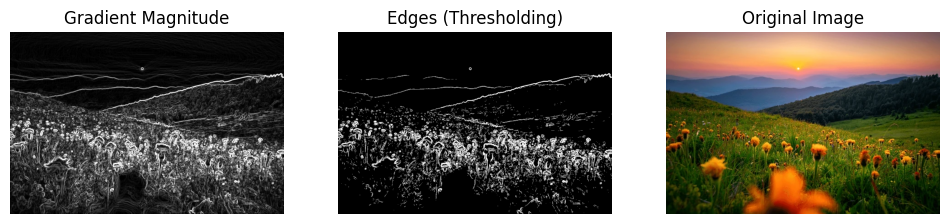

In [168]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.title("Gradient Magnitude")
plt.imshow(gradient_magnitude.astype(np.uint8), cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.title("Edges (Thresholding)")
plt.imshow(edges_thresh.astype(np.uint8), cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.title("Original Image")
plt.imshow(img.astype(np.uint8))
plt.axis("off")

### Part C

#### Task 1 — Laplacian Sharpening ( Only Numpy and Grayscale )
1. Use any 3×3 Laplacian kernel (4-connected or 8-connected).

2. Compute:
* <code>lap = convolve(img, laplacian_kernel)</code>
* <code>sharp = img - lap * alpha</code> where alpha ∈ [0.2, 1].

3. Now, put alpha = 1, if you had chosen a different value earlier. Get a new output. Then use the code in the lecture to do the same using cv2. Now, use python to verify if both numpy with alpha = 1 and cv2 give the exact same output ( Compare the matrices )

#### Task 2 - Unsharp Masking ( Only Numpy and Grayscale )
1. Apply Gaussian blur (from Part 1).
2. Subtract blurred image from original: <code> mask = img - blurred </code>
3. Add scaled mask back: <code>sharp = img + alpha * mask</code> , where you can choose any value of alpha.
4. See how negative values of alpha will give you a blurred image.  



In [169]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

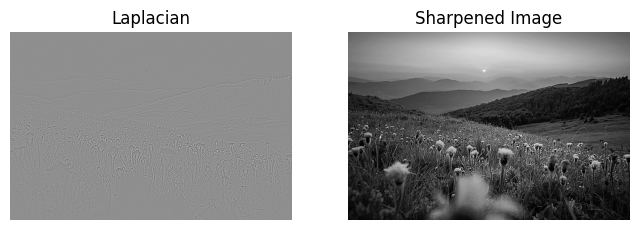

In [170]:
laplacian_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])
lap = convolve(img_gray, laplacian_kernel)
alpha = 0.5
sharp = img_gray - lap * alpha
np.clip(sharp, 0, 255, out=sharp)
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.title("Laplacian")
plt.imshow(lap, cmap='gray')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Sharpened Image")
plt.imshow(sharp, cmap='gray')
plt.axis("off")

In [171]:
alpha = 1
sharp = img_gray - lap * alpha
sharp = np.clip(sharp, 0, 255, out=sharp).astype(np.uint8)
plt.figure(figsize=(4, 4))
plt.title("Sharpened Image (alpha=1)")
plt.imshow(sharp, cmap='gray')
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

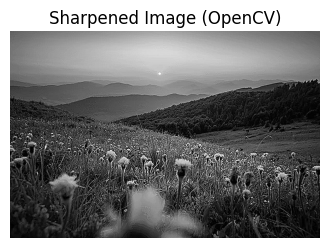

In [172]:
import cv2
lap_cv = cv2.Laplacian(img_gray, cv2.CV_32F)
sharp_cv = np.clip(img_gray - lap_cv, 0, 255).astype(np.uint8)
plt.figure(figsize=(4, 4))
plt.title("Sharpened Image (OpenCV)")
plt.imshow(sharp_cv, cmap='gray')
plt.axis("off")

In [173]:
diff = sharp - sharp_cv

print("Max absolute difference:", np.max(np.abs(diff)))
print("Mean absolute difference:", np.mean(np.abs(diff)))


Max absolute difference: 255
Mean absolute difference: 0.008541666666666666


### Part D

#### Task - Frequency Analysis (LPF & HPF Verification)
Compute the magnitude spectrum of the original image, gaussian blurred image and the unsharp masking image. Now, play with the alpha value in sharpening and gaussian kernel and notice how the magntude spectrum changes.
Then, in code comments, explain your observations of dark and bright areas in the magnitude spectrum. In nutshell, verify how convolution is actually filtering frequencies depending on the kernel.

In [174]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

[[160.29488  136.82176  135.77657  ... 146.00983  135.77657  136.82176 ]
 [144.09288  124.40747  147.53307  ... 140.69815  133.85193  130.03998 ]
 [133.6286   120.739914 149.72551  ... 142.62735  103.07013  132.21617 ]
 ...
 [139.24033  121.066696 129.12859  ... 121.20372  144.56047  125.17127 ]
 [133.6286   132.21617  103.07013  ... 134.75757  149.72551  120.739914]
 [144.09288  130.03998  133.85193  ... 137.77666  147.53307  124.40747 ]]


(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

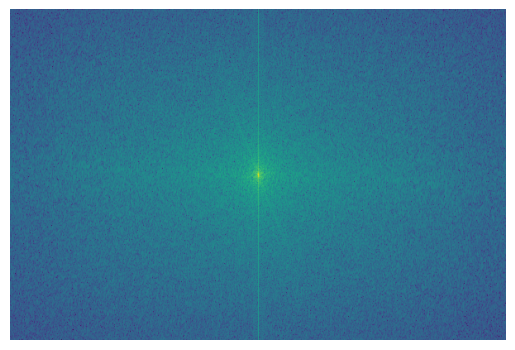

In [175]:
gray_float=img_gray.astype(np.float32)
gray_fft=np.fft.fft2(gray_float)
fshift=np.fft.fftshift(gray_fft)
magnitude_spectrum_original=20*np.log(np.abs(fshift))
print(magnitude_spectrum_original)
plt.imshow(magnitude_spectrum_original)
plt.axis("off")

In [176]:
gray_float_gaussian=gaussian_blur(img_gray,ksize=15,sigma=5)
gray_fft_gaussian=np.fft.fft2(gray_float_gaussian)
fshift_gaussian=np.fft.fftshift(gray_fft_gaussian)
magnitude_spectrum_gaussian=20*np.log(np.abs(fshift_gaussian))
plt.imshow(magnitude_spectrum_gaussian)
plt.axis("off")

(np.float64(-0.5), np.float64(599.5), np.float64(399.5), np.float64(-0.5))

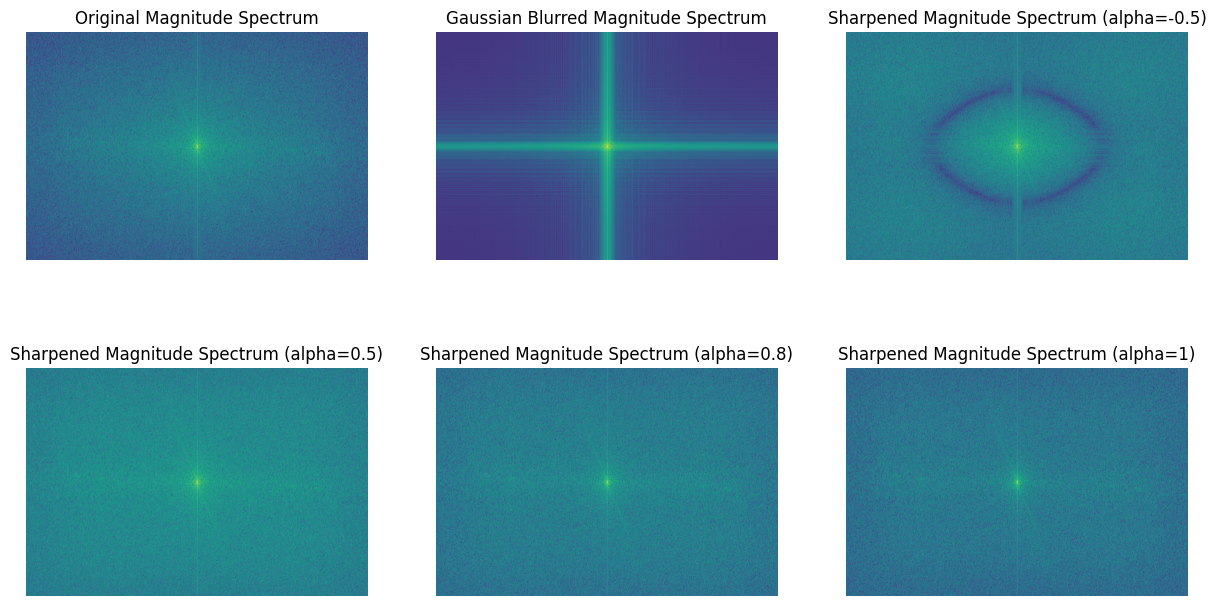

In [177]:
alphas = [-0.5, 0.5, 0.8, 1]
magnitude_spectra_sharp = []
for alpha in alphas:    
    sharp = img_gray - lap * alpha
    sharp = np.clip(sharp, 0, 255, out=sharp).astype(np.uint8)
    gray_fft_sharp=np.fft.fft2(sharp)
    fshift_sharp=np.fft.fftshift(gray_fft_sharp)
    magnitude_spectrum_sharp=20*np.log(np.abs(fshift_sharp))
    magnitude_spectra_sharp.append(magnitude_spectrum_sharp)

plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.title("Original Magnitude Spectrum")
plt.imshow(magnitude_spectrum_original)
plt.axis("off")
plt.subplot(2, 3, 2)
plt.title("Gaussian Blurred Magnitude Spectrum")
plt.imshow(magnitude_spectrum_gaussian)
plt.axis("off")
for i, alpha in enumerate(alphas):
    plt.subplot(2, 3, i+3)
    plt.title(f"Sharpened Magnitude Spectrum (alpha={alpha})")
    plt.imshow(magnitude_spectra_sharp[i])
    plt.axis("off")

The guassian magnitude spectrum shows that it acts as a LPF as the spectrum gets more conentrated at low frequencies. 
The sharpened mask with alpha<0 has more high freuqncies suppressed, hence it is blurred. For alpha>0, with increase in alpha, high frequency components are enhanced relative to low frequency components.

### Part E

#### Task - Custom Colour Kernel (Detect Yellow Leaf Edges)

**Instructions :**
* At the start of the assignment .ipynb file, you will find a code cell in section 1, run it to see an image with a yellow leaf amongst green leaves.
* Design a 3×3 or 5×5 custom kernel applied separately to each channel that highlights the edges where any other colour transitions into a yellowish hue.

**Hints :**

* Yellow = (R high, G high, B low)

* Dark green = (G high, R low, B low)

**Steps:**

1. Analyze the RGB values of green & yellow regions.

2. Create a custom kernel that responds strongly to change from green to yellow in:
* Red matrices of RGB
* Green matrices of RGB
* Optionally R - G difference
* Think about the gradient in Red - Green. Is there a huge change the value of R-G when colour changes from Green to Yellow ? If yes, try to exploit it.

3. Combine the response maps.

4. Get a clean outline around the leaf.

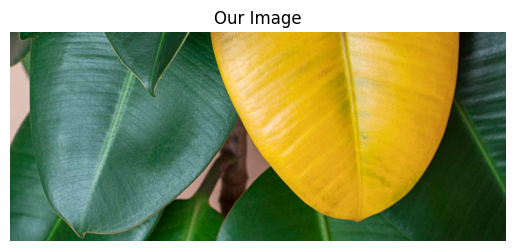

In [178]:
plt.imshow(img_part5)
plt.axis("off")
plt.title("Our Image")
plt.show()

In [179]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

In [180]:
img_np = np.array(img_part5).astype(np.float32)

sobel_5x5_x = np.array([
    [-1, -2,  0,  2,  1],
    [-4, -8,  0,  8,  4],
    [-6,-12,  0, 12,  6],
    [-4, -8,  0,  8,  4],
    [-1, -2,  0,  2,  1]
], dtype=np.float32)

sobel_5x5_y = np.array([
    [-1, -4, -6, -4, -1],
    [-2, -8,-12, -8, -2],
    [ 0,  0,  0,  0,  0],
    [ 2,  8, 12,  8,  2],
    [ 1,  4,  6,  4,  1]
], dtype=np.float32)

R = img_np[:, :, 0]
G = img_np[:, :, 1]
RG = R - G

edge_G = convolve(G, sobel_5x5_x)**2 + convolve(G, sobel_5x5_y)**2
edge_G = np.sqrt(edge_G)
edge_RG = convolve(RG, sobel_5x5_x)**2 + convolve(RG, sobel_5x5_y)**2
edge_RG = np.sqrt(edge_RG)

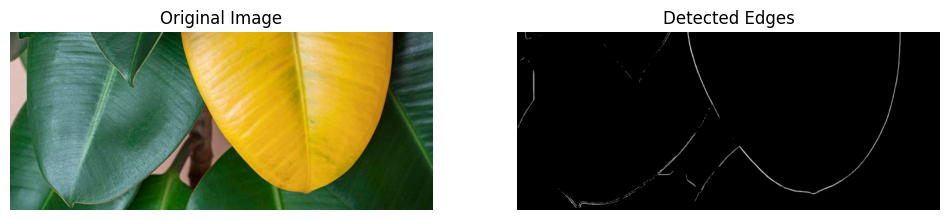

In [181]:
edge_combined = (edge_G + 2.0 * edge_RG) * (edge_RG > 50)
edge_combined -= edge_combined.min()
edge_combined /= edge_combined.max()
edge_combined = (edge_combined * 255).astype(np.uint8)

edges = edge_combined.copy()
edges[edges < 90] = 0

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.imshow(img_np.astype(np.uint8))
plt.title("Original Image")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(edges, cmap="gray")
plt.title("Detected Edges")
plt.axis("off")
plt.show()

### Bonus - Part F

#### Task - Color Manipulation Using Lecture 2 Concepts

**NOTE :** only for this, you can use cv2 functions, no need of doing everything in Numpy. Although there are still more brownie parts for Numpy hardwork.

1. Convert the RGB image to HSV. Use your rgb_to_hsv() from Lecture 2 Assignment - free Numopy points ;)) .
2. Identify pixels belonging to the yellow leaf using an HSV mask. (maybe take help from Part E or design a new hue mask)
3. Now use your full brain and chnage the colour of the leaf to red.

Convert back to RGB.

Display the final result.

For reference, heres the image I expect as a result. And its not actually tough, easy 5 lines code.
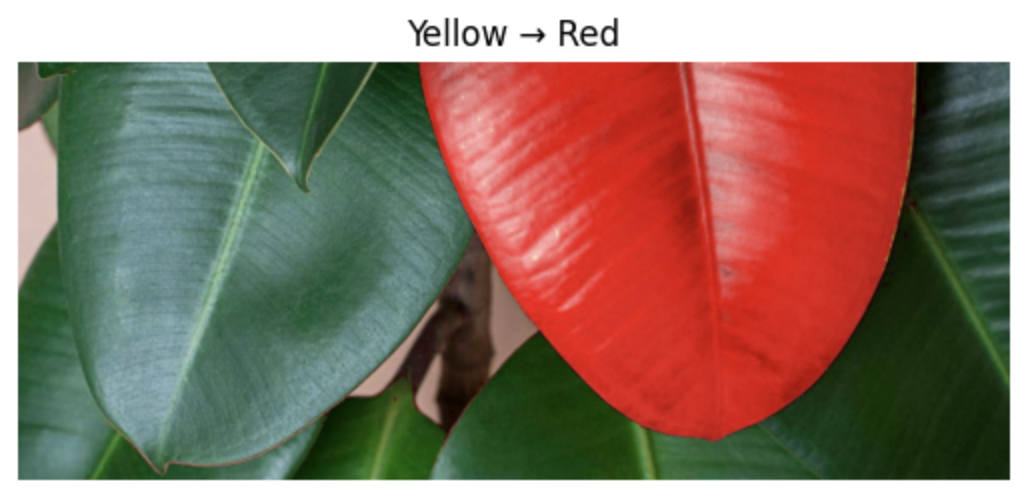

Also, we can change to a less brighter colour
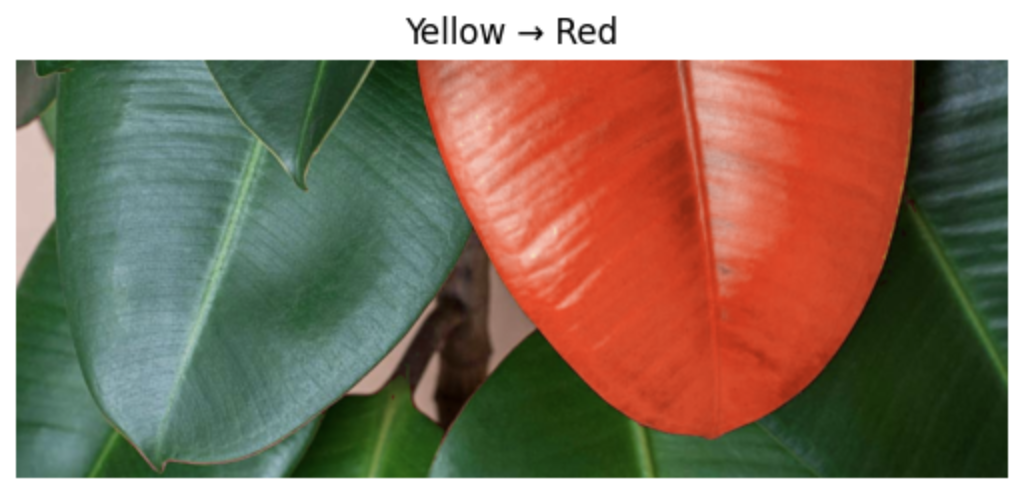

In [182]:
# Your BONUS PART codes follow here. You can create more cells under this. Write clean and commented code.

In [183]:
def rgb_to_hsv(img_rgb):
  R = img_rgb[:, :, 0]
  G = img_rgb[:, :, 1]
  B = img_rgb[:, :, 2]

  R1 = R/255.0
  G1 = G/255.0
  B1 = B/255.0

  Cmax = np.maximum(np.maximum(R1, G1), B1)
  Cmin = np.minimum(np.minimum(R1, G1), B1)
  delta = Cmax - Cmin

  H1 = np.zeros_like(R1)
  S1 = np.zeros_like(R1)
  V1 = Cmax

  H1[delta == 0] = 0

  mask_R = (Cmax == R1) & (delta != 0)
  H1[mask_R] = 60 * np.mod(((G1[mask_R] - B1[mask_R]) / delta[mask_R]), 6)

  mask_G = (Cmax == G1) & (delta != 0)
  H1[mask_G] = 60 * (((B1[mask_G] - R1[mask_G]) / delta[mask_G]) + 2)

  mask_B = (Cmax == B1) & (delta != 0)
  H1[mask_B] = 60 * (((R1[mask_B] - G1[mask_B]) / delta[mask_B]) + 4)

  S1[Cmax == 0] = 0
  S1[Cmax != 0] = delta[Cmax != 0] / Cmax[Cmax != 0]

  H = (H1 /2).astype(np.uint8)
  S = (S1 * 255).astype(np.uint8)
  V = (V1 * 255).astype(np.uint8)
  hsv_image = np.stack((H, S, V), axis=-1)
  return hsv_image

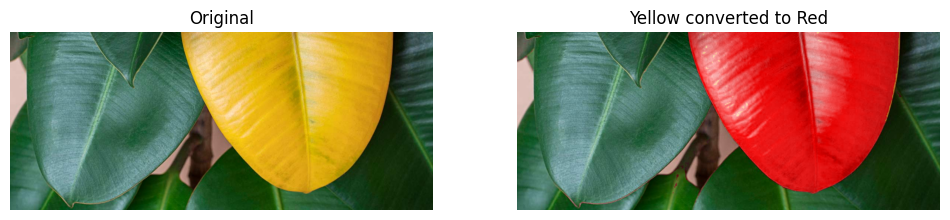

In [184]:
img_np = np.array(img_part5).astype(np.uint8)

hsv = rgb_to_hsv(img_np)

H = hsv[:, :, 0]
S = hsv[:, :, 1]
V = hsv[:, :, 2]

yellow_mask = (
    (H >= 18) & (H <= 38) &
    (S >= 50) &
    (V >= 50)
)

hsv_red = hsv.copy()
hsv_red[yellow_mask, 0] = 0

img_red = cv2.cvtColor(hsv_red, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_np)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Yellow converted to Red")
plt.imshow(img_red)
plt.axis("off")

plt.show()
